In [1]:
%run /g/data/e14/cp3790/Charuni/ModelExperiment/model-run-function-definitions.ipynb
import math
import numpy as np

## Surface elevation

In [2]:
orog_ds = xr.open_dataset('/g/data/e14/cp3790/Charuni/orog.nc')
orog = orog_ds.rename(longitude='lon', latitude='lat') 
surf_elev = orog.surface_altitude.sel(lon=slice(135, 190), lat=slice(-53, -28))
surf_elev

<xarray.DataArray 'surface_altitude' (lat: 20, lon: 29)>
[580 values with dtype=float32]
Coordinates:
  * lat      (lat) float32 -51.88 -50.62 -49.38 -48.12 ... -30.62 -29.38 -28.12
  * lon      (lon) float32 135.9 137.8 139.7 141.6 ... 182.8 184.7 186.6 188.4
Attributes:
    standard_name:    surface_altitude
    units:            m
    um_stash_source:  m01s00i033
    grid_mapping:     latitude_longitude

## MSLP

In [3]:
TEMP_VAR = "air_pressure_at_sea_level"

#Alt 
alt_year_xr_map = get_alt_year_xr_map(
    TEMP_VAR,
    "/g/data/e14/cp3790/Charuni/ModelRun/alt-runs/um_pverb_{}.nc")  

# Con

# bundle info
bundle_1980 = xr.open_mfdataset('/g/data/e14/cp3790/Charuni/ModelRun/control-new/result-uby108-1980/um_pverb_*.nc')
bundle_1999 = xr.open_mfdataset('/g/data/e14/cp3790/Charuni/ModelRun/control-new/result-uby108-1999/um_pverb_*.nc')
con_bundles = {
    '1980': {
        'xr': bundle_1980,
        'start': 1981,
        'end': 1998,
    },
    '1999': {
        'xr': bundle_1999,
        'start': 2000,
        'end': 2018,
    }
}

con_year_xr_map = get_con_year_xr_map(alt_year_xr_map, con_bundles, TEMP_VAR)

# Diff
diff_year_xr_map = get_diff_year_xr_map(alt_year_xr_map, con_year_xr_map)

## Surface air temperature

In [4]:
TEMP_VAR = "ts_0"

#Alt 
alt_year_temp_xr_map = get_alt_year_xr_map(
    TEMP_VAR,
    "/g/data/e14/cp3790/Charuni/ModelRun/alt-runs/um_pvera_{}.nc")  

# Con

# bundle info
bundle_1980 = xr.open_mfdataset('/g/data/e14/cp3790/Charuni/ModelRun/control-new/result-uby108-1980/um_pvera_*.nc')
bundle_1999 = xr.open_mfdataset('/g/data/e14/cp3790/Charuni/ModelRun/control-new/result-uby108-1999/um_pvera_*.nc')
con_bundles = {
    '1980': {
        'xr': bundle_1980,
        'start': 1981,
        'end': 1998,
    },
    '1999': {
        'xr': bundle_1999,
        'start': 2000,
        'end': 2018,
    }
}

con_year_temp_xr_map = get_con_year_xr_map(alt_year_temp_xr_map, con_bundles, TEMP_VAR)

# Diff
diff_year_temp_xr_map = get_diff_year_xr_map(alt_year_temp_xr_map, con_year_temp_xr_map)

## U wind

In [5]:
TEMP_VAR = "uas"

#Alt 
alt_year_xr_map = get_alt_year_xr_map(
    TEMP_VAR,
    "/g/data/e14/cp3790/Charuni/ModelRun/alt-runs/um_pvera_{}.nc")  

# Con

# bundle info
bundle_1980 = xr.open_mfdataset('/g/data/e14/cp3790/Charuni/ModelRun/control-new/result-uby108-1980/um_pvera_*.nc')
bundle_1999 = xr.open_mfdataset('/g/data/e14/cp3790/Charuni/ModelRun/control-new/result-uby108-1999/um_pvera_*.nc')
con_bundles = {
    '1980': {
        'xr': bundle_1980,
        'start': 1981,
        'end': 1998,
    },
    '1999': {
        'xr': bundle_1999,
        'start': 2000,
        'end': 2018,
    }
}

con_year_uas_xr_map = get_con_year_xr_map(alt_year_xr_map, con_bundles, TEMP_VAR)

# Diff
diff_year_uas_xr_map = get_diff_year_xr_map(alt_year_xr_map, con_year_uas_xr_map)

## V wind

In [6]:
TEMP_VAR = "vas"

#Alt 
alt_year_xr_map = get_alt_year_xr_map(
    TEMP_VAR,
    "/g/data/e14/cp3790/Charuni/ModelRun/alt-runs/um_pvera_{}.nc")  

# Con

# bundle info
bundle_1980 = xr.open_mfdataset('/g/data/e14/cp3790/Charuni/ModelRun/control-new/result-uby108-1980/um_pvera_*.nc')
bundle_1999 = xr.open_mfdataset('/g/data/e14/cp3790/Charuni/ModelRun/control-new/result-uby108-1999/um_pvera_*.nc')
con_bundles = {
    '1980': {
        'xr': bundle_1980,
        'start': 1981,
        'end': 1998,
    },
    '1999': {
        'xr': bundle_1999,
        'start': 2000,
        'end': 2018,
    }
}

con_year_vas_xr_map = get_con_year_xr_map(alt_year_xr_map, con_bundles, TEMP_VAR)

# Diff
diff_year_vas_xr_map = get_diff_year_xr_map(alt_year_xr_map, con_year_vas_xr_map)

## Variables xarray from maps

In [7]:
con_phases_mslp_xr = get_year_2phases_xr(con_year_xr_map, con_year_xr_map, phase_dim='time')

Checking coords of 1981 - has 'longtitude'
Checking coords of 1982 - has 'longtitude'
Checking coords of 1983 - has 'longtitude'
Checking coords of 1984 - has 'longtitude'
Checking coords of 1985 - has 'longtitude'
Checking coords of 1986 - has 'longtitude'
Checking coords of 1987 - has 'longtitude'
Checking coords of 1988 - has 'longtitude'
Checking coords of 1989 - has 'longtitude'
Checking coords of 1990 - has 'longtitude'
Checking coords of 1991 - has 'longtitude'
Checking coords of 1992 - has 'longtitude'
Checking coords of 1993 - has 'longtitude'
Checking coords of 1994 - has 'longtitude'
Checking coords of 1996 - has 'longtitude'
Checking coords of 1997 - has 'longtitude'
Checking coords of 1998 - has 'longtitude'
Checking coords of 2000 - has 'longtitude'
Checking coords of 2001 - has 'longtitude'
Checking coords of 2002 - has 'longtitude'
Checking coords of 2003 - has 'longtitude'
Checking coords of 2004 - has 'longtitude'
Checking coords of 2005 - has 'longtitude'
Checking co

In [8]:
alt_phases_mslp_xr = get_year_2phases_xr(alt_year_xr_map, alt_year_xr_map, phase_dim='time')

Checking coords of 1981 - has 'longitude_0' -> renaming coords...
Checking coords of 1982 - has 'longitude_0' -> renaming coords...
Checking coords of 1983 - has 'longitude_0' -> renaming coords...
Checking coords of 1984 - has 'longitude_0' -> renaming coords...
Checking coords of 1985 - has 'longitude_0' -> renaming coords...
Checking coords of 1986 - has 'longitude_0' -> renaming coords...
Checking coords of 1987 - has 'longitude_0' -> renaming coords...
Checking coords of 1988 - has 'longitude_0' -> renaming coords...
Checking coords of 1989 - has 'longitude_0' -> renaming coords...
Checking coords of 1990 - has 'longitude_0' -> renaming coords...
Checking coords of 1991 - has 'longitude_0' -> renaming coords...
Checking coords of 1992 - has 'longitude_0' -> renaming coords...
Checking coords of 1993 - has 'longitude_0' -> renaming coords...
Checking coords of 1994 - has 'longitude_0' -> renaming coords...
Checking coords of 1996 - has 'longitude_0' -> renaming coords...
Checking c

In [9]:
diff_phases_mslp_xr = get_year_2phases_xr(diff_year_xr_map, diff_year_xr_map, phase_dim='event_month')

Checking coords of 1981 - has 'longtitude'
Checking coords of 1982 - has 'longtitude'
Checking coords of 1983 - has 'longtitude'
Checking coords of 1984 - has 'longtitude'
Checking coords of 1985 - has 'longtitude'
Checking coords of 1986 - has 'longtitude'
Checking coords of 1987 - has 'longtitude'
Checking coords of 1988 - has 'longtitude'
Checking coords of 1989 - has 'longtitude'
Checking coords of 1990 - has 'longtitude'
Checking coords of 1991 - has 'longtitude'
Checking coords of 1992 - has 'longtitude'
Checking coords of 1993 - has 'longtitude'
Checking coords of 1994 - has 'longtitude'
Checking coords of 1996 - has 'longtitude'
Checking coords of 1997 - has 'longtitude'
Checking coords of 1998 - has 'longtitude'
Checking coords of 2000 - has 'longtitude'
Checking coords of 2001 - has 'longtitude'
Checking coords of 2002 - has 'longtitude'
Checking coords of 2003 - has 'longtitude'
Checking coords of 2004 - has 'longtitude'
Checking coords of 2005 - has 'longtitude'
Checking co

In [10]:
con_phases_temp_xr = get_year_2phases_xr(con_year_temp_xr_map, con_year_temp_xr_map, phase_dim='time')
#con_phases_temp_xr = get_year_daily_xr(con_year_temp_xr_map, con_year_temp_xr_map, phase_dim='time')

Checking coords of 1981 - has 'longtitude'
Checking coords of 1982 - has 'longtitude'
Checking coords of 1983 - has 'longtitude'
Checking coords of 1984 - has 'longtitude'
Checking coords of 1985 - has 'longtitude'
Checking coords of 1986 - has 'longtitude'
Checking coords of 1987 - has 'longtitude'
Checking coords of 1988 - has 'longtitude'
Checking coords of 1989 - has 'longtitude'
Checking coords of 1990 - has 'longtitude'
Checking coords of 1991 - has 'longtitude'
Checking coords of 1992 - has 'longtitude'
Checking coords of 1993 - has 'longtitude'
Checking coords of 1994 - has 'longtitude'
Checking coords of 1996 - has 'longtitude'
Checking coords of 1997 - has 'longtitude'
Checking coords of 1998 - has 'longtitude'
Checking coords of 2000 - has 'longtitude'
Checking coords of 2001 - has 'longtitude'
Checking coords of 2002 - has 'longtitude'
Checking coords of 2003 - has 'longtitude'
Checking coords of 2004 - has 'longtitude'
Checking coords of 2005 - has 'longtitude'
Checking co

In [11]:
alt_phases_temp_xr = get_year_2phases_xr(alt_year_temp_xr_map, alt_year_temp_xr_map, phase_dim='time')

Checking coords of 1981 - has 'longtitude'
Checking coords of 1982 - has 'longtitude'
Checking coords of 1983 - has 'longtitude'
Checking coords of 1984 - has 'longtitude'
Checking coords of 1985 - has 'longtitude'
Checking coords of 1986 - has 'longtitude'
Checking coords of 1987 - has 'longtitude'
Checking coords of 1988 - has 'longtitude'
Checking coords of 1989 - has 'longtitude'
Checking coords of 1990 - has 'longtitude'
Checking coords of 1991 - has 'longtitude'
Checking coords of 1992 - has 'longtitude'
Checking coords of 1993 - has 'longtitude'
Checking coords of 1994 - has 'longtitude'
Checking coords of 1996 - has 'longtitude'
Checking coords of 1997 - has 'longtitude'
Checking coords of 1998 - has 'longtitude'
Checking coords of 2000 - has 'longtitude'
Checking coords of 2001 - has 'longtitude'
Checking coords of 2002 - has 'longtitude'
Checking coords of 2003 - has 'longtitude'
Checking coords of 2004 - has 'longtitude'
Checking coords of 2005 - has 'longtitude'
Checking co

In [12]:
diff_phases_temp_xr = get_year_2phases_xr(diff_year_temp_xr_map, diff_year_temp_xr_map, phase_dim='event_month')

Checking coords of 1981 - has 'longtitude'
Checking coords of 1982 - has 'longtitude'
Checking coords of 1983 - has 'longtitude'
Checking coords of 1984 - has 'longtitude'
Checking coords of 1985 - has 'longtitude'
Checking coords of 1986 - has 'longtitude'
Checking coords of 1987 - has 'longtitude'
Checking coords of 1988 - has 'longtitude'
Checking coords of 1989 - has 'longtitude'
Checking coords of 1990 - has 'longtitude'
Checking coords of 1991 - has 'longtitude'
Checking coords of 1992 - has 'longtitude'
Checking coords of 1993 - has 'longtitude'
Checking coords of 1994 - has 'longtitude'
Checking coords of 1996 - has 'longtitude'
Checking coords of 1997 - has 'longtitude'
Checking coords of 1998 - has 'longtitude'
Checking coords of 2000 - has 'longtitude'
Checking coords of 2001 - has 'longtitude'
Checking coords of 2002 - has 'longtitude'
Checking coords of 2003 - has 'longtitude'
Checking coords of 2004 - has 'longtitude'
Checking coords of 2005 - has 'longtitude'
Checking co

In [13]:
con_phases_uas_xr = get_year_2phases_xr(con_year_uas_xr_map, con_year_uas_xr_map, phase_dim='time')

Checking coords of 1981 - has 'longitude_0' -> renaming coords...
Checking coords of 1982 - has 'longitude_0' -> renaming coords...
Checking coords of 1983 - has 'longitude_0' -> renaming coords...
Checking coords of 1984 - has 'longitude_0' -> renaming coords...
Checking coords of 1985 - has 'longitude_0' -> renaming coords...
Checking coords of 1986 - has 'longitude_0' -> renaming coords...
Checking coords of 1987 - has 'longitude_0' -> renaming coords...
Checking coords of 1988 - has 'longitude_0' -> renaming coords...
Checking coords of 1989 - has 'longitude_0' -> renaming coords...
Checking coords of 1990 - has 'longitude_0' -> renaming coords...
Checking coords of 1991 - has 'longitude_0' -> renaming coords...
Checking coords of 1992 - has 'longitude_0' -> renaming coords...
Checking coords of 1993 - has 'longitude_0' -> renaming coords...
Checking coords of 1994 - has 'longitude_0' -> renaming coords...
Checking coords of 1996 - has 'longitude_0' -> renaming coords...
Checking c

In [14]:
diff_phases_uas_xr = get_year_2phases_xr(diff_year_uas_xr_map, diff_year_uas_xr_map, phase_dim='event_month')

Checking coords of 1981 - has 'longitude_0' -> renaming coords...
Checking coords of 1982 - has 'longitude_0' -> renaming coords...
Checking coords of 1983 - has 'longitude_0' -> renaming coords...
Checking coords of 1984 - has 'longitude_0' -> renaming coords...
Checking coords of 1985 - has 'longitude_0' -> renaming coords...
Checking coords of 1986 - has 'longitude_0' -> renaming coords...
Checking coords of 1987 - has 'longitude_0' -> renaming coords...
Checking coords of 1988 - has 'longitude_0' -> renaming coords...
Checking coords of 1989 - has 'longitude_0' -> renaming coords...
Checking coords of 1990 - has 'longitude_0' -> renaming coords...
Checking coords of 1991 - has 'longitude_0' -> renaming coords...
Checking coords of 1992 - has 'longitude_0' -> renaming coords...
Checking coords of 1993 - has 'longitude_0' -> renaming coords...
Checking coords of 1994 - has 'longitude_0' -> renaming coords...
Checking coords of 1996 - has 'longitude_0' -> renaming coords...
Checking c

In [15]:
con_phases_vas_xr = get_year_2phases_xr(con_year_vas_xr_map, con_year_vas_xr_map, phase_dim='time')

Checking coords of 1981 - has 'longitude_0' -> renaming coords...
Checking coords of 1982 - has 'longitude_0' -> renaming coords...
Checking coords of 1983 - has 'longitude_0' -> renaming coords...
Checking coords of 1984 - has 'longitude_0' -> renaming coords...
Checking coords of 1985 - has 'longitude_0' -> renaming coords...
Checking coords of 1986 - has 'longitude_0' -> renaming coords...
Checking coords of 1987 - has 'longitude_0' -> renaming coords...
Checking coords of 1988 - has 'longitude_0' -> renaming coords...
Checking coords of 1989 - has 'longitude_0' -> renaming coords...
Checking coords of 1990 - has 'longitude_0' -> renaming coords...
Checking coords of 1991 - has 'longitude_0' -> renaming coords...
Checking coords of 1992 - has 'longitude_0' -> renaming coords...
Checking coords of 1993 - has 'longitude_0' -> renaming coords...
Checking coords of 1994 - has 'longitude_0' -> renaming coords...
Checking coords of 1996 - has 'longitude_0' -> renaming coords...
Checking c

In [16]:
diff_phases_vas_xr = get_year_2phases_xr(diff_year_vas_xr_map, diff_year_vas_xr_map, phase_dim='event_month')

Checking coords of 1981 - has 'longitude_0' -> renaming coords...
Checking coords of 1982 - has 'longitude_0' -> renaming coords...
Checking coords of 1983 - has 'longitude_0' -> renaming coords...
Checking coords of 1984 - has 'longitude_0' -> renaming coords...
Checking coords of 1985 - has 'longitude_0' -> renaming coords...
Checking coords of 1986 - has 'longitude_0' -> renaming coords...
Checking coords of 1987 - has 'longitude_0' -> renaming coords...
Checking coords of 1988 - has 'longitude_0' -> renaming coords...
Checking coords of 1989 - has 'longitude_0' -> renaming coords...
Checking coords of 1990 - has 'longitude_0' -> renaming coords...
Checking coords of 1991 - has 'longitude_0' -> renaming coords...
Checking coords of 1992 - has 'longitude_0' -> renaming coords...
Checking coords of 1993 - has 'longitude_0' -> renaming coords...
Checking coords of 1994 - has 'longitude_0' -> renaming coords...
Checking coords of 1996 - has 'longitude_0' -> renaming coords...
Checking c

## Regridding con and diff temp and mslp to uas/vas

In [17]:
con_mslp_lat_lon = con_phases_mslp_xr.rename(longitude='lon', latitude='lat') 
con_mslp_ds = con_mslp_lat_lon.to_dataset(name='mslp') 

alt_mslp_lat_lon = alt_phases_mslp_xr.rename(longitude='lon', latitude='lat') 
alt_mslp_ds = alt_mslp_lat_lon.to_dataset(name='mslp') 

diff_mslp_lat_lon = diff_phases_mslp_xr.rename(longitude='lon', latitude='lat') 
diff_mslp_ds = diff_mslp_lat_lon.to_dataset(name='mslp')

In [18]:
con_temp_lat_lon = con_phases_temp_xr.rename(longitude='lon', latitude='lat') 
con_temp_ds = con_temp_lat_lon.to_dataset(name='ts_0') 

alt_temp_lat_lon = alt_phases_temp_xr.rename(longitude='lon', latitude='lat') 
alt_temp_ds = alt_temp_lat_lon.to_dataset(name='ts_0') 

diff_temp_lat_lon = diff_phases_temp_xr.rename(longitude='lon', latitude='lat') 
diff_temp_ds = diff_temp_lat_lon.to_dataset(name='ts_0') 

In [19]:
con_ds_out = xr.Dataset(
    {
        "lat": (["lat"], np.arange(-52.75, -27.75, 0.5)),
        "lon": (["lon"], np.arange(135.25, 190.25, 0.5)),
    }
)

In [20]:
ds_out = xr.Dataset(
    {
        "lat": (["lat"], np.arange(-53.0, -27.5, 0.5)),
        "lon": (["lon"], np.arange(135, 190, 0.5)),
    }
)

In [21]:
regridder_con = xe.Regridder(con_temp_ds, ds_out, "bilinear") # build regridder 
ds_con_temp = regridder_con(con_temp_ds) # apply regridder 
con_temp = ds_con_temp.ts_0

In [22]:
regridder_alt = xe.Regridder(alt_temp_ds, ds_out, "bilinear") # build regridder 
ds_alt_temp = regridder_alt(alt_temp_ds) # apply regridder 
alt_temp = ds_alt_temp.ts_0

In [23]:
regridder_diff = xe.Regridder(diff_temp_ds, ds_out, "bilinear") # build regridder 
ds_diff_temp = regridder_diff(diff_temp_ds) # apply regridder 
#ds_diff_temp = ds_diff_temp.drop(('latitude', 'longitude'))
diff_temp = ds_diff_temp.ts_0

In [24]:
regridder_con = xe.Regridder(con_mslp_ds, ds_out, "bilinear") # build regridder 
ds_con_mslp = regridder_con(con_mslp_ds) # apply regridder 
con_mslp = ds_con_mslp.mslp

In [25]:
regridder_alt = xe.Regridder(alt_mslp_ds, ds_out, "bilinear") # build regridder 
ds_alt_mslp = regridder_alt(alt_mslp_ds) # apply regridder 
alt_mslp = ds_alt_mslp.mslp

In [26]:
regridder_diff = xe.Regridder(diff_mslp_ds, ds_out, "bilinear") # build regridder 
ds_diff_mslp = regridder_diff(diff_mslp_ds) # apply regridder 
#ds_diff_temp = ds_diff_temp.drop(('latitude', 'longitude'))
diff_mslp = ds_diff_mslp.mslp

In [27]:
regridder_orog = xe.Regridder(orog, con_ds_out, "bilinear") # build regridder 
ds_surf_elev = regridder_orog(orog) # apply regridder 
surf_elev = ds_surf_elev.surface_altitude
surf_elev

<xarray.DataArray 'surface_altitude' (lat: 50, lon: 110)>
array([[  0.     ,   0.     ,   0.     , ...,   0.     ,   0.     ,
          0.     ],
       [  0.     ,   0.     ,   0.     , ...,   0.     ,   0.     ,
          0.     ],
       [  0.     ,   0.     ,   0.     , ...,   0.     ,   0.     ,
          0.     ],
       ...,
       [172.93698, 156.3215 , 142.78593, ...,   0.     ,   0.     ,
          0.     ],
       [173.23792, 148.20866, 129.45201, ...,   0.     ,   0.     ,
          0.     ],
       [173.53883, 140.09583, 116.1181 , ...,   0.     ,   0.     ,
          0.     ]], dtype=float32)
Coordinates:
  * lat      (lat) float64 -52.75 -52.25 -51.75 -51.25 ... -29.25 -28.75 -28.25
  * lon      (lon) float64 135.2 135.8 136.2 136.8 ... 188.2 188.8 189.2 189.8

In [28]:
regridder_orog = xe.Regridder(orog, ds_out, "bilinear") # build regridder 
ds_surf_elev = regridder_orog(orog) # apply regridder 
surf_elev_alt = ds_surf_elev.surface_altitude
surf_elev_alt

<xarray.DataArray 'surface_altitude' (lat: 51, lon: 110)>
array([[  0.      ,   0.      ,   0.      , ...,   0.      ,   0.      ,
          0.      ],
       [  0.      ,   0.      ,   0.      , ...,   0.      ,   0.      ,
          0.      ],
       [  0.      ,   0.      ,   0.      , ...,   0.      ,   0.      ,
          0.      ],
       ...,
       [183.51498 , 162.66704 , 142.80937 , ...,   0.      ,   0.      ,
          0.      ],
       [188.02219 , 158.76141 , 131.1278  , ...,   0.      ,   0.      ,
          0.      ],
       [194.45177 , 157.6778  , 123.084366, ...,   0.      ,   0.      ,
          0.      ]], dtype=float32)
Coordinates:
  * lat      (lat) float64 -53.0 -52.5 -52.0 -51.5 ... -29.5 -29.0 -28.5 -28.0
  * lon      (lon) float64 135.0 135.5 136.0 136.5 ... 188.0 188.5 189.0 189.5

## Changing con and diff uas/vas dims to lat/lon

In [29]:
con_uas = con_phases_uas_xr.rename(longitude='lon', latitude='lat') 
diff_uas = diff_phases_uas_xr.rename(longitude='lon', latitude='lat') 
con_vas = con_phases_vas_xr.rename(longitude='lon', latitude='lat') 
diff_vas = diff_phases_vas_xr.rename(longitude='lon', latitude='lat') 

In [17]:
import numpy as np
import metpy.calc as mpcalc
from metpy.units import units

In [36]:
diff_vas.isel(phase=0)

<xarray.DataArray 'vas' (time: 36, lat: 51, lon: 110)>
dask.array<getitem, shape=(36, 51, 110), dtype=float32, chunksize=(1, 51, 110), chunktype=numpy.ndarray>
Coordinates:
  * lon      (lon) float32 135.0 135.5 136.0 136.5 ... 188.0 188.5 189.0 189.5
  * lat      (lat) float32 -53.0 -52.5 -52.0 -51.5 ... -29.5 -29.0 -28.5 -28.0
    height   float64 10.0
Dimensions without coordinates: time

In [39]:
tadv = mpcalc.advection(temp_con_buildup_xr.mean(dim='time'), diff_uas.isel(phase=0).mean(dim='time'), diff_vas.isel(phase=0).mean(dim='time'))

/jobfs/89249030.gadi-pbs/ipykernel_851610/3180143255.py:1: UserWarning: Vertical dimension number not found. Defaulting to (..., Z, Y, X) order.
  tadv = mpcalc.advection(temp_con_buildup_xr.mean(dim='time'), diff_uas.isel(phase=0).mean(dim='time'), diff_vas.isel(phase=0).mean(dim='time'))


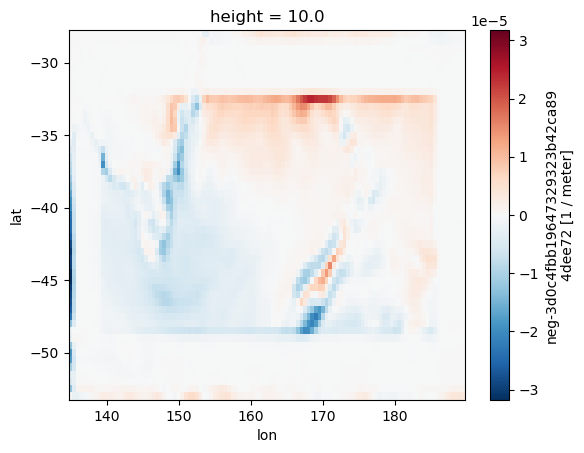

In [41]:
tadv.plot()

/jobfs/89249030.gadi-pbs/ipykernel_851610/1767804805.py:10: UserWarning: Vertical dimension number not found. Defaulting to (..., Z, Y, X) order.
  tadv = mpcalc.advection(temp_con_buildup_xr.mean(dim='time'), diff_uas.isel(phase=0).mean(dim='time'), diff_vas.isel(phase=0).mean(dim='time'))


1 / meter


type: Cannot convert from '1 / meter' (1 / [length]) to 'kelvin / hour' ([temperature] / [time])

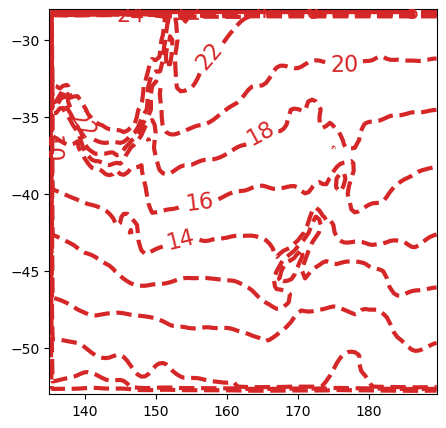

In [38]:
import matplotlib.pyplot as plt

import metpy.calc as mpcalc
from metpy.cbook import example_data

# load example data
#ds = example_data()

# Calculate the temperature advection of the flow
tadv = mpcalc.advection(temp_con_buildup_xr.mean(dim='time'), diff_uas.isel(phase=0).mean(dim='time'), diff_vas.isel(phase=0).mean(dim='time'))

# See the units that come back from the advection function
print(tadv.data.units)

# start figure and set axis
fig, ax = plt.subplots(figsize=(5, 5))

# plot isotherms
cs = ax.contour(temp_con_buildup_xr.lon, temp_con_buildup_xr.lat, temp_con_buildup_xr.mean(dim='time'), range(4, 26, 2), colors='tab:red',
                linestyles='dashed', linewidths=3)
plt.clabel(cs, fmt='%d', fontsize=16)

# plot temperature advection and convert units to Kelvin per 3 hours
cf = ax.contourf(temp_con_buildup_xr.lon, temp_con_buildup_xr.lat, tadv.metpy.convert_units('kelvin/hour') * 3, range(-6, 7, 1),
                 cmap=plt.cm.bwr, alpha=0.75)
plt.colorbar(cf, pad=0, aspect=50)
ax.barbs(temp_con_buildup_xr.lon.values[::2], temp_con_buildup_xr.lat.values[::2],
         diff_uas.isel(phase=0)[::2, ::2], diff_vas.isel(phase=0)[::2, ::2],
         color='black', length=6, alpha=0.5)
ax.set(xlim=(260, 270), ylim=(30, 40))
ax.set_title('Temperature Advection Calculation')

plt.show()

## Calculating potential temperature (theta) using temperature, mslp, and surface elevation

In [30]:
con_surface_pressure = con_mslp * np.exp((-9.81*surf_elev_alt)/(287*con_temp))

In [31]:
alt_surface_pressure = con_mslp * np.exp((-9.81*surf_elev_alt)/(287*alt_temp))

In [32]:
con_theta = ((con_temp * 1000)/con_surface_pressure)**0.286

In [33]:
alt_theta = ((alt_temp * 1000)/alt_surface_pressure)**0.286

/g/data/hh5/public/apps/miniconda3/envs/analysis3-23.04/lib/python3.9/site-packages/dask/core.py:121: RuntimeWarning: divide by zero encountered in divide
  return func(*(_execute_task(a, cache) for a in args))
/g/data/hh5/public/apps/miniconda3/envs/analysis3-23.04/lib/python3.9/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in divide
  return func(*(_execute_task(a, cache) for a in args))
/g/data/hh5/public/apps/miniconda3/envs/analysis3-23.04/lib/python3.9/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in multiply
  return func(*(_execute_task(a, cache) for a in args))


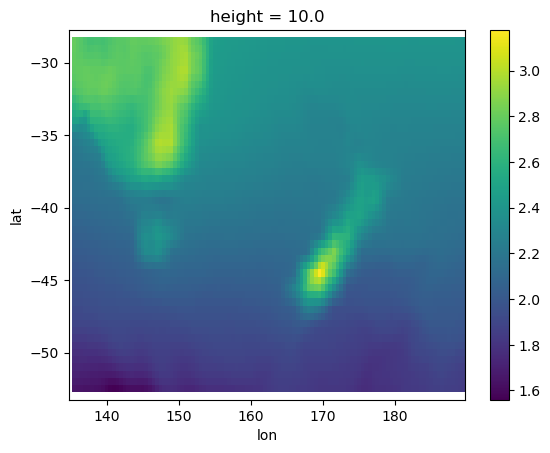

In [34]:
con_theta.isel(phase=0).mean(dim='time').plot()

/g/data/hh5/public/apps/miniconda3/envs/analysis3-23.04/lib/python3.9/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in multiply
  return func(*(_execute_task(a, cache) for a in args))
/g/data/hh5/public/apps/miniconda3/envs/analysis3-23.04/lib/python3.9/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in divide
  return func(*(_execute_task(a, cache) for a in args))


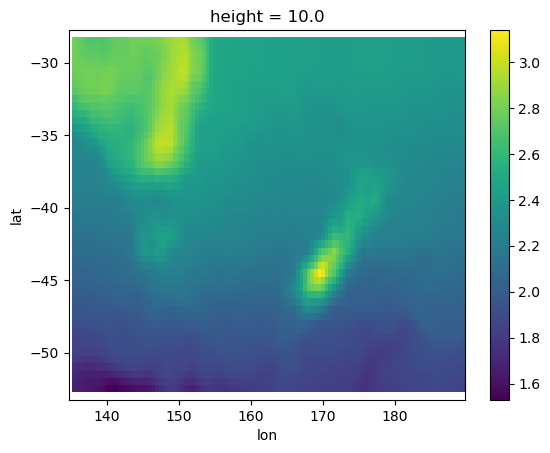

In [35]:
alt_theta.isel(phase=0).mean(dim='time').plot()

In [36]:
diff_theta = alt_theta.isel(phase=0).mean(dim='time') - con_theta.isel(phase=0).mean(dim='time')

In [37]:
diff_theta

<xarray.DataArray (lat: 51, lon: 110)>
dask.array<sub, shape=(51, 110), dtype=float32, chunksize=(51, 110), chunktype=numpy.ndarray>
Coordinates:
    height   float64 10.0
  * lat      (lat) float64 -53.0 -52.5 -52.0 -51.5 ... -29.5 -29.0 -28.5 -28.0
  * lon      (lon) float64 135.0 135.5 136.0 136.5 ... 188.0 188.5 189.0 189.5

/g/data/hh5/public/apps/miniconda3/envs/analysis3-23.04/lib/python3.9/site-packages/dask/core.py:121: RuntimeWarning: divide by zero encountered in divide
  return func(*(_execute_task(a, cache) for a in args))
/g/data/hh5/public/apps/miniconda3/envs/analysis3-23.04/lib/python3.9/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in divide
  return func(*(_execute_task(a, cache) for a in args))
/g/data/hh5/public/apps/miniconda3/envs/analysis3-23.04/lib/python3.9/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in multiply
  return func(*(_execute_task(a, cache) for a in args))


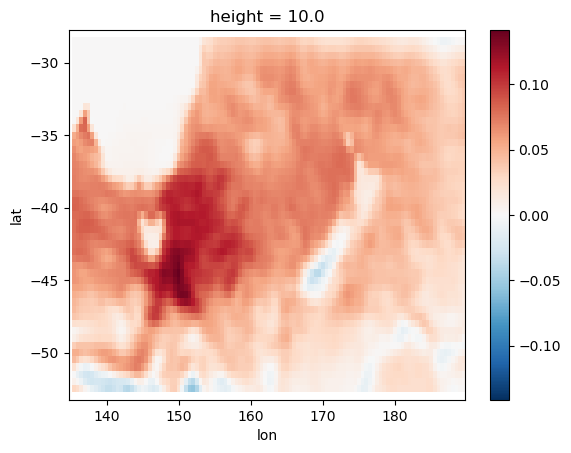

In [38]:
diff_theta.plot()

## Differentiate T along 'x' axis and 'y' axis

Given you’re on the sphere, you can either fix the distance in km or in degrees, but not both. Latitude grids will always have the same size both in degrees and km, but if it’s 0.5 degrees, then it’s not 50km, but rather the total circumference (2*pi*R) times delta-latitude (0.5/360) = 55.641km.
In longitude, the circumference reduces as we go towards the pole. It is now 2*pi*R*cos(lat). For instance, at 40S, your grid spacing is 2*pi*R*cos(-40)*0.5/360 = 42.623km.


Mean temperature | potential temperature (theta)

In [90]:
mean_temp_gradient_x = (con_temp.isel(phase=0).differentiate('lon')).mean(dim='time')/42623 ## look into accurate values for dx
mean_temp_gradient_y = (con_temp.isel(phase=0).differentiate('lat')).mean(dim='time')/55641

In [39]:
#mean_temp_gradient_x = (con_temp.isel(phase=0).differentiate('lon')).mean(dim='time')/42623 ## look into accurate values for dx
#mean_temp_gradient_y = (con_temp.isel(phase=0).differentiate('lat')).mean(dim='time')/55641

mean_theta_gradient_x = (con_theta.isel(phase=0).differentiate('lon')).mean(dim='time')/42623 ## look into accurate values for dx
mean_theta_gradient_y = (con_theta.isel(phase=0).differentiate('lat')).mean(dim='time')/55641

/jobfs/89614207.gadi-pbs/ipykernel_108962/1353924270.py:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax = plt.subplot(111, projection=ccrs.PlateCarree()) # Specifies the projection for the plots
/jobfs/89614207.gadi-pbs/ipykernel_108962/1353924270.py:17: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap=plt.cm.get_cmap('bwr'),


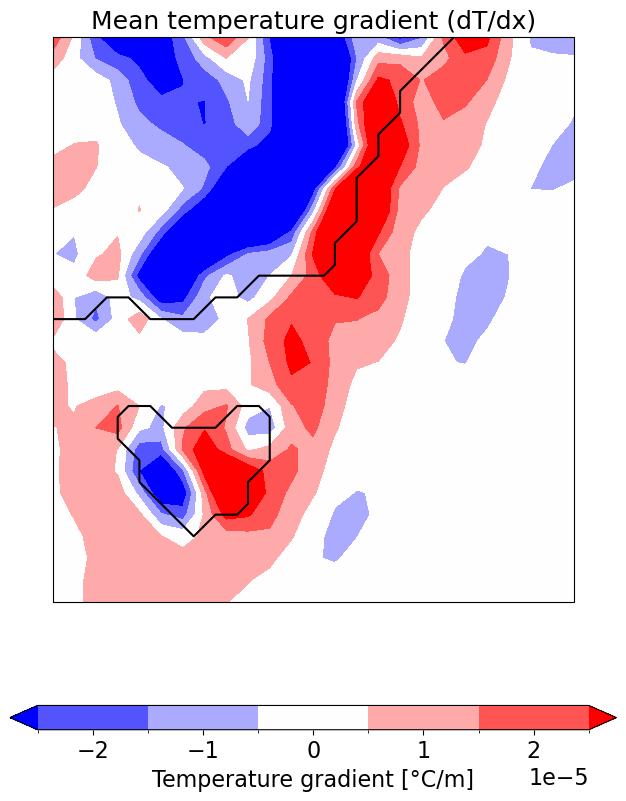

In [83]:
## Mean temp gradient x (AUS)
    
fig, ax = plt.subplots(111, figsize=(16,9))
ax = plt.subplot(111, projection=ccrs.PlateCarree()) # Specifies the projection for the plots
                       
ax.set_extent([143, 155, -45, -32], crs=ccrs.PlateCarree())      


data_low = -2 * 10**-5
data_high = 2 * 10**-5
level_step = 1 * 10**-5
level_low = data_low - level_step/2
level_high = data_high + level_step

contour = mean_temp_gradient_x.plot.contourf(
    levels = np.arange(level_low, level_high, level_step),
    cmap=plt.cm.get_cmap('bwr'),
    extend='both',
    add_colorbar=False
)
        
mask_mean = mask.mean(dim='time')

ax.contour(
    mask_mean.longitude, 
    mask_mean.latitude,
    mask_mean.values,
    levels=[0.5], 
    cmap='gray')
        
label_step = 1 * 10**-5
label_low = data_low
label_high = data_high + label_step/2
cbar = plt.colorbar(
    contour,
    orientation="horizontal",
    ticks=np.arange(label_low, label_high, label_step),
    fraction=0.035,aspect=25, extend='both'
)
cbar.formatter.set_powerlimits((0, 0))
cbar.set_label(label=u'Temperature gradient [\u00B0C/m]', fontsize=16)  
cbar.ax.tick_params(labelsize=16)
cbar.ax.xaxis.offsetText.set_fontsize(16)

plt.title('Mean temperature gradient (dT/dx)', fontsize=18)                       
plt.savefig('/g/data/e14/cp3790/Charuni/ModelExperiment/Revisions/new_mean_temp_gradient_x_aus.png')

/jobfs/89614207.gadi-pbs/ipykernel_108962/2399547940.py:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax = plt.subplot(111, projection=ccrs.PlateCarree()) # Specifies the projection for the plots
/jobfs/89614207.gadi-pbs/ipykernel_108962/2399547940.py:17: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap=plt.cm.get_cmap('bwr'),


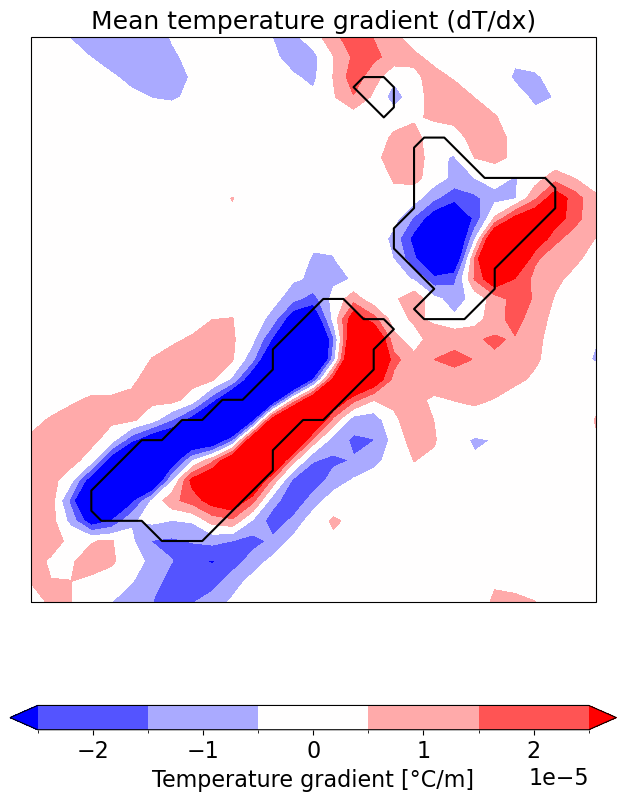

In [84]:
## Mean temp gradient x (NZ)
    
fig, ax = plt.subplots(111, figsize=(16,9))
ax = plt.subplot(111, projection=ccrs.PlateCarree()) # Specifies the projection for the plots
                       
ax.set_extent([165, 179, -48, -34], crs=ccrs.PlateCarree())      


data_low = -2 * 10**-5
data_high = 2 * 10**-5
level_step = 1 * 10**-5
level_low = data_low - level_step/2
level_high = data_high + level_step

contour = mean_temp_gradient_x.plot.contourf(
    levels = np.arange(level_low, level_high, level_step),
    cmap=plt.cm.get_cmap('bwr'),
    extend='both',
    add_colorbar=False
)
        
mask_mean = mask.mean(dim='time')

ax.contour(
    mask_mean.longitude, 
    mask_mean.latitude,
    mask_mean.values,
    levels=[0.5], 
    cmap='gray')
        
label_step = 1 * 10**-5
label_low = data_low
label_high = data_high + label_step/2
cbar = plt.colorbar(
    contour,
    orientation="horizontal",
    ticks=np.arange(label_low, label_high, label_step),
    fraction=0.035,aspect=25, extend='both'
)
cbar.formatter.set_powerlimits((0, 0))
cbar.set_label(label=u'Temperature gradient [\u00B0C/m]', fontsize=16)  
cbar.ax.tick_params(labelsize=16)
cbar.ax.xaxis.offsetText.set_fontsize(16)

plt.title('Mean temperature gradient (dT/dx)', fontsize=18)                       
plt.savefig('/g/data/e14/cp3790/Charuni/ModelExperiment/Revisions/new_mean_temp_gradient_x_nz.png')

/jobfs/89614207.gadi-pbs/ipykernel_108962/438791459.py:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax = plt.subplot(111, projection=ccrs.PlateCarree()) # Specifies the projection for the plots
/jobfs/89614207.gadi-pbs/ipykernel_108962/438791459.py:17: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap=plt.cm.get_cmap('bwr'),


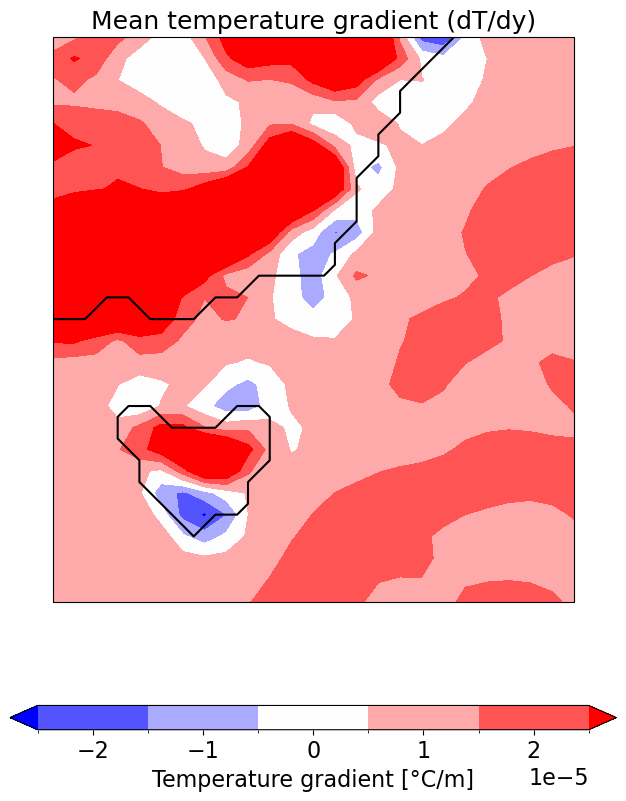

In [85]:
## Mean temp gradient y (AUS)
    
fig, ax = plt.subplots(111, figsize=(16,9))
ax = plt.subplot(111, projection=ccrs.PlateCarree()) # Specifies the projection for the plots
                       
ax.set_extent([143, 155, -45, -32], crs=ccrs.PlateCarree())      


data_low = -2 * 10**-5
data_high = 2 * 10**-5
level_step = 1 * 10**-5
level_low = data_low - level_step/2
level_high = data_high + level_step

contour = mean_temp_gradient_y.plot.contourf(
    levels = np.arange(level_low, level_high, level_step),
    cmap=plt.cm.get_cmap('bwr'),
    extend='both',
    add_colorbar=False
)
        
mask_mean = mask.mean(dim='time')

ax.contour(
    mask_mean.longitude, 
    mask_mean.latitude,
    mask_mean.values,
    levels=[0.5], 
    cmap='gray')
        
label_step = 1 * 10**-5
label_low = data_low
label_high = data_high + label_step/2
cbar = plt.colorbar(
    contour,
    orientation="horizontal",
    ticks=np.arange(label_low, label_high, label_step),
    fraction=0.035,aspect=25, extend='both'
)
cbar.formatter.set_powerlimits((0, 0))
cbar.set_label(label=u'Temperature gradient [\u00B0C/m]', fontsize=16)  
cbar.ax.tick_params(labelsize=16)
cbar.ax.xaxis.offsetText.set_fontsize(16)

plt.title('Mean temperature gradient (dT/dy)', fontsize=18)                       
plt.savefig('/g/data/e14/cp3790/Charuni/ModelExperiment/Revisions/new_mean_temp_gradient_y_aus.png')

/jobfs/89614207.gadi-pbs/ipykernel_108962/2369979913.py:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax = plt.subplot(111, projection=ccrs.PlateCarree()) # Specifies the projection for the plots
/jobfs/89614207.gadi-pbs/ipykernel_108962/2369979913.py:17: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap=plt.cm.get_cmap('bwr'),


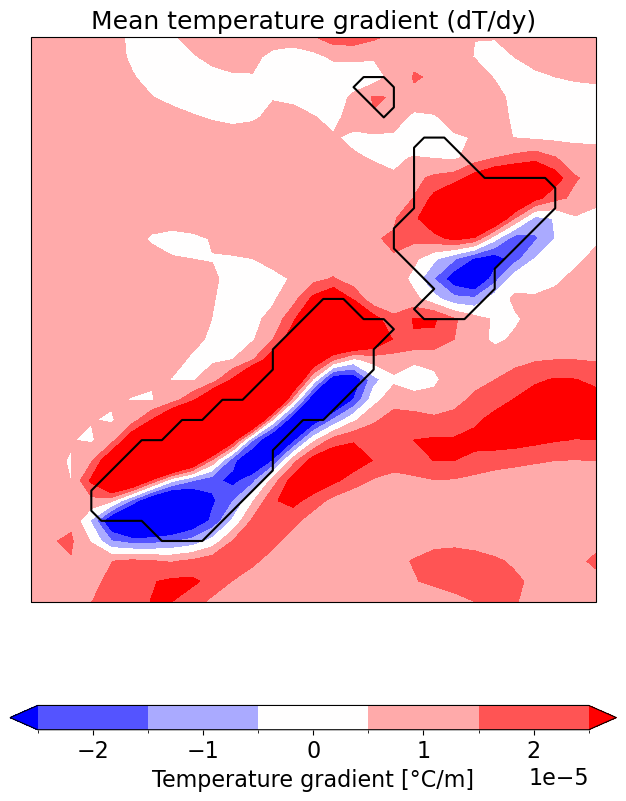

In [86]:
## Mean temp gradient y (NZ)
    
fig, ax = plt.subplots(111, figsize=(16,9))
ax = plt.subplot(111, projection=ccrs.PlateCarree()) # Specifies the projection for the plots
                       
ax.set_extent([165, 179, -48, -34], crs=ccrs.PlateCarree())      


data_low = -2 * 10**-5
data_high = 2 * 10**-5
level_step = 1 * 10**-5
level_low = data_low - level_step/2
level_high = data_high + level_step

contour = mean_temp_gradient_y.plot.contourf(
    levels = np.arange(level_low, level_high, level_step),
    cmap=plt.cm.get_cmap('bwr'),
    extend='both',
    add_colorbar=False
)
        
mask_mean = mask.mean(dim='time')

ax.contour(
    mask_mean.longitude, 
    mask_mean.latitude,
    mask_mean.values,
    levels=[0.5], 
    cmap='gray')
        
label_step = 1 * 10**-5
label_low = data_low
label_high = data_high + label_step/2
cbar = plt.colorbar(
    contour,
    orientation="horizontal",
    ticks=np.arange(label_low, label_high, label_step),
    fraction=0.035,aspect=25, extend='both'
)
cbar.formatter.set_powerlimits((0, 0))
cbar.set_label(label=u'Temperature gradient [\u00B0C/m]', fontsize=16)  
cbar.ax.tick_params(labelsize=16)
cbar.ax.xaxis.offsetText.set_fontsize(16)

plt.title('Mean temperature gradient (dT/dy)', fontsize=18)                       
plt.savefig('/g/data/e14/cp3790/Charuni/ModelExperiment/Revisions/new_mean_temp_gradient_y_nz.png')

Anomalous temperature | potential temperature

In [138]:
anom_temp_gradient_x = (diff_temp.isel(phase=1).differentiate('lon')).mean(dim='time')/42623 ## look into accurate values for dx
anom_temp_gradient_y = (diff_temp.isel(phase=1).differentiate('lat')).mean(dim='time')/55641

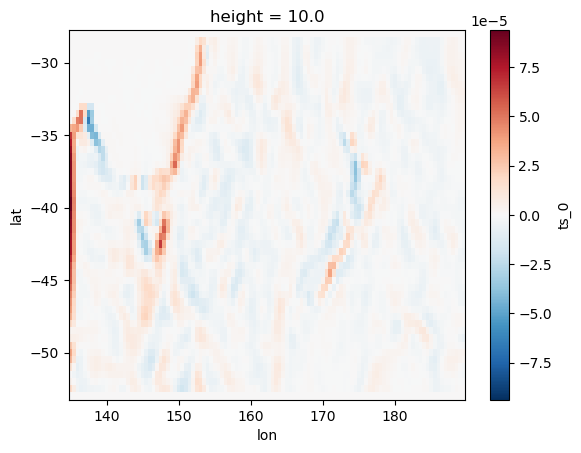

In [88]:
anom_temp_gradient_x.plot()

In [40]:
#anom_temp_gradient_x = (diff_temp.isel(phase=0).differentiate('lon')).mean(dim='time').mean(dim='event_month')/42623 ## look into accurate values for dx
#anom_temp_gradient_y = (diff_temp.isel(phase=0).differentiate('lat')).mean(dim='time').mean(dim='event_month')/55641

#anom_theta_gradient_x = (diff_theta.isel(phase=0).differentiate('lon')).mean(dim='time')/42623 ## look into accurate values for dx
#anom_theta_gradient_y = (diff_theta.isel(phase=0).differentiate('lat')).mean(dim='time')/55641

anom_theta_gradient_x = (diff_theta.differentiate('lon'))/42623 ## look into accurate values for dx
anom_theta_gradient_y = (diff_theta.differentiate('lat'))/55641

/g/data/hh5/public/apps/miniconda3/envs/analysis3-23.04/lib/python3.9/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in multiply
  return func(*(_execute_task(a, cache) for a in args))
/g/data/hh5/public/apps/miniconda3/envs/analysis3-23.04/lib/python3.9/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in divide
  return func(*(_execute_task(a, cache) for a in args))
/g/data/hh5/public/apps/miniconda3/envs/analysis3-23.04/lib/python3.9/site-packages/dask/core.py:121: RuntimeWarning: divide by zero encountered in divide
  return func(*(_execute_task(a, cache) for a in args))


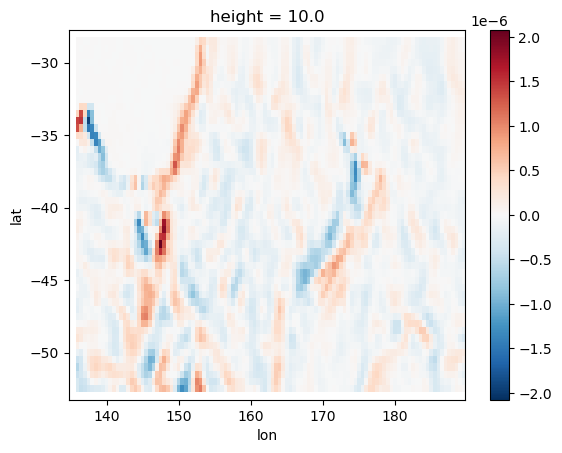

In [146]:
anom_theta_gradient_x.plot()

/jobfs/89614207.gadi-pbs/ipykernel_108962/1186881905.py:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax = plt.subplot(111, projection=ccrs.PlateCarree()) # Specifies the projection for the plots
/jobfs/89614207.gadi-pbs/ipykernel_108962/1186881905.py:17: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap=plt.cm.get_cmap('bwr'),


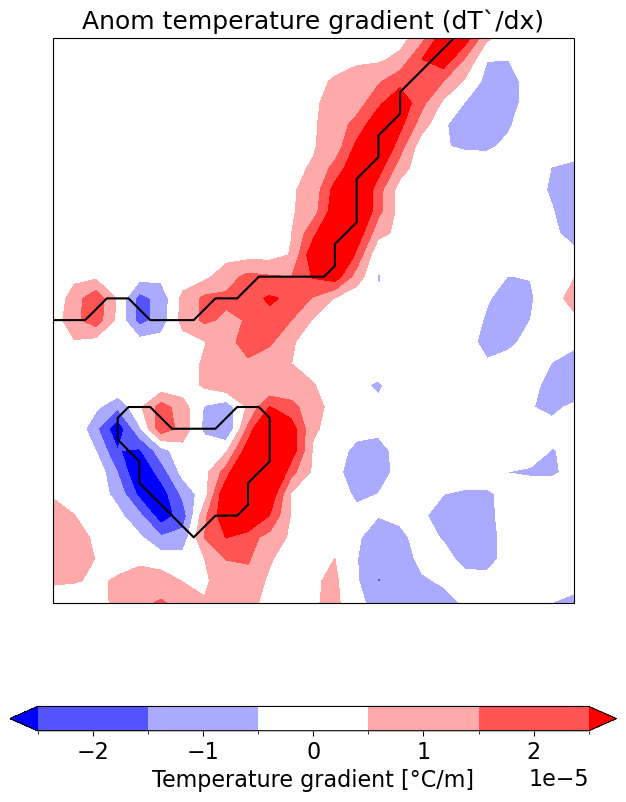

In [88]:
## Anom temp gradient x (AUS)
    
fig, ax = plt.subplots(111, figsize=(16,9))
ax = plt.subplot(111, projection=ccrs.PlateCarree()) # Specifies the projection for the plots
                       
ax.set_extent([143, 155, -45, -32], crs=ccrs.PlateCarree())      


data_low = -2 * 10**-5
data_high = 2 * 10**-5
level_step = 1 * 10**-5
level_low = data_low - level_step/2
level_high = data_high + level_step

contour = anom_temp_gradient_x.plot.contourf(
    levels = np.arange(level_low, level_high, level_step),
    cmap=plt.cm.get_cmap('bwr'),
    extend='both',
    add_colorbar=False
)
        
mask_mean = mask.mean(dim='time')

ax.contour(
    mask_mean.longitude, 
    mask_mean.latitude,
    mask_mean.values,
    levels=[0.5], 
    cmap='gray')
        
label_step = 1 * 10**-5
label_low = data_low
label_high = data_high + label_step/2
cbar = plt.colorbar(
    contour,
    orientation="horizontal",
    ticks=np.arange(label_low, label_high, label_step),
    fraction=0.035,aspect=25, extend='both'
)
cbar.formatter.set_powerlimits((0, 0))
cbar.set_label(label=u'Temperature gradient [\u00B0C/m]', fontsize=16)  
cbar.ax.tick_params(labelsize=16)
cbar.ax.xaxis.offsetText.set_fontsize(16)

plt.title('Anom temperature gradient (dT`/dx)', fontsize=18)                       
plt.savefig('/g/data/e14/cp3790/Charuni/ModelExperiment/Revisions/new_anom_temp_gradient_x_aus.png')

/jobfs/89614207.gadi-pbs/ipykernel_108962/1885825756.py:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax = plt.subplot(111, projection=ccrs.PlateCarree()) # Specifies the projection for the plots
/jobfs/89614207.gadi-pbs/ipykernel_108962/1885825756.py:17: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap=plt.cm.get_cmap('bwr'),


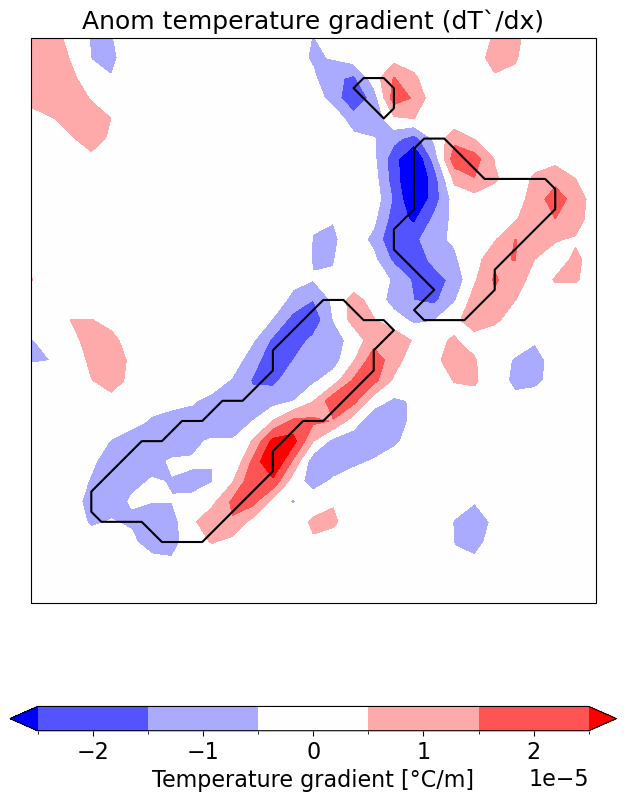

In [89]:
## Anom temp gradient x (NZ)
    
fig, ax = plt.subplots(111, figsize=(16,9))
ax = plt.subplot(111, projection=ccrs.PlateCarree()) # Specifies the projection for the plots
                       
ax.set_extent([165, 179, -48, -34], crs=ccrs.PlateCarree())      


data_low = -2 * 10**-5
data_high = 2 * 10**-5
level_step = 1 * 10**-5
level_low = data_low - level_step/2
level_high = data_high + level_step

contour = anom_temp_gradient_x.plot.contourf(
    levels = np.arange(level_low, level_high, level_step),
    cmap=plt.cm.get_cmap('bwr'),
    extend='both',
    add_colorbar=False
)
        
mask_mean = mask.mean(dim='time')

ax.contour(
    mask_mean.longitude, 
    mask_mean.latitude,
    mask_mean.values,
    levels=[0.5], 
    cmap='gray')
        
label_step = 1 * 10**-5
label_low = data_low
label_high = data_high + label_step/2
cbar = plt.colorbar(
    contour,
    orientation="horizontal",
    ticks=np.arange(label_low, label_high, label_step),
    fraction=0.035,aspect=25, extend='both'
)
cbar.formatter.set_powerlimits((0, 0))
cbar.set_label(label=u'Temperature gradient [\u00B0C/m]', fontsize=16)  
cbar.ax.tick_params(labelsize=16)
cbar.ax.xaxis.offsetText.set_fontsize(16)

plt.title('Anom temperature gradient (dT`/dx)', fontsize=18)                       
plt.savefig('/g/data/e14/cp3790/Charuni/ModelExperiment/Revisions/new_anom_temp_gradient_x_nz.png')

/jobfs/89614207.gadi-pbs/ipykernel_108962/3299743471.py:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax = plt.subplot(111, projection=ccrs.PlateCarree()) # Specifies the projection for the plots
/jobfs/89614207.gadi-pbs/ipykernel_108962/3299743471.py:17: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap=plt.cm.get_cmap('bwr'),


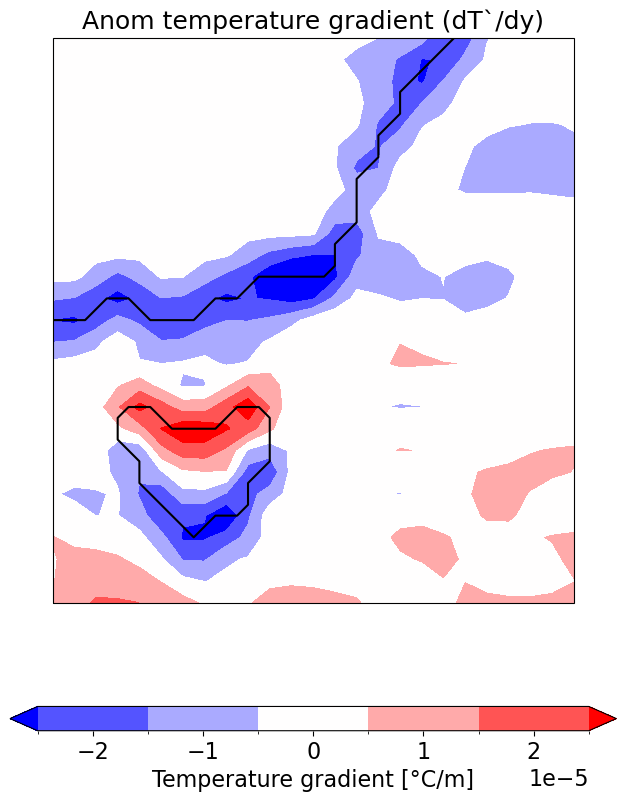

In [90]:
## Anom temp gradient y (AUS)
    
fig, ax = plt.subplots(111, figsize=(16,9))
ax = plt.subplot(111, projection=ccrs.PlateCarree()) # Specifies the projection for the plots
                       
ax.set_extent([143, 155, -45, -32], crs=ccrs.PlateCarree())      


data_low = -2 * 10**-5
data_high = 2 * 10**-5
level_step = 1 * 10**-5
level_low = data_low - level_step/2
level_high = data_high + level_step

contour = anom_temp_gradient_y.plot.contourf(
    levels = np.arange(level_low, level_high, level_step),
    cmap=plt.cm.get_cmap('bwr'),
    extend='both',
    add_colorbar=False
)
        
mask_mean = mask.mean(dim='time')

ax.contour(
    mask_mean.longitude, 
    mask_mean.latitude,
    mask_mean.values,
    levels=[0.5], 
    cmap='gray')
        
label_step = 1 * 10**-5
label_low = data_low
label_high = data_high + label_step/2
cbar = plt.colorbar(
    contour,
    orientation="horizontal",
    ticks=np.arange(label_low, label_high, label_step),
    fraction=0.035,aspect=25, extend='both'
)
cbar.formatter.set_powerlimits((0, 0))
cbar.set_label(label=u'Temperature gradient [\u00B0C/m]', fontsize=16)  
cbar.ax.tick_params(labelsize=16)
cbar.ax.xaxis.offsetText.set_fontsize(16)

plt.title('Anom temperature gradient (dT`/dy)', fontsize=18)                       
plt.savefig('/g/data/e14/cp3790/Charuni/ModelExperiment/Revisions/new_anom_temp_gradient_y_aus.png')

/jobfs/89614207.gadi-pbs/ipykernel_108962/4152830212.py:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax = plt.subplot(111, projection=ccrs.PlateCarree()) # Specifies the projection for the plots
/jobfs/89614207.gadi-pbs/ipykernel_108962/4152830212.py:17: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap=plt.cm.get_cmap('bwr'),


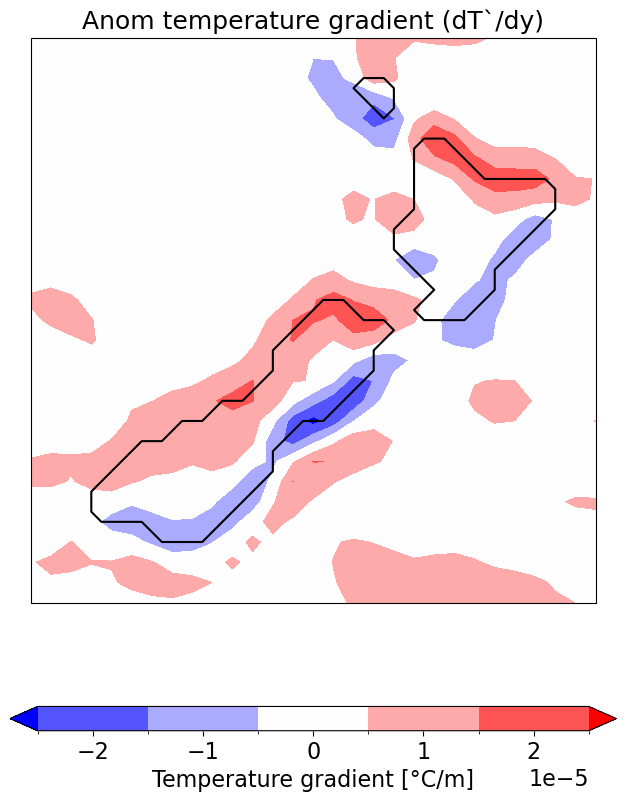

In [109]:
## Anom temp gradient y (NZ)
    
fig, ax = plt.subplots(111, figsize=(16,9))
ax = plt.subplot(111, projection=ccrs.PlateCarree()) # Specifies the projection for the plots
                       
ax.set_extent([165, 179, -48, -34], crs=ccrs.PlateCarree())      


data_low = -2 * 10**-5
data_high = 2 * 10**-5
level_step = 1 * 10**-5
level_low = data_low - level_step/2
level_high = data_high + level_step

contour = anom_temp_gradient_y.plot.contourf(
    levels = np.arange(level_low, level_high, level_step),
    cmap=plt.cm.get_cmap('bwr'),
    extend='both',
    add_colorbar=False
)
        
mask_mean = mask.mean(dim='time')

ax.contour(
    mask_mean.longitude, 
    mask_mean.latitude,
    mask_mean.values,
    levels=[0.5], 
    cmap='gray')
        
label_step = 1 * 10**-5
label_low = data_low
label_high = data_high + label_step/2
cbar = plt.colorbar(
    contour,
    orientation="horizontal",
    ticks=np.arange(label_low, label_high, label_step),
    fraction=0.035,aspect=25, extend='both'
)
cbar.formatter.set_powerlimits((0, 0))
cbar.set_label(label=u'Temperature gradient [\u00B0C/m]', fontsize=16)  
cbar.ax.tick_params(labelsize=16)
cbar.ax.xaxis.offsetText.set_fontsize(16)

plt.title('Anom temperature gradient (dT`/dy)', fontsize=18)                       
plt.savefig('/g/data/e14/cp3790/Charuni/ModelExperiment/Revisions/new_anom_temp_gradient_y_nz.png')

## Winds

Mean winds

In [41]:
mean_u = con_uas.isel(phase=0).mean(dim='time')
mean_v = con_vas.isel(phase=0).mean(dim='time')

/jobfs/89465028.gadi-pbs/ipykernel_2472265/2884285005.py:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax = plt.subplot(111, projection=ccrs.PlateCarree()) # Specifies the projection for the plots
/jobfs/89465028.gadi-pbs/ipykernel_2472265/2884285005.py:17: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap=plt.cm.get_cmap('bwr'),


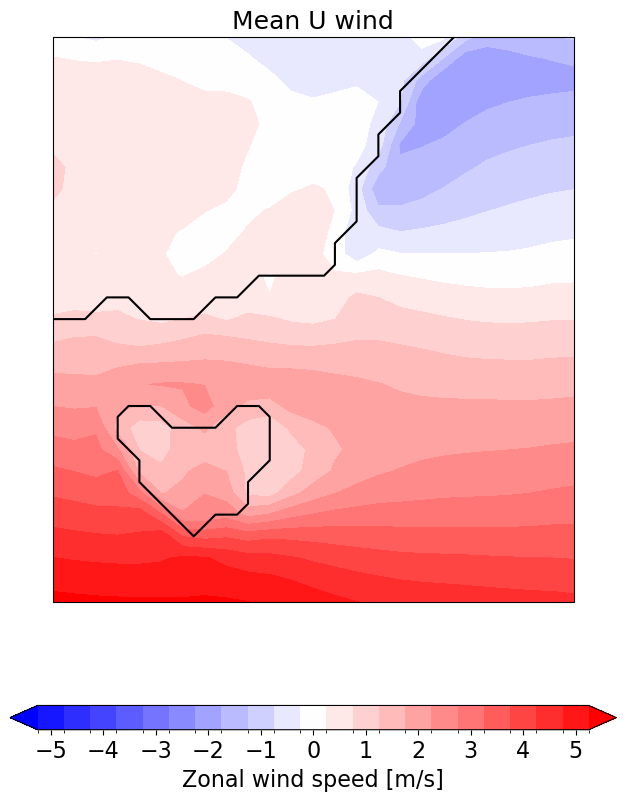

In [182]:
## Mean u (AUS)
    
fig, ax = plt.subplots(111, figsize=(16,9))
ax = plt.subplot(111, projection=ccrs.PlateCarree()) # Specifies the projection for the plots
                       
ax.set_extent([143, 155, -45, -32], crs=ccrs.PlateCarree())      


data_low = -5
data_high = 5
level_step = 0.5 
level_low = data_low - level_step/2
level_high = data_high + level_step

contour = mean_u.plot.contourf(
    levels = np.arange(level_low, level_high, level_step),
    cmap=plt.cm.get_cmap('bwr'),
    extend='both',
    add_colorbar=False
)
        
mask_mean = mask.mean(dim='time')

ax.contour(
    mask_mean.longitude, 
    mask_mean.latitude,
    mask_mean.values,
    levels=[0.5], 
    cmap='gray')
        
label_step = 1 
label_low = data_low
label_high = data_high + label_step/2
cbar = plt.colorbar(
    contour,
    orientation="horizontal",
    ticks=np.arange(label_low, label_high, label_step),
    fraction=0.035,aspect=25, extend='both'
)
cbar.formatter.set_powerlimits((0, 0))
cbar.set_label(label=u'Zonal wind speed [m/s]', fontsize=16)  
cbar.ax.tick_params(labelsize=16)
cbar.ax.xaxis.offsetText.set_fontsize(16)

plt.title('Mean U wind', fontsize=18)                       
plt.savefig('/g/data/e14/cp3790/Charuni/ModelExperiment/Revisions/mean_u_aus.png')

/jobfs/89465028.gadi-pbs/ipykernel_2472265/1646039900.py:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax = plt.subplot(111, projection=ccrs.PlateCarree()) # Specifies the projection for the plots
/jobfs/89465028.gadi-pbs/ipykernel_2472265/1646039900.py:17: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap=plt.cm.get_cmap('bwr'),


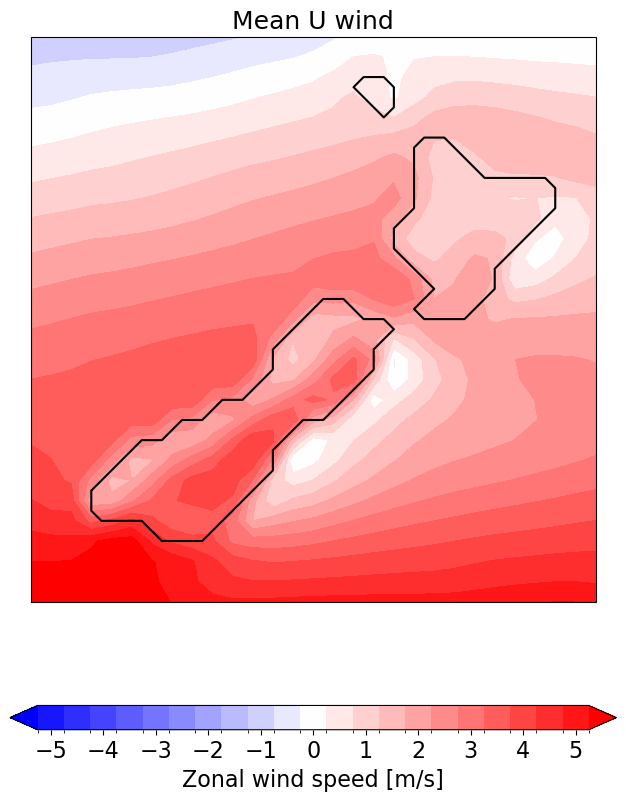

In [189]:
## Mean u (NZ)
    
fig, ax = plt.subplots(111, figsize=(16,9))
ax = plt.subplot(111, projection=ccrs.PlateCarree()) # Specifies the projection for the plots
                       
ax.set_extent([165, 179, -48, -34], crs=ccrs.PlateCarree())      


data_low = -5
data_high = 5
level_step = 0.5 
level_low = data_low - level_step/2
level_high = data_high + level_step

contour = mean_u.plot.contourf(
    levels = np.arange(level_low, level_high, level_step),
    cmap=plt.cm.get_cmap('bwr'),
    extend='both',
    add_colorbar=False
)
        
mask_mean = mask.mean(dim='time')

ax.contour(
    mask_mean.longitude, 
    mask_mean.latitude,
    mask_mean.values,
    levels=[0.5], 
    cmap='gray')
        
label_step = 1 
label_low = data_low
label_high = data_high + label_step/2
cbar = plt.colorbar(
    contour,
    orientation="horizontal",
    ticks=np.arange(label_low, label_high, label_step),
    fraction=0.035,aspect=25, extend='both'
)
cbar.formatter.set_powerlimits((0, 0))
cbar.set_label(label=u'Zonal wind speed [m/s]', fontsize=16)  
cbar.ax.tick_params(labelsize=16)
cbar.ax.xaxis.offsetText.set_fontsize(16)

plt.title('Mean U wind', fontsize=18)                       
plt.savefig('/g/data/e14/cp3790/Charuni/ModelExperiment/Revisions/mean_u_nz.png')

/jobfs/89465028.gadi-pbs/ipykernel_2472265/3913804683.py:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax = plt.subplot(111, projection=ccrs.PlateCarree()) # Specifies the projection for the plots
/jobfs/89465028.gadi-pbs/ipykernel_2472265/3913804683.py:17: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap=plt.cm.get_cmap('bwr'),


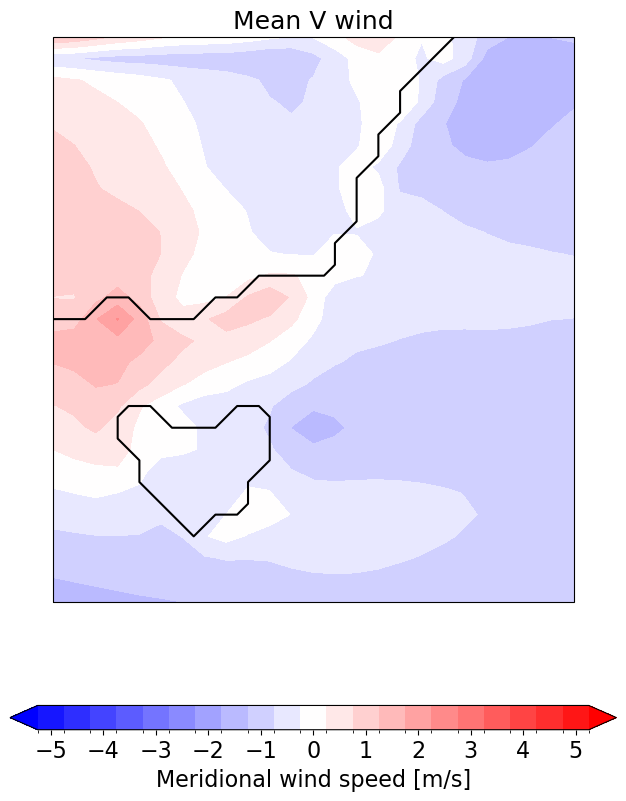

In [190]:
## Mean v (AUS)
    
fig, ax = plt.subplots(111, figsize=(16,9))
ax = plt.subplot(111, projection=ccrs.PlateCarree()) # Specifies the projection for the plots
                       
ax.set_extent([143, 155, -45, -32], crs=ccrs.PlateCarree())      


data_low = -5
data_high = 5
level_step = 0.5 
level_low = data_low - level_step/2
level_high = data_high + level_step

contour = mean_v.plot.contourf(
    levels = np.arange(level_low, level_high, level_step),
    cmap=plt.cm.get_cmap('bwr'),
    extend='both',
    add_colorbar=False
)
        
mask_mean = mask.mean(dim='time')

ax.contour(
    mask_mean.longitude, 
    mask_mean.latitude,
    mask_mean.values,
    levels=[0.5], 
    cmap='gray')
        
label_step = 1 
label_low = data_low
label_high = data_high + label_step/2
cbar = plt.colorbar(
    contour,
    orientation="horizontal",
    ticks=np.arange(label_low, label_high, label_step),
    fraction=0.035,aspect=25, extend='both'
)
cbar.formatter.set_powerlimits((0, 0))
cbar.set_label(label=u'Meridional wind speed [m/s]', fontsize=16)  
cbar.ax.tick_params(labelsize=16)
cbar.ax.xaxis.offsetText.set_fontsize(16)

plt.title('Mean V wind', fontsize=18)                       
plt.savefig('/g/data/e14/cp3790/Charuni/ModelExperiment/Revisions/mean_v_aus.png')

/jobfs/89465028.gadi-pbs/ipykernel_2472265/3243228650.py:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax = plt.subplot(111, projection=ccrs.PlateCarree()) # Specifies the projection for the plots
/jobfs/89465028.gadi-pbs/ipykernel_2472265/3243228650.py:17: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap=plt.cm.get_cmap('bwr'),


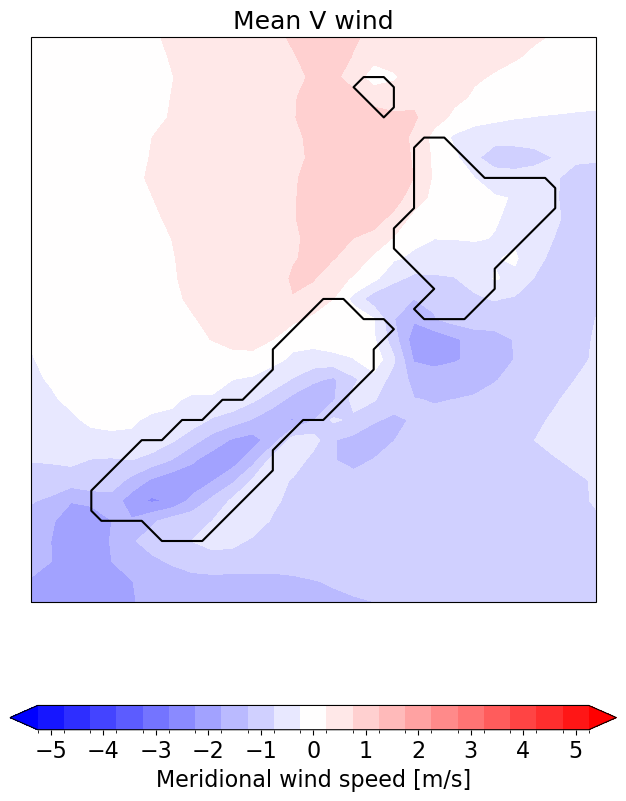

In [191]:
## Mean v (NZ)
    
fig, ax = plt.subplots(111, figsize=(16,9))
ax = plt.subplot(111, projection=ccrs.PlateCarree()) # Specifies the projection for the plots
                       
ax.set_extent([165, 179, -48, -34], crs=ccrs.PlateCarree())      


data_low = -5
data_high = 5
level_step = 0.5 
level_low = data_low - level_step/2
level_high = data_high + level_step

contour = mean_v.plot.contourf(
    levels = np.arange(level_low, level_high, level_step),
    cmap=plt.cm.get_cmap('bwr'),
    extend='both',
    add_colorbar=False
)
        
mask_mean = mask.mean(dim='time')

ax.contour(
    mask_mean.longitude, 
    mask_mean.latitude,
    mask_mean.values,
    levels=[0.5], 
    cmap='gray')
        
label_step = 1 
label_low = data_low
label_high = data_high + label_step/2
cbar = plt.colorbar(
    contour,
    orientation="horizontal",
    ticks=np.arange(label_low, label_high, label_step),
    fraction=0.035,aspect=25, extend='both'
)
cbar.formatter.set_powerlimits((0, 0))
cbar.set_label(label=u'Meridional wind speed [m/s]', fontsize=16)  
cbar.ax.tick_params(labelsize=16)
cbar.ax.xaxis.offsetText.set_fontsize(16)

plt.title('Mean V wind', fontsize=18)                       
plt.savefig('/g/data/e14/cp3790/Charuni/ModelExperiment/Revisions/mean_v_nz.png')

Anomalous winds

In [42]:
anom_u = diff_uas.isel(phase=0).mean(dim='time')
anom_v = diff_vas.isel(phase=0).mean(dim='time')

/jobfs/89465028.gadi-pbs/ipykernel_2472265/3266461943.py:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax = plt.subplot(111, projection=ccrs.PlateCarree()) # Specifies the projection for the plots
/jobfs/89465028.gadi-pbs/ipykernel_2472265/3266461943.py:17: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap=plt.cm.get_cmap('bwr'),


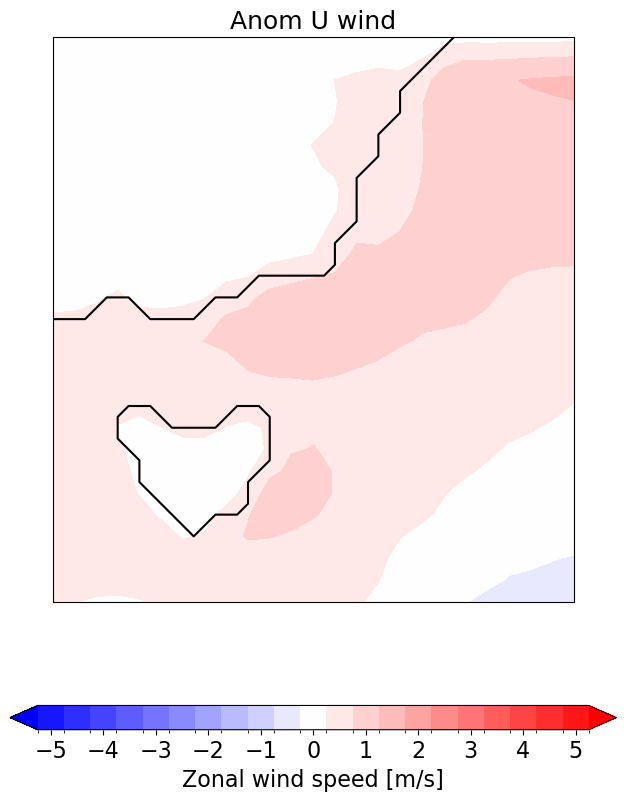

In [183]:
## Anom u (AUS)
    
fig, ax = plt.subplots(111, figsize=(16,9))
ax = plt.subplot(111, projection=ccrs.PlateCarree()) # Specifies the projection for the plots
                       
ax.set_extent([143, 155, -45, -32], crs=ccrs.PlateCarree())      


data_low = -5
data_high = 5
level_step = 0.5 
level_low = data_low - level_step/2
level_high = data_high + level_step

contour = anom_u.plot.contourf(
    levels = np.arange(level_low, level_high, level_step),
    cmap=plt.cm.get_cmap('bwr'),
    extend='both',
    add_colorbar=False
)
        
mask_mean = mask.mean(dim='time')

ax.contour(
    mask_mean.longitude, 
    mask_mean.latitude,
    mask_mean.values,
    levels=[0.5], 
    cmap='gray')
        
label_step = 1 
label_low = data_low
label_high = data_high + label_step/2
cbar = plt.colorbar(
    contour,
    orientation="horizontal",
    ticks=np.arange(label_low, label_high, label_step),
    fraction=0.035,aspect=25, extend='both'
)
cbar.formatter.set_powerlimits((0, 0))
cbar.set_label(label=u'Zonal wind speed [m/s]', fontsize=16)  
cbar.ax.tick_params(labelsize=16)
cbar.ax.xaxis.offsetText.set_fontsize(16)

plt.title('Anom U wind', fontsize=18)                       
plt.savefig('/g/data/e14/cp3790/Charuni/ModelExperiment/Revisions/anom_u_aus.png')

/jobfs/89465028.gadi-pbs/ipykernel_2472265/2710439583.py:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax = plt.subplot(111, projection=ccrs.PlateCarree()) # Specifies the projection for the plots
/jobfs/89465028.gadi-pbs/ipykernel_2472265/2710439583.py:17: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap=plt.cm.get_cmap('bwr'),


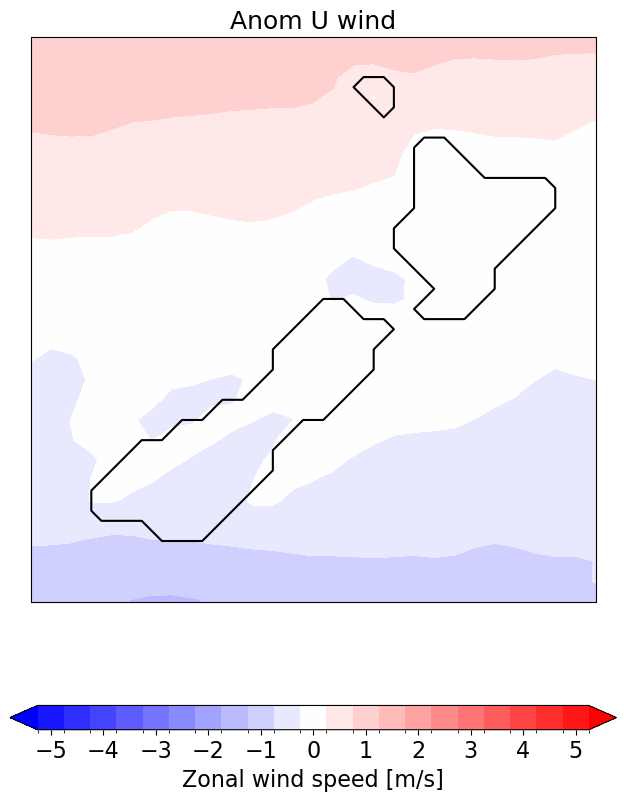

In [192]:
## Anom u (NZ)
    
fig, ax = plt.subplots(111, figsize=(16,9))
ax = plt.subplot(111, projection=ccrs.PlateCarree()) # Specifies the projection for the plots
                       
ax.set_extent([165, 179, -48, -34], crs=ccrs.PlateCarree())      


data_low = -5
data_high = 5
level_step = 0.5 
level_low = data_low - level_step/2
level_high = data_high + level_step

contour = anom_u.plot.contourf(
    levels = np.arange(level_low, level_high, level_step),
    cmap=plt.cm.get_cmap('bwr'),
    extend='both',
    add_colorbar=False
)
        
mask_mean = mask.mean(dim='time')

ax.contour(
    mask_mean.longitude, 
    mask_mean.latitude,
    mask_mean.values,
    levels=[0.5], 
    cmap='gray')
        
label_step = 1 
label_low = data_low
label_high = data_high + label_step/2
cbar = plt.colorbar(
    contour,
    orientation="horizontal",
    ticks=np.arange(label_low, label_high, label_step),
    fraction=0.035,aspect=25, extend='both'
)
cbar.formatter.set_powerlimits((0, 0))
cbar.set_label(label=u'Zonal wind speed [m/s]', fontsize=16)  
cbar.ax.tick_params(labelsize=16)
cbar.ax.xaxis.offsetText.set_fontsize(16)

plt.title('Anom U wind', fontsize=18)                       
plt.savefig('/g/data/e14/cp3790/Charuni/ModelExperiment/Revisions/anom_u_nz.png')

/jobfs/89465028.gadi-pbs/ipykernel_2472265/2307194943.py:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax = plt.subplot(111, projection=ccrs.PlateCarree()) # Specifies the projection for the plots
/jobfs/89465028.gadi-pbs/ipykernel_2472265/2307194943.py:17: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap=plt.cm.get_cmap('bwr'),


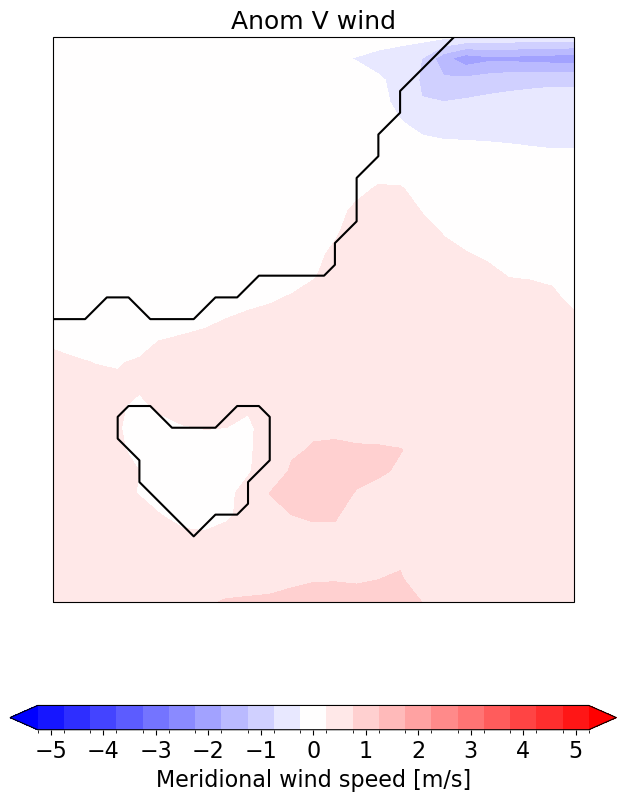

In [194]:
## Anom v (AUS)
    
fig, ax = plt.subplots(111, figsize=(16,9))
ax = plt.subplot(111, projection=ccrs.PlateCarree()) # Specifies the projection for the plots
                       
ax.set_extent([143, 155, -45, -32], crs=ccrs.PlateCarree())      


data_low = -5
data_high = 5
level_step = 0.5 
level_low = data_low - level_step/2
level_high = data_high + level_step

contour = anom_v.plot.contourf(
    levels = np.arange(level_low, level_high, level_step),
    cmap=plt.cm.get_cmap('bwr'),
    extend='both',
    add_colorbar=False
)
        
mask_mean = mask.mean(dim='time')

ax.contour(
    mask_mean.longitude, 
    mask_mean.latitude,
    mask_mean.values,
    levels=[0.5], 
    cmap='gray')
        
label_step = 1 
label_low = data_low
label_high = data_high + label_step/2
cbar = plt.colorbar(
    contour,
    orientation="horizontal",
    ticks=np.arange(label_low, label_high, label_step),
    fraction=0.035,aspect=25, extend='both'
)
cbar.formatter.set_powerlimits((0, 0))
cbar.set_label(label=u'Meridional wind speed [m/s]', fontsize=16)  
cbar.ax.tick_params(labelsize=16)
cbar.ax.xaxis.offsetText.set_fontsize(16)

plt.title('Anom V wind', fontsize=18)                       
plt.savefig('/g/data/e14/cp3790/Charuni/ModelExperiment/Revisions/anom_v_aus.png')

/jobfs/89465028.gadi-pbs/ipykernel_2472265/2313949942.py:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax = plt.subplot(111, projection=ccrs.PlateCarree()) # Specifies the projection for the plots
/jobfs/89465028.gadi-pbs/ipykernel_2472265/2313949942.py:17: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap=plt.cm.get_cmap('bwr'),


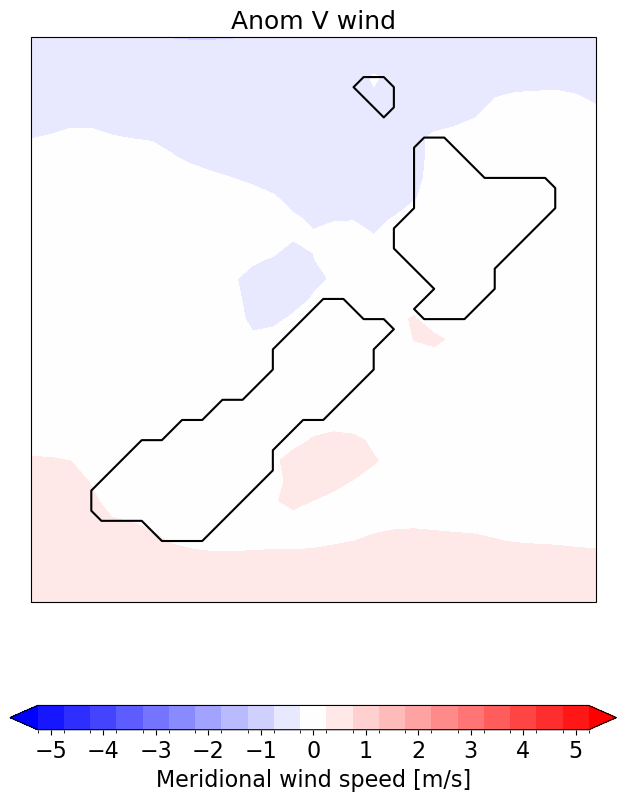

In [193]:
## Anom v (NZ)
    
fig, ax = plt.subplots(111, figsize=(16,9))
ax = plt.subplot(111, projection=ccrs.PlateCarree()) # Specifies the projection for the plots
                       
ax.set_extent([165, 179, -48, -34], crs=ccrs.PlateCarree())      


data_low = -5
data_high = 5
level_step = 0.5 
level_low = data_low - level_step/2
level_high = data_high + level_step

contour = anom_v.plot.contourf(
    levels = np.arange(level_low, level_high, level_step),
    cmap=plt.cm.get_cmap('bwr'),
    extend='both',
    add_colorbar=False
)
        
mask_mean = mask.mean(dim='time')

ax.contour(
    mask_mean.longitude, 
    mask_mean.latitude,
    mask_mean.values,
    levels=[0.5], 
    cmap='gray')
        
label_step = 1 
label_low = data_low
label_high = data_high + label_step/2
cbar = plt.colorbar(
    contour,
    orientation="horizontal",
    ticks=np.arange(label_low, label_high, label_step),
    fraction=0.035,aspect=25, extend='both'
)
cbar.formatter.set_powerlimits((0, 0))
cbar.set_label(label=u'Meridional wind speed [m/s]', fontsize=16)  
cbar.ax.tick_params(labelsize=16)
cbar.ax.xaxis.offsetText.set_fontsize(16)

plt.title('Anom V wind', fontsize=18)                       
plt.savefig('/g/data/e14/cp3790/Charuni/ModelExperiment/Revisions/anom_v_nz.png')

## Temp gradient x winds

a. Anomalous wind x Mean temp gradient

b. Anomalous wind x Anom temp gradient 

c. Mean wind x Anom temp gradient

Regrid theta gradient to u/v winds

In [109]:
mean_theta_gradient_x

<xarray.DataArray (lat: 51, lon: 110)>
dask.array<truediv, shape=(51, 110), dtype=float32, chunksize=(51, 110), chunktype=numpy.ndarray>
Coordinates:
    height   float64 10.0
  * lat      (lat) float64 -53.0 -52.5 -52.0 -51.5 ... -29.5 -29.0 -28.5 -28.0
  * lon      (lon) float64 135.0 135.5 136.0 136.5 ... 188.0 188.5 189.0 189.5

In [113]:
anom_theta_gradient_x 

<xarray.DataArray (lat: 51, lon: 110)>
dask.array<truediv, shape=(51, 110), dtype=float32, chunksize=(51, 110), chunktype=numpy.ndarray>
Coordinates:
    height   float64 10.0
  * lat      (lat) float64 -53.0 -52.5 -52.0 -51.5 ... -29.5 -29.0 -28.5 -28.0
  * lon      (lon) float64 135.0 135.5 136.0 136.5 ... 188.0 188.5 189.0 189.5

In [43]:
regridder_mean_x = xe.Regridder(mean_theta_gradient_x, ds_out, "bilinear") # build regridder 
mean_theta_gradient_x = regridder_con(mean_theta_gradient_x) # apply regridder 

ValueError: The horizontal shape of input data is (51, 110), different from that of the regridder (50, 110)!

In [44]:
regridder_mean_y = xe.Regridder(mean_theta_gradient_y, ds_out, "bilinear") # build regridder 
mean_theta_gradient_y = regridder_con(mean_theta_gradient_y) # apply regridder 

ValueError: The horizontal shape of input data is (51, 110), different from that of the regridder (50, 110)!

In [45]:
regridder_anom_x = xe.Regridder(anom_theta_gradient_x, ds_out, "bilinear") # build regridder 
anom_theta_gradient_x = regridder_con(anom_theta_gradient_x) # apply regridder 

ValueError: The horizontal shape of input data is (51, 110), different from that of the regridder (50, 110)!

In [222]:
regridder_anom_y = xe.Regridder(anom_theta_gradient_y, ds_out, "bilinear") # build regridder 
anom_theta_gradient_y = regridder_con(anom_theta_gradient_y) # apply regridder 

In [46]:
#anom_wind_mean_temp = -1*((mean_temp_gradient_x * anom_u*86400) + (mean_temp_gradient_y * anom_v*86400))
#anom_wind_anom_temp = -1*((anom_temp_gradient_x * anom_u*86400) + (anom_temp_gradient_y * anom_v*86400))
#mean_wind_anom_temp = -1*((anom_temp_gradient_x * mean_u*86400) + (anom_temp_gradient_y * mean_v*86400))

anom_wind_mean_theta = -1*((mean_theta_gradient_x * anom_u*86400) + (mean_theta_gradient_y * anom_v*86400))
anom_wind_anom_theta = -1*((anom_theta_gradient_x * anom_u*86400) + (anom_theta_gradient_y * anom_v*86400))
mean_wind_anom_theta = -1*((anom_theta_gradient_x * mean_u*86400) + (anom_theta_gradient_y * mean_v*86400))

In [161]:
mean_wind_anom_theta

<xarray.DataArray (lat: 51, lon: 110)>
dask.array<mul, shape=(51, 110), dtype=float64, chunksize=(51, 110), chunktype=numpy.ndarray>
Coordinates:
    height   float64 10.0
  * lat      (lat) float64 -53.0 -52.5 -52.0 -51.5 ... -29.5 -29.0 -28.5 -28.0
  * lon      (lon) float64 135.0 135.5 136.0 136.5 ... 188.0 188.5 189.0 189.5

In [47]:
#sum_advective = anom_wind_mean_temp + anom_wind_anom_temp + mean_wind_anom_temp
sum_theta_advective = anom_wind_mean_theta + anom_wind_anom_theta + mean_wind_anom_theta

In [147]:
sum_u = mean_u + anom_u + anom_u
sum_v = mean_v + anom_v + anom_v

## ufuncs has beemn removed from xarray; so I had to use apply_ufunc

a = sum_u.load()
b = sum_v.load()
def magnitude(a, b):
    func = lambda x, y: np.sqrt(x**2 + y**2)
    return xr.apply_ufunc(func, a, b)

abs_sum_u = magnitude(a,b)

In [148]:
## ufuncs has been removed from xarray; so I had to use apply_ufunc

a = mean_u.load()
b = mean_v.load()
def magnitude(a, b):
    func = lambda x, y: np.sqrt(x**2 + y**2)
    return xr.apply_ufunc(func, a, b)

abs_mean_u = magnitude(a,b)

In [149]:
## ufuncs has beemn removed from xarray; so I had to use apply_ufunc

a = anom_u.load()
b = anom_v.load()
def magnitude(a, b):
    func = lambda x, y: np.sqrt(x**2 + y**2)
    return xr.apply_ufunc(func, a, b)

abs_anom_u = magnitude(a,b)

/g/data/hh5/public/apps/miniconda3/envs/analysis3-23.04/lib/python3.9/site-packages/dask/core.py:121: RuntimeWarning: divide by zero encountered in divide
  return func(*(_execute_task(a, cache) for a in args))
/g/data/hh5/public/apps/miniconda3/envs/analysis3-23.04/lib/python3.9/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in divide
  return func(*(_execute_task(a, cache) for a in args))
/g/data/hh5/public/apps/miniconda3/envs/analysis3-23.04/lib/python3.9/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in multiply
  return func(*(_execute_task(a, cache) for a in args))


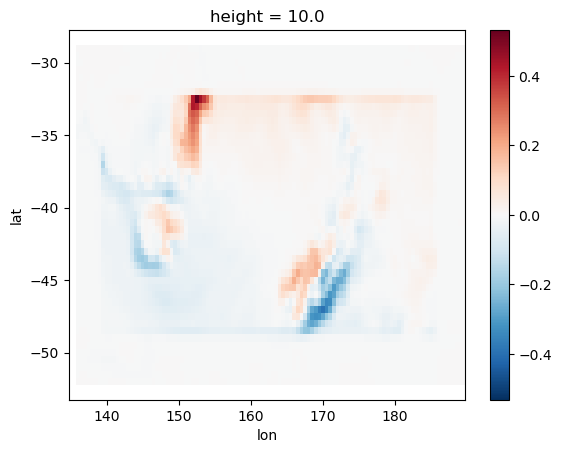

In [167]:
anom_wind_mean_theta.plot()

/jobfs/91384709.gadi-pbs/ipykernel_745825/3680258785.py:7: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax = plt.subplot(111, projection=ccrs.PlateCarree()) # Specifies the projection for the plots
/jobfs/91384709.gadi-pbs/ipykernel_745825/3680258785.py:15: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap=plt.cm.get_cmap('bwr'),
/g/data/hh5/public/apps/miniconda3/envs/analysis3-23.04/lib/python3.9/site-packages/dask/core.py:121: RuntimeWarning: divide by zero encountered in divide
  return func(*(_execute_task(a, cache) for a in args))
/g/data/hh5/public/apps/miniconda3/envs/analysis3-23.04/lib/python3.9/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in divide


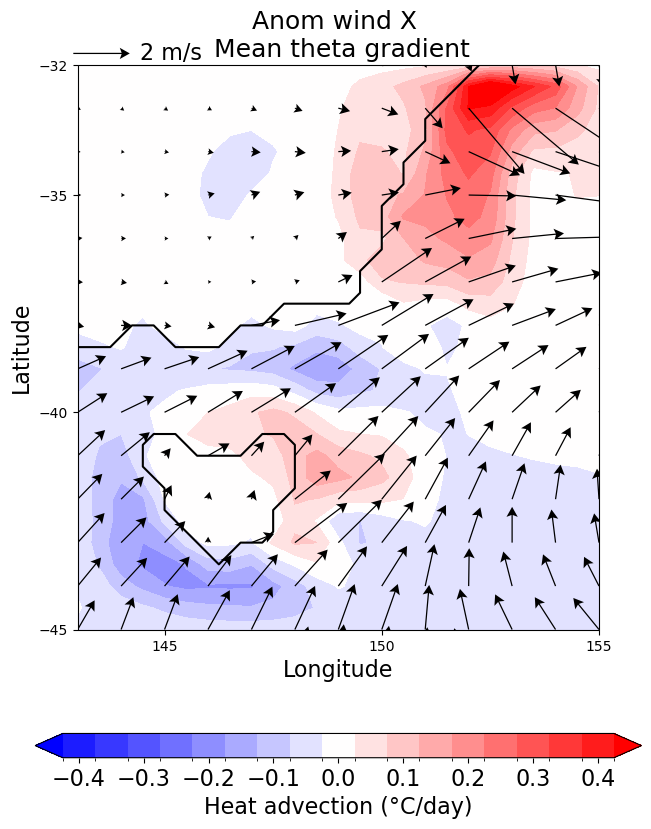

In [49]:
## Anom wind x mean theta gradient (AUS)

x = anom_v['lon'][::2]
y = anom_u['lat'][::2]
    
fig, ax = plt.subplots(111, figsize=(16,9))
ax = plt.subplot(111, projection=ccrs.PlateCarree()) # Specifies the projection for the plots
                       
ax.set_extent([143, 155, -45, -32], crs=ccrs.PlateCarree())       
ax.set_xticks((145, 150, 155), crs=ccrs.PlateCarree())
ax.set_yticks((-45, -40, -35, -32), crs=ccrs.PlateCarree())

contour = anom_wind_mean_theta.plot.contourf( 
    levels = np.arange(-0.425, 0.45, 0.05),
    cmap=plt.cm.get_cmap('bwr'),
    extend='both',
    add_colorbar=False
)
        
mask_mean = mask.mean(dim='time')

ax.contour(
    mask_mean.longitude, 
    mask_mean.latitude,
    mask_mean.values,
    levels=[0.5], 
    cmap='gray')

q = ax.quiver(
    x, y,
    anom_u[::2, ::2],
    anom_v[::2, ::2],
    scale=10,
    units='height', headwidth=9, headlength=8, headaxislength=6.5
)
        
cbar = plt.colorbar(contour, orientation="horizontal",ticks=np.arange(-0.4,0.5,0.1),
                    fraction=0.035,aspect=25, extend='both')
cbar.set_label(label=u'Heat advection (\u00B0C/day)', fontsize=16)  
cbar.ax.tick_params(labelsize=16)

plt.quiverkey(q, 0.1, 1.02, 1, '2 m/s', labelpos='E', fontproperties={'size':16})

plt.xlabel('Longitude',fontsize=16)
plt.ylabel('Latitude', fontsize=16)
plt.title('Anom wind X \n Mean theta gradient', fontsize=18) 

plt.savefig('/g/data/e14/cp3790/Charuni/ModelExperiment/Revisions/anom_wind_mean_pot_theta_wind.png')
#plt.show()

/jobfs/91164646.gadi-pbs/ipykernel_785322/2314533005.py:7: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax = plt.subplot(111, projection=ccrs.PlateCarree()) # Specifies the projection for the plots
/jobfs/91164646.gadi-pbs/ipykernel_785322/2314533005.py:15: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap=plt.cm.get_cmap('bwr'),
/g/data/hh5/public/apps/miniconda3/envs/analysis3-23.04/lib/python3.9/site-packages/dask/core.py:121: RuntimeWarning: divide by zero encountered in divide
  return func(*(_execute_task(a, cache) for a in args))
/g/data/hh5/public/apps/miniconda3/envs/analysis3-23.04/lib/python3.9/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in divide


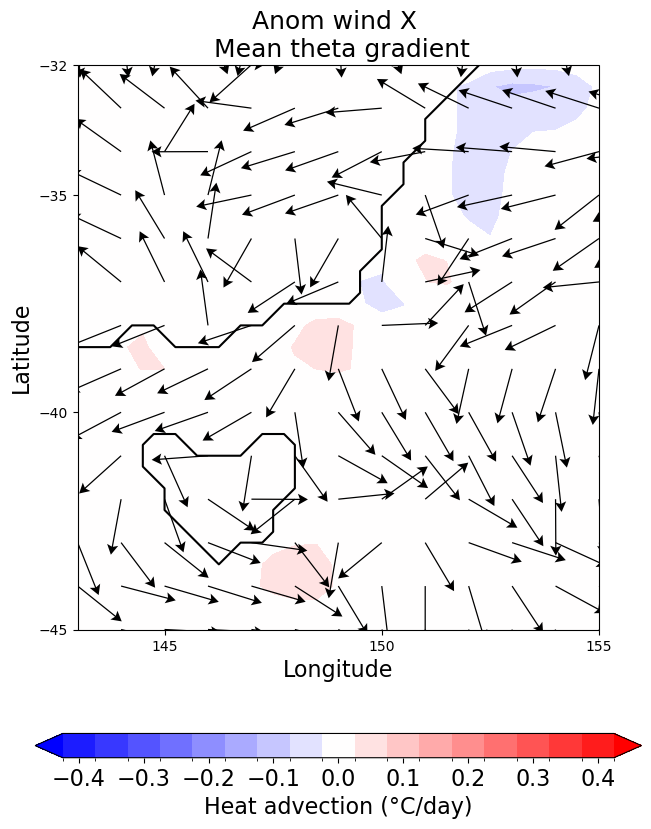

In [150]:
## Anom wind x mean theta gradient (AUS)

x = anom_v['lon'][::2]
y = anom_u['lat'][::2]
    
fig, ax = plt.subplots(111, figsize=(16,9))
ax = plt.subplot(111, projection=ccrs.PlateCarree()) # Specifies the projection for the plots
                       
ax.set_extent([143, 155, -45, -32], crs=ccrs.PlateCarree())       
ax.set_xticks((145, 150, 155), crs=ccrs.PlateCarree())
ax.set_yticks((-45, -40, -35, -32), crs=ccrs.PlateCarree())

contour = anom_wind_mean_theta.plot.contourf( 
    levels = np.arange(-0.425, 0.45, 0.05),
    cmap=plt.cm.get_cmap('bwr'),
    extend='both',
    add_colorbar=False
)
        
mask_mean = mask.mean(dim='time')

ax.contour(
    mask_mean.longitude, 
    mask_mean.latitude,
    mask_mean.values,
    levels=[0.5], 
    cmap='gray')

q = ax.quiver(
    x, y,
    anom_u[::2, ::2],
    anom_v[::2, ::2],
    scale=10,
    units='height', headwidth=9, headlength=8, headaxislength=6.5
)
        
cbar = plt.colorbar(contour, orientation="horizontal",ticks=np.arange(-0.4,0.5,0.1),
                    fraction=0.035,aspect=25, extend='both')
cbar.set_label(label=u'Heat advection (\u00B0C/day)', fontsize=16)  
cbar.ax.tick_params(labelsize=16)

plt.xlabel('Longitude',fontsize=16)
plt.ylabel('Latitude', fontsize=16)
plt.title('Anom wind X \n Mean theta gradient', fontsize=18) 

plt.savefig('/g/data/e14/cp3790/Charuni/ModelExperiment/Revisions/phase2_anom_wind_mean_pot_theta.png')
#plt.show()

/jobfs/91384709.gadi-pbs/ipykernel_745825/2926983865.py:7: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax = plt.subplot(111, projection=ccrs.PlateCarree()) # Specifies the projection for the plots
/jobfs/91384709.gadi-pbs/ipykernel_745825/2926983865.py:15: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap=plt.cm.get_cmap('bwr'),
/g/data/hh5/public/apps/miniconda3/envs/analysis3-23.04/lib/python3.9/site-packages/dask/core.py:121: RuntimeWarning: divide by zero encountered in divide
  return func(*(_execute_task(a, cache) for a in args))
/g/data/hh5/public/apps/miniconda3/envs/analysis3-23.04/lib/python3.9/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in divide


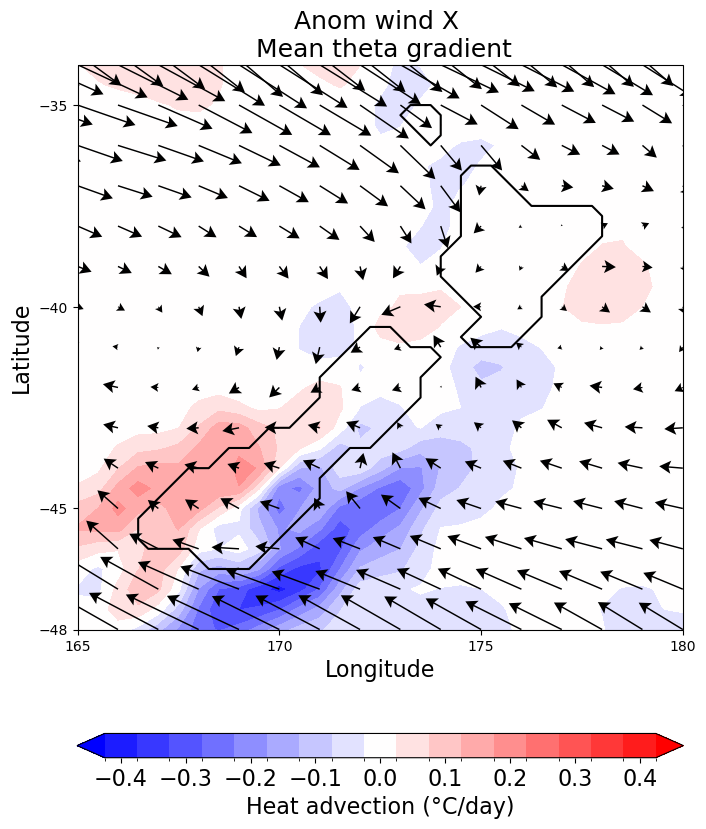

In [55]:
## Anom wind x mean theta gradient (NZ)

x = anom_v['lon'][::2]
y = anom_u['lat'][::2]
    
fig, ax = plt.subplots(111, figsize=(16,9))
ax = plt.subplot(111, projection=ccrs.PlateCarree()) # Specifies the projection for the plots
                       
ax.set_extent([165, 180, -48, -34], crs=ccrs.PlateCarree()) 
ax.set_xticks((165, 170, 175, 180), crs=ccrs.PlateCarree())
ax.set_yticks((-48, -45, -40, -35), crs=ccrs.PlateCarree())

contour = anom_wind_mean_theta.plot.contourf( 
    levels = np.arange(-0.425, 0.45, 0.05),
    cmap=plt.cm.get_cmap('bwr'),
    extend='both',
    add_colorbar=False
)
        
mask_mean = mask.mean(dim='time')

ax.contour(
    mask_mean.longitude, 
    mask_mean.latitude,
    mask_mean.values,
    levels=[0.5], 
    cmap='gray')

q = ax.quiver(
    x, y,
    anom_u[::2, ::2],
    anom_v[::2, ::2],
    scale=10,
    units='height', headwidth=9, headlength=8, headaxislength=6.5
)
        
cbar = plt.colorbar(contour, orientation="horizontal",ticks=np.arange(-0.4,0.5,0.1),
                    fraction=0.035,aspect=25, extend='both')
cbar.set_label(label=u'Heat advection (\u00B0C/day)', fontsize=16)  
cbar.ax.tick_params(labelsize=16)

plt.xlabel('Longitude',fontsize=16)
plt.ylabel('Latitude', fontsize=16)
plt.title('Anom wind X \n Mean theta gradient', fontsize=18) 

plt.savefig('/g/data/e14/cp3790/Charuni/ModelExperiment/Revisions/anom_wind_mean_pot_theta_nz_winds.png')
#plt.show()

/jobfs/91164646.gadi-pbs/ipykernel_785322/2786330710.py:7: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax = plt.subplot(111, projection=ccrs.PlateCarree()) # Specifies the projection for the plots
/jobfs/91164646.gadi-pbs/ipykernel_785322/2786330710.py:15: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap=plt.cm.get_cmap('bwr'),
/g/data/hh5/public/apps/miniconda3/envs/analysis3-23.04/lib/python3.9/site-packages/dask/core.py:121: RuntimeWarning: divide by zero encountered in divide
  return func(*(_execute_task(a, cache) for a in args))
/g/data/hh5/public/apps/miniconda3/envs/analysis3-23.04/lib/python3.9/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in divide


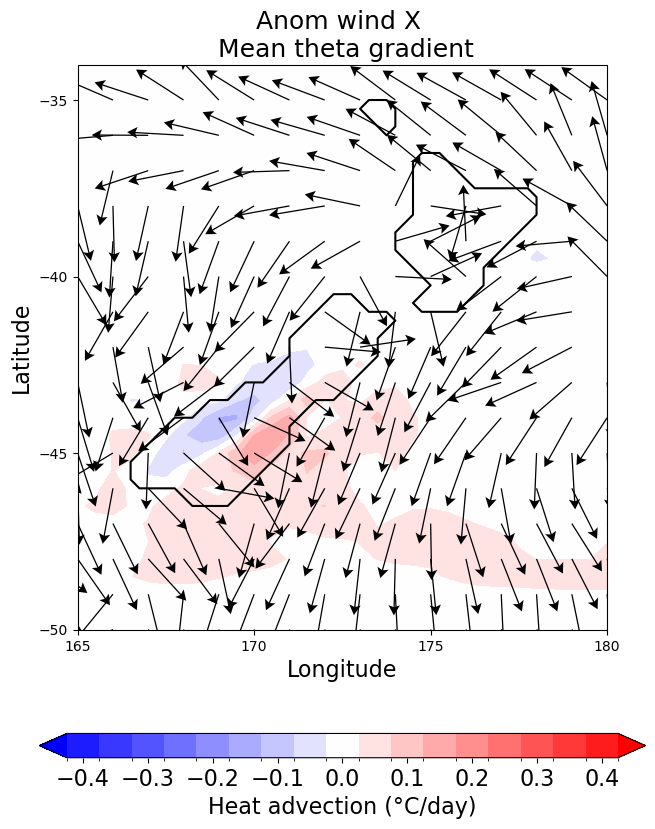

In [151]:
## Anom wind x mean theta gradient (NZ)

x = anom_v['lon'][::2]
y = anom_u['lat'][::2]
    
fig, ax = plt.subplots(111, figsize=(16,9))
ax = plt.subplot(111, projection=ccrs.PlateCarree()) # Specifies the projection for the plots
                       
ax.set_extent([165, 180, -50, -34], crs=ccrs.PlateCarree()) 
ax.set_xticks((165, 170, 175, 180), crs=ccrs.PlateCarree())
ax.set_yticks((-50, -45, -40, -35), crs=ccrs.PlateCarree())

contour = anom_wind_mean_theta.plot.contourf( 
    levels = np.arange(-0.425, 0.45, 0.05),
    cmap=plt.cm.get_cmap('bwr'),
    extend='both',
    add_colorbar=False
)
        
mask_mean = mask.mean(dim='time')

ax.contour(
    mask_mean.longitude, 
    mask_mean.latitude,
    mask_mean.values,
    levels=[0.5], 
    cmap='gray')

q = ax.quiver(
    x, y,
    (anom_u/abs_anom_u)[::2, ::2],
    (anom_v/abs_anom_u)[::2, ::2],
    scale=10,
    units='height', headwidth=9, headlength=8, headaxislength=6.5
)
        
cbar = plt.colorbar(contour, orientation="horizontal",ticks=np.arange(-0.4,0.5,0.1),
                    fraction=0.035,aspect=25, extend='both')
cbar.set_label(label=u'Heat advection (\u00B0C/day)', fontsize=16)  
cbar.ax.tick_params(labelsize=16)

plt.xlabel('Longitude',fontsize=16)
plt.ylabel('Latitude', fontsize=16)
plt.title('Anom wind X \n Mean theta gradient', fontsize=18) 

plt.savefig('/g/data/e14/cp3790/Charuni/ModelExperiment/Revisions/phase2_anom_wind_mean_pot_theta_nz.png')
#plt.show()

/jobfs/91384709.gadi-pbs/ipykernel_745825/2234669980.py:7: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax = plt.subplot(111, projection=ccrs.PlateCarree()) # Specifies the projection for the plots
/jobfs/91384709.gadi-pbs/ipykernel_745825/2234669980.py:15: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap=plt.cm.get_cmap('bwr'),
/g/data/hh5/public/apps/miniconda3/envs/analysis3-23.04/lib/python3.9/site-packages/dask/core.py:121: RuntimeWarning: divide by zero encountered in divide
  return func(*(_execute_task(a, cache) for a in args))
/g/data/hh5/public/apps/miniconda3/envs/analysis3-23.04/lib/python3.9/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in divide


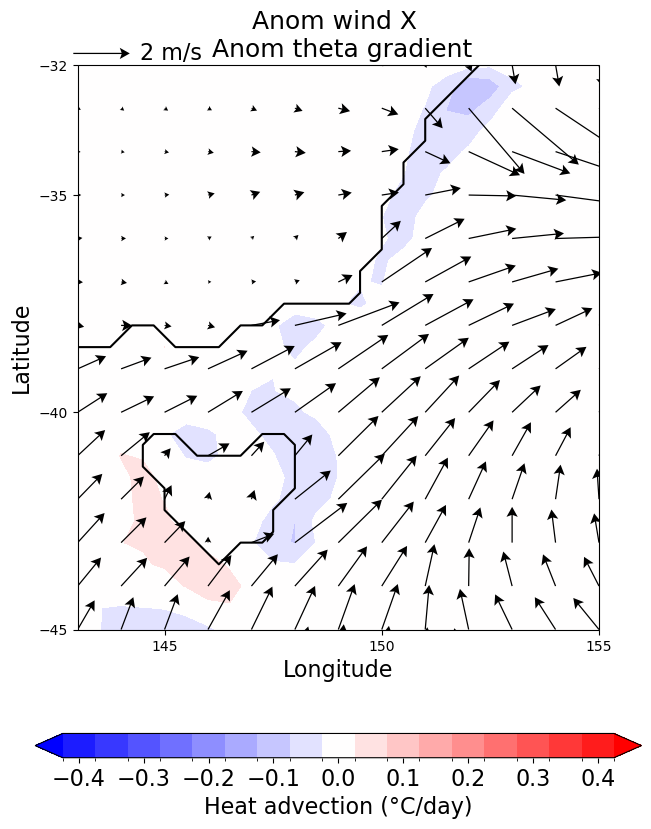

In [51]:
## Anom wind x anom theta gradient (AUS)

x = anom_v['lon'][::2]
y = anom_u['lat'][::2]
    
fig, ax = plt.subplots(111, figsize=(16,9))
ax = plt.subplot(111, projection=ccrs.PlateCarree()) # Specifies the projection for the plots
                       
ax.set_extent([143, 155, -45, -32], crs=ccrs.PlateCarree())       
ax.set_xticks((145, 150, 155), crs=ccrs.PlateCarree())
ax.set_yticks((-45, -40, -35, -32), crs=ccrs.PlateCarree())

contour = anom_wind_anom_theta.plot.contourf( 
    levels = np.arange(-0.425, 0.45, 0.05),
    cmap=plt.cm.get_cmap('bwr'),
    extend='both',
    add_colorbar=False
)
        
mask_mean = mask.mean(dim='time')

ax.contour(
    mask_mean.longitude, 
    mask_mean.latitude,
    mask_mean.values,
    levels=[0.5], 
    cmap='gray')

q = ax.quiver(
    x, y,
    anom_u[::2, ::2],
    anom_v[::2, ::2],
    scale=10,
    units='height', headwidth=9, headlength=8, headaxislength=6.5
)
        
cbar = plt.colorbar(contour, orientation="horizontal",ticks=np.arange(-0.4,0.5,0.1),
                    fraction=0.035,aspect=25, extend='both')
cbar.set_label(label=u'Heat advection (\u00B0C/day)', fontsize=16)  
cbar.ax.tick_params(labelsize=16)

plt.quiverkey(q, 0.1, 1.02, 1, '2 m/s', labelpos='E', fontproperties={'size':16})

plt.xlabel('Longitude',fontsize=16)
plt.ylabel('Latitude', fontsize=16)
plt.title('Anom wind X \n Anom theta gradient', fontsize=18) 

plt.savefig('/g/data/e14/cp3790/Charuni/ModelExperiment/Revisions/anom_wind_anom_pot_theta_aus_winds.png')
#plt.show()

/jobfs/91164646.gadi-pbs/ipykernel_785322/2507427923.py:7: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax = plt.subplot(111, projection=ccrs.PlateCarree()) # Specifies the projection for the plots
/jobfs/91164646.gadi-pbs/ipykernel_785322/2507427923.py:15: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap=plt.cm.get_cmap('bwr'),
/g/data/hh5/public/apps/miniconda3/envs/analysis3-23.04/lib/python3.9/site-packages/dask/core.py:121: RuntimeWarning: divide by zero encountered in divide
  return func(*(_execute_task(a, cache) for a in args))
/g/data/hh5/public/apps/miniconda3/envs/analysis3-23.04/lib/python3.9/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in divide


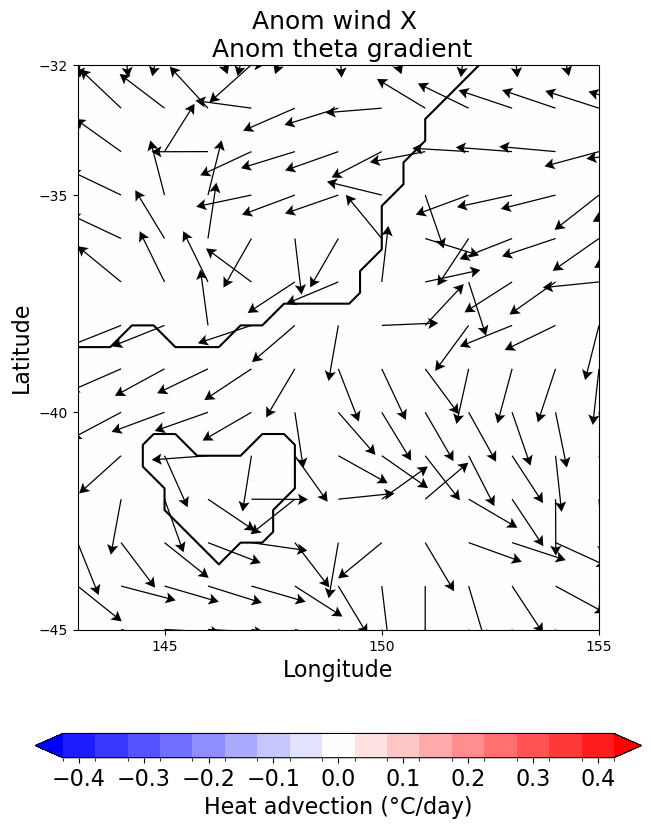

In [152]:
## Anom wind x anom theta gradient (AUS)

x = anom_v['lon'][::2]
y = anom_u['lat'][::2]
    
fig, ax = plt.subplots(111, figsize=(16,9))
ax = plt.subplot(111, projection=ccrs.PlateCarree()) # Specifies the projection for the plots
                       
ax.set_extent([143, 155, -45, -32], crs=ccrs.PlateCarree())       
ax.set_xticks((145, 150, 155), crs=ccrs.PlateCarree())
ax.set_yticks((-45, -40, -35, -32), crs=ccrs.PlateCarree())

contour = anom_wind_anom_theta.plot.contourf( 
    levels = np.arange(-0.425, 0.45, 0.05),
    cmap=plt.cm.get_cmap('bwr'),
    extend='both',
    add_colorbar=False
)
        
mask_mean = mask.mean(dim='time')

ax.contour(
    mask_mean.longitude, 
    mask_mean.latitude,
    mask_mean.values,
    levels=[0.5], 
    cmap='gray')

q = ax.quiver(
    x, y,
    (anom_u/abs_anom_u)[::2, ::2],
    (anom_v/abs_anom_u)[::2, ::2],
    scale=10,
    units='height', headwidth=9, headlength=8, headaxislength=6.5
)
        
cbar = plt.colorbar(contour, orientation="horizontal",ticks=np.arange(-0.4,0.5,0.1),
                    fraction=0.035,aspect=25, extend='both')
cbar.set_label(label=u'Heat advection (\u00B0C/day)', fontsize=16)  
cbar.ax.tick_params(labelsize=16)

plt.xlabel('Longitude',fontsize=16)
plt.ylabel('Latitude', fontsize=16)
plt.title('Anom wind X \n Anom theta gradient', fontsize=18) 

plt.savefig('/g/data/e14/cp3790/Charuni/ModelExperiment/Revisions/phase2_anom_wind_anom_pot_theta_aus.png')
#plt.show()

/jobfs/91384709.gadi-pbs/ipykernel_745825/1094813752.py:7: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax = plt.subplot(111, projection=ccrs.PlateCarree()) # Specifies the projection for the plots
/jobfs/91384709.gadi-pbs/ipykernel_745825/1094813752.py:15: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap=plt.cm.get_cmap('bwr'),
/g/data/hh5/public/apps/miniconda3/envs/analysis3-23.04/lib/python3.9/site-packages/dask/core.py:121: RuntimeWarning: divide by zero encountered in divide
  return func(*(_execute_task(a, cache) for a in args))
/g/data/hh5/public/apps/miniconda3/envs/analysis3-23.04/lib/python3.9/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in divide


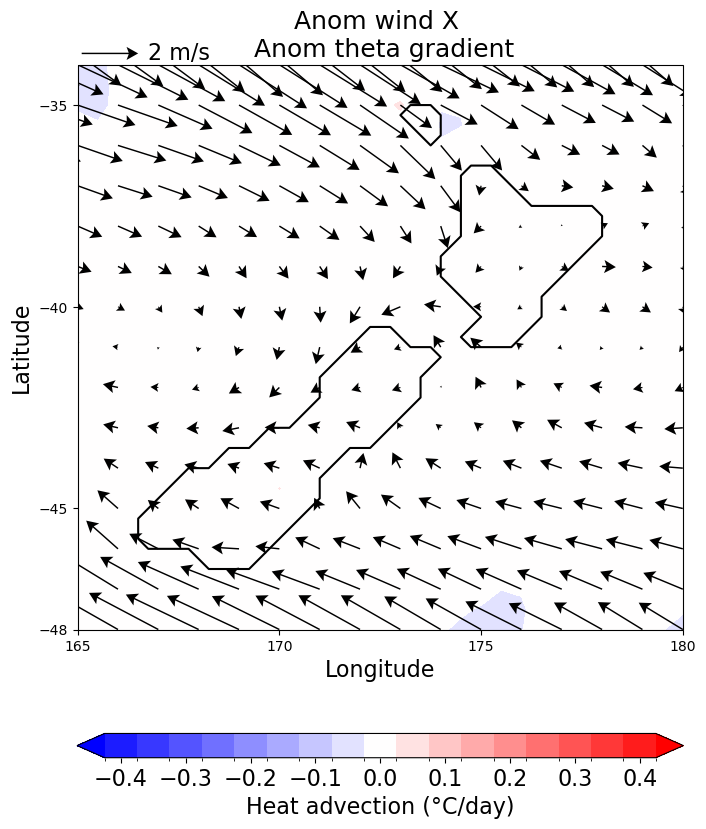

In [54]:
## Anom wind x anom theta gradient (NZ)

x = anom_v['lon'][::2]
y = anom_u['lat'][::2]
    
fig, ax = plt.subplots(111, figsize=(16,9))
ax = plt.subplot(111, projection=ccrs.PlateCarree()) # Specifies the projection for the plots
                       
ax.set_extent([165, 180, -48, -34], crs=ccrs.PlateCarree()) 
ax.set_xticks((165, 170, 175, 180), crs=ccrs.PlateCarree())
ax.set_yticks((-48, -45, -40, -35), crs=ccrs.PlateCarree())

contour = anom_wind_anom_theta.plot.contourf( 
    levels = np.arange(-0.425, 0.45, 0.05),
    cmap=plt.cm.get_cmap('bwr'),
    extend='both',
    add_colorbar=False
)
        
mask_mean = mask.mean(dim='time')

ax.contour(
    mask_mean.longitude, 
    mask_mean.latitude,
    mask_mean.values,
    levels=[0.5], 
    cmap='gray')

q = ax.quiver(
    x, y,
    anom_u[::2, ::2],
    anom_v[::2, ::2],
    scale=10,
    units='height', headwidth=9, headlength=8, headaxislength=6.5
)
        
cbar = plt.colorbar(contour, orientation="horizontal",ticks=np.arange(-0.4,0.5,0.1),
                    fraction=0.035,aspect=25, extend='both')
cbar.set_label(label=u'Heat advection (\u00B0C/day)', fontsize=16)  
cbar.ax.tick_params(labelsize=16)

plt.quiverkey(q, 0.1, 1.02, 1, '2 m/s', labelpos='E', fontproperties={'size':16})

plt.xlabel('Longitude',fontsize=16)
plt.ylabel('Latitude', fontsize=16)
plt.title('Anom wind X \n Anom theta gradient', fontsize=18) 

plt.savefig('/g/data/e14/cp3790/Charuni/ModelExperiment/Revisions/anom_wind_anom_pot_theta_nz_winds.png')
#plt.show()

/jobfs/91164646.gadi-pbs/ipykernel_785322/526442647.py:7: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax = plt.subplot(111, projection=ccrs.PlateCarree()) # Specifies the projection for the plots
/jobfs/91164646.gadi-pbs/ipykernel_785322/526442647.py:15: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap=plt.cm.get_cmap('bwr'),
/g/data/hh5/public/apps/miniconda3/envs/analysis3-23.04/lib/python3.9/site-packages/dask/core.py:121: RuntimeWarning: divide by zero encountered in divide
  return func(*(_execute_task(a, cache) for a in args))
/g/data/hh5/public/apps/miniconda3/envs/analysis3-23.04/lib/python3.9/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in divide
  

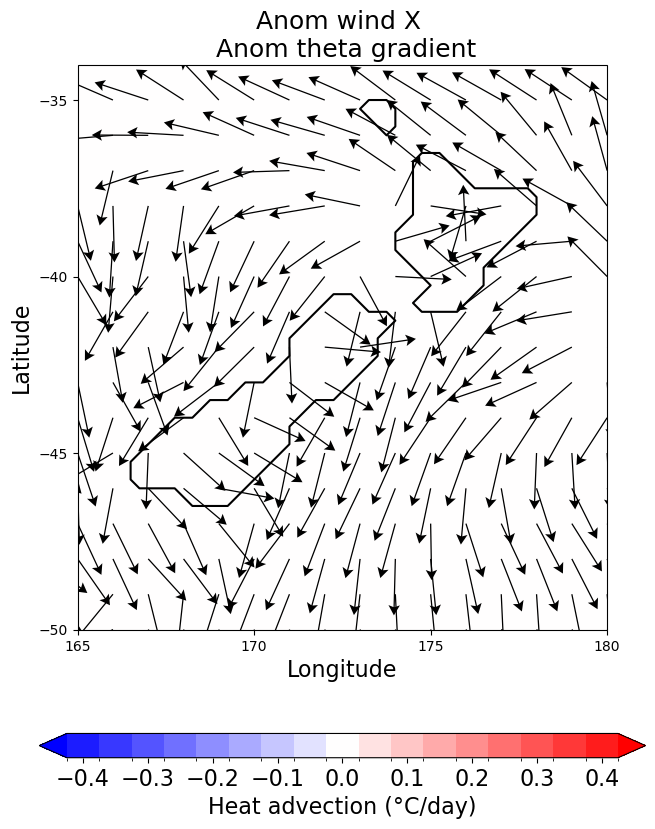

In [153]:
## Anom wind x anom theta gradient (NZ)

x = anom_v['lon'][::2]
y = anom_u['lat'][::2]
    
fig, ax = plt.subplots(111, figsize=(16,9))
ax = plt.subplot(111, projection=ccrs.PlateCarree()) # Specifies the projection for the plots
                       
ax.set_extent([165, 180, -50, -34], crs=ccrs.PlateCarree()) 
ax.set_xticks((165, 170, 175, 180), crs=ccrs.PlateCarree())
ax.set_yticks((-50, -45, -40, -35), crs=ccrs.PlateCarree())

contour = anom_wind_anom_theta.plot.contourf( 
    levels = np.arange(-0.425, 0.45, 0.05),
    cmap=plt.cm.get_cmap('bwr'),
    extend='both',
    add_colorbar=False
)
        
mask_mean = mask.mean(dim='time')

ax.contour(
    mask_mean.longitude, 
    mask_mean.latitude,
    mask_mean.values,
    levels=[0.5], 
    cmap='gray')

q = ax.quiver(
    x, y,
    (anom_u/abs_anom_u)[::2, ::2],
    (anom_v/abs_anom_u)[::2, ::2],
    scale=10,
    units='height', headwidth=9, headlength=8, headaxislength=6.5
)
        
cbar = plt.colorbar(contour, orientation="horizontal",ticks=np.arange(-0.4,0.5,0.1),
                    fraction=0.035,aspect=25, extend='both')
cbar.set_label(label=u'Heat advection (\u00B0C/day)', fontsize=16)  
cbar.ax.tick_params(labelsize=16)

plt.xlabel('Longitude',fontsize=16)
plt.ylabel('Latitude', fontsize=16)
plt.title('Anom wind X \n Anom theta gradient', fontsize=18) 

plt.savefig('/g/data/e14/cp3790/Charuni/ModelExperiment/Revisions/phase2_anom_wind_anom_pot_theta_nz.png')
#plt.show()

/jobfs/91384709.gadi-pbs/ipykernel_745825/2252462812.py:7: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax = plt.subplot(111, projection=ccrs.PlateCarree()) # Specifies the projection for the plots
/jobfs/91384709.gadi-pbs/ipykernel_745825/2252462812.py:15: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap=plt.cm.get_cmap('bwr'),
/g/data/hh5/public/apps/miniconda3/envs/analysis3-23.04/lib/python3.9/site-packages/dask/core.py:121: RuntimeWarning: divide by zero encountered in divide
  return func(*(_execute_task(a, cache) for a in args))
/g/data/hh5/public/apps/miniconda3/envs/analysis3-23.04/lib/python3.9/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in divide


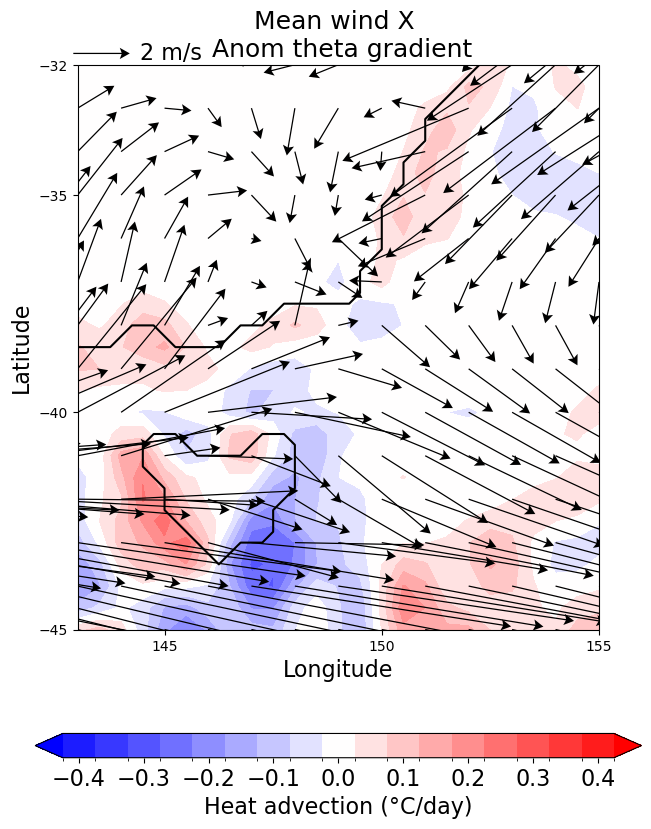

In [56]:
## Mean wind x anom theta gradient (AUS)

x = mean_v['lon'][::2]
y = mean_u['lat'][::2]
    
fig, ax = plt.subplots(111, figsize=(16,9))
ax = plt.subplot(111, projection=ccrs.PlateCarree()) # Specifies the projection for the plots
                       
ax.set_extent([143, 155, -45, -32], crs=ccrs.PlateCarree())       
ax.set_xticks((145, 150, 155), crs=ccrs.PlateCarree())
ax.set_yticks((-45, -40, -35, -32), crs=ccrs.PlateCarree())

contour = mean_wind_anom_theta.plot.contourf( 
    levels = np.arange(-0.425, 0.45, 0.05),
    cmap=plt.cm.get_cmap('bwr'),
    extend='both',
    add_colorbar=False
)
        
mask_mean = mask.mean(dim='time')

ax.contour(
    mask_mean.longitude, 
    mask_mean.latitude,
    mask_mean.values,
    levels=[0.5], 
    cmap='gray')

q = ax.quiver(
    x, y,
    mean_u[::2, ::2],
    mean_v[::2, ::2],
    scale=10,
    units='height', headwidth=9, headlength=8, headaxislength=6.5
)
        
cbar = plt.colorbar(contour, orientation="horizontal",ticks=np.arange(-0.4,0.5,0.1),
                    fraction=0.035,aspect=25, extend='both')
cbar.set_label(label=u'Heat advection (\u00B0C/day)', fontsize=16)  
cbar.ax.tick_params(labelsize=16)

plt.quiverkey(q, 0.1, 1.02, 1, '2 m/s', labelpos='E', fontproperties={'size':16})

plt.xlabel('Longitude',fontsize=16)
plt.ylabel('Latitude', fontsize=16)
plt.title('Mean wind X \n Anom theta gradient', fontsize=18) 

plt.savefig('/g/data/e14/cp3790/Charuni/ModelExperiment/Revisions/mean_wind_anom_pot_theta_aus_winds.png')
#plt.show()

/jobfs/91164646.gadi-pbs/ipykernel_785322/1597628361.py:7: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax = plt.subplot(111, projection=ccrs.PlateCarree()) # Specifies the projection for the plots
/jobfs/91164646.gadi-pbs/ipykernel_785322/1597628361.py:15: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap=plt.cm.get_cmap('bwr'),
/g/data/hh5/public/apps/miniconda3/envs/analysis3-23.04/lib/python3.9/site-packages/dask/core.py:121: RuntimeWarning: divide by zero encountered in divide
  return func(*(_execute_task(a, cache) for a in args))
/g/data/hh5/public/apps/miniconda3/envs/analysis3-23.04/lib/python3.9/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in divide


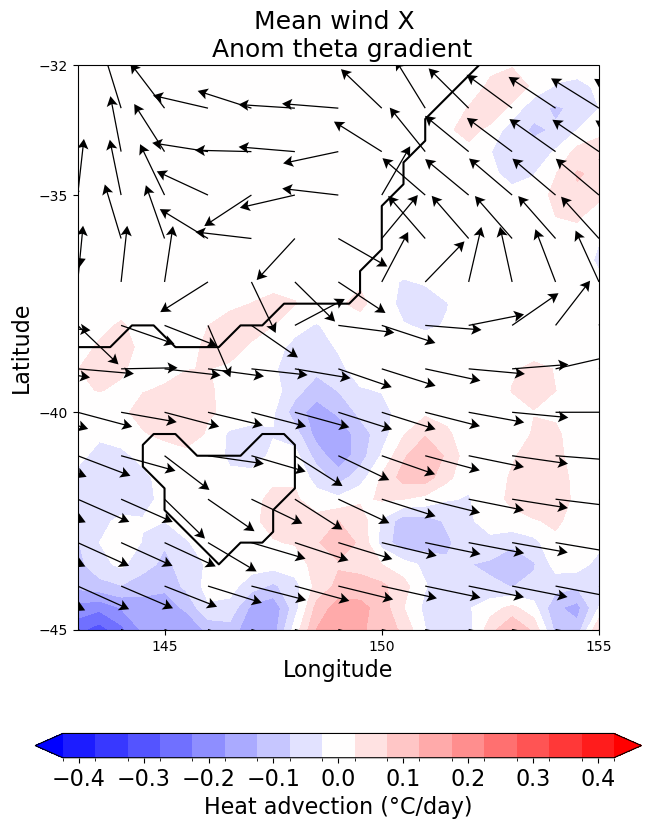

In [154]:
## Mean wind x anom theta gradient (AUS)

x = mean_v['lon'][::2]
y = mean_u['lat'][::2]
    
fig, ax = plt.subplots(111, figsize=(16,9))
ax = plt.subplot(111, projection=ccrs.PlateCarree()) # Specifies the projection for the plots
                       
ax.set_extent([143, 155, -45, -32], crs=ccrs.PlateCarree())       
ax.set_xticks((145, 150, 155), crs=ccrs.PlateCarree())
ax.set_yticks((-45, -40, -35, -32), crs=ccrs.PlateCarree())

contour = mean_wind_anom_theta.plot.contourf( 
    levels = np.arange(-0.425, 0.45, 0.05),
    cmap=plt.cm.get_cmap('bwr'),
    extend='both',
    add_colorbar=False
)
        
mask_mean = mask.mean(dim='time')

ax.contour(
    mask_mean.longitude, 
    mask_mean.latitude,
    mask_mean.values,
    levels=[0.5], 
    cmap='gray')

q = ax.quiver(
    x, y,
    (mean_u/abs_mean_u)[::2, ::2],
    (mean_v/abs_mean_u)[::2, ::2],
    scale=10,
    units='height', headwidth=9, headlength=8, headaxislength=6.5
)
        
cbar = plt.colorbar(contour, orientation="horizontal",ticks=np.arange(-0.4,0.5,0.1),
                    fraction=0.035,aspect=25, extend='both')
cbar.set_label(label=u'Heat advection (\u00B0C/day)', fontsize=16)  
cbar.ax.tick_params(labelsize=16)

plt.xlabel('Longitude',fontsize=16)
plt.ylabel('Latitude', fontsize=16)
plt.title('Mean wind X \n Anom theta gradient', fontsize=18) 

plt.savefig('/g/data/e14/cp3790/Charuni/ModelExperiment/Revisions/phase2_mean_wind_anom_pot_theta_aus.png')
#plt.show()

/jobfs/91384709.gadi-pbs/ipykernel_745825/3651877313.py:7: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax = plt.subplot(111, projection=ccrs.PlateCarree()) # Specifies the projection for the plots
/jobfs/91384709.gadi-pbs/ipykernel_745825/3651877313.py:15: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap=plt.cm.get_cmap('bwr'),
/g/data/hh5/public/apps/miniconda3/envs/analysis3-23.04/lib/python3.9/site-packages/dask/core.py:121: RuntimeWarning: divide by zero encountered in divide
  return func(*(_execute_task(a, cache) for a in args))
/g/data/hh5/public/apps/miniconda3/envs/analysis3-23.04/lib/python3.9/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in divide


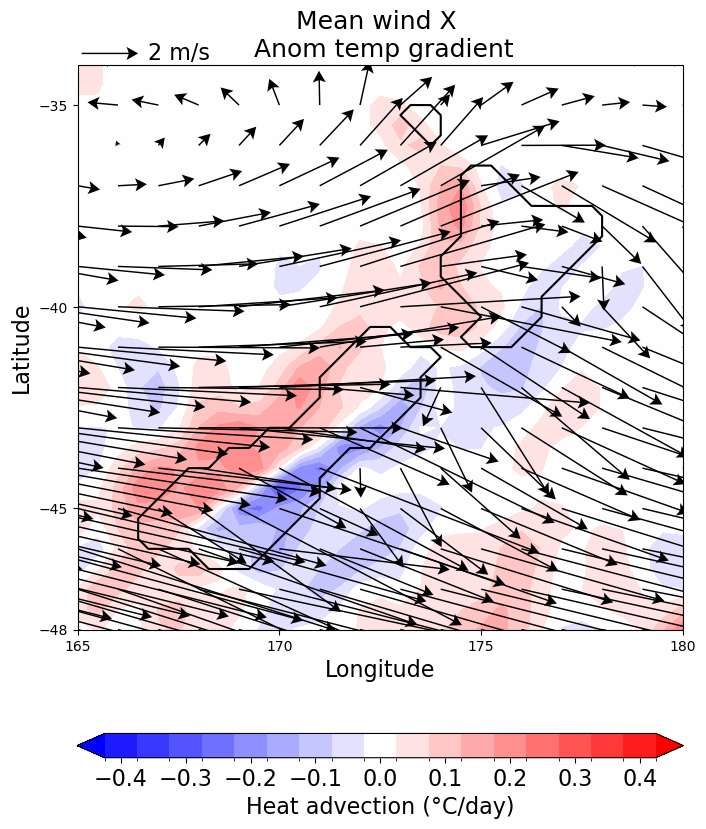

In [58]:
## Mean wind x anom theta gradient (NZ)

x = mean_v['lon'][::2]
y = mean_u['lat'][::2]
    
fig, ax = plt.subplots(111, figsize=(16,9))
ax = plt.subplot(111, projection=ccrs.PlateCarree()) # Specifies the projection for the plots
                       
ax.set_extent([165, 180, -48, -34], crs=ccrs.PlateCarree()) 
ax.set_xticks((165, 170, 175, 180), crs=ccrs.PlateCarree())
ax.set_yticks((-48, -45, -40, -35), crs=ccrs.PlateCarree())

contour = mean_wind_anom_theta.plot.contourf( 
    levels = np.arange(-0.425, 0.45, 0.05),
    cmap=plt.cm.get_cmap('bwr'),
    extend='both',
    add_colorbar=False
)
        
mask_mean = mask.mean(dim='time')

ax.contour(
    mask_mean.longitude, 
    mask_mean.latitude,
    mask_mean.values,
    levels=[0.5], 
    cmap='gray')

q = ax.quiver(
    x, y,
    mean_u[::2, ::2],
    mean_v[::2, ::2],
    scale=10,
    units='height', headwidth=9, headlength=8, headaxislength=6.5
)
        
cbar = plt.colorbar(contour, orientation="horizontal",ticks=np.arange(-0.4,0.5,0.1),
                    fraction=0.035,aspect=25, extend='both')
cbar.set_label(label=u'Heat advection (\u00B0C/day)', fontsize=16)  
cbar.ax.tick_params(labelsize=16)

plt.quiverkey(q, 0.1, 1.02, 1, '2 m/s', labelpos='E', fontproperties={'size':16})

plt.xlabel('Longitude',fontsize=16)
plt.ylabel('Latitude', fontsize=16)
plt.title('Mean wind X \n Anom temp gradient', fontsize=18) 

plt.savefig('/g/data/e14/cp3790/Charuni/ModelExperiment/Revisions/mean_wind_anom_pot_theta_nz_winds.png')
#plt.show()

/jobfs/91164646.gadi-pbs/ipykernel_785322/2246470555.py:7: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax = plt.subplot(111, projection=ccrs.PlateCarree()) # Specifies the projection for the plots
/jobfs/91164646.gadi-pbs/ipykernel_785322/2246470555.py:15: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap=plt.cm.get_cmap('bwr'),
/g/data/hh5/public/apps/miniconda3/envs/analysis3-23.04/lib/python3.9/site-packages/dask/core.py:121: RuntimeWarning: divide by zero encountered in divide
  return func(*(_execute_task(a, cache) for a in args))
/g/data/hh5/public/apps/miniconda3/envs/analysis3-23.04/lib/python3.9/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in divide


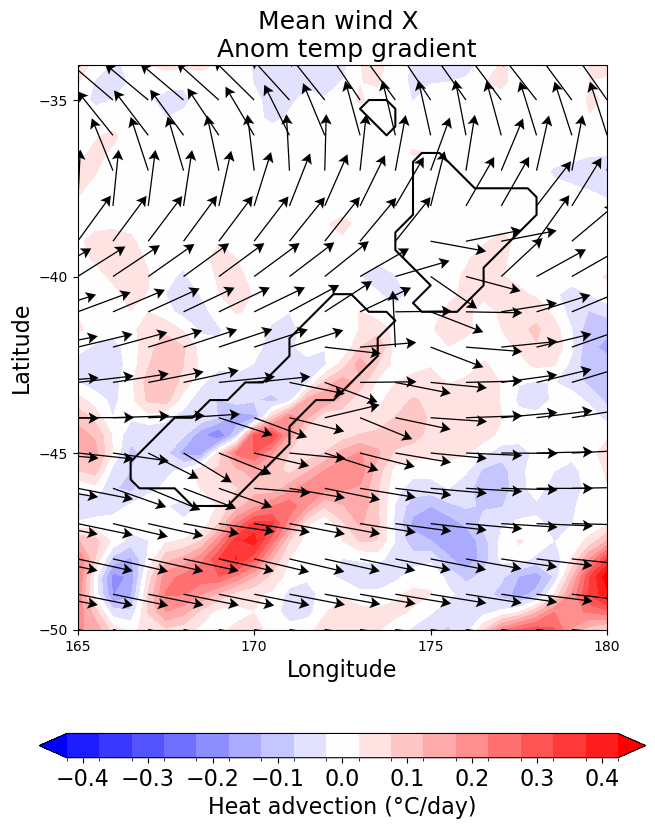

In [155]:
## Mean wind x anom theta gradient (NZ)

x = mean_v['lon'][::2]
y = mean_u['lat'][::2]
    
fig, ax = plt.subplots(111, figsize=(16,9))
ax = plt.subplot(111, projection=ccrs.PlateCarree()) # Specifies the projection for the plots
                       
ax.set_extent([165, 180, -50, -34], crs=ccrs.PlateCarree()) 
ax.set_xticks((165, 170, 175, 180), crs=ccrs.PlateCarree())
ax.set_yticks((-50, -45, -40, -35), crs=ccrs.PlateCarree())

contour = mean_wind_anom_theta.plot.contourf( 
    levels = np.arange(-0.425, 0.45, 0.05),
    cmap=plt.cm.get_cmap('bwr'),
    extend='both',
    add_colorbar=False
)
        
mask_mean = mask.mean(dim='time')

ax.contour(
    mask_mean.longitude, 
    mask_mean.latitude,
    mask_mean.values,
    levels=[0.5], 
    cmap='gray')

q = ax.quiver(
    x, y,
    (mean_u/abs_mean_u)[::2, ::2],
    (mean_v/abs_mean_u)[::2, ::2],
    scale=10,
    units='height', headwidth=9, headlength=8, headaxislength=6.5
)
        
cbar = plt.colorbar(contour, orientation="horizontal",ticks=np.arange(-0.4,0.5,0.1),
                    fraction=0.035,aspect=25, extend='both')
cbar.set_label(label=u'Heat advection (\u00B0C/day)', fontsize=16)  
cbar.ax.tick_params(labelsize=16)

plt.xlabel('Longitude',fontsize=16)
plt.ylabel('Latitude', fontsize=16)
plt.title('Mean wind X \n Anom temp gradient', fontsize=18) 

plt.savefig('/g/data/e14/cp3790/Charuni/ModelExperiment/Revisions/phase2_mean_wind_anom_pot_theta_nz.png')
#plt.show()

In [59]:
sum_u = mean_u + anom_u + anom_u
sum_v = mean_v + anom_v + anom_v

## ufuncs has beemn removed from xarray; so I had to use apply_ufunc

a = sum_u.load()
b = sum_v.load()
def magnitude(a, b):
    func = lambda x, y: np.sqrt(x**2 + y**2)
    return xr.apply_ufunc(func, a, b)

abs_sum_u = magnitude(a,b)

In [175]:
sum_theta_advective

<xarray.DataArray (lat: 51, lon: 110)>
dask.array<add, shape=(51, 110), dtype=float64, chunksize=(51, 110), chunktype=numpy.ndarray>
Coordinates:
    height   float64 10.0
  * lat      (lat) float64 -53.0 -52.5 -52.0 -51.5 ... -29.5 -29.0 -28.5 -28.0
  * lon      (lon) float64 135.0 135.5 136.0 136.5 ... 188.0 188.5 189.0 189.5

/jobfs/91384709.gadi-pbs/ipykernel_745825/1757586505.py:7: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax = plt.subplot(111, projection=ccrs.PlateCarree()) # Specifies the projection for the plots
/jobfs/91384709.gadi-pbs/ipykernel_745825/1757586505.py:15: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap=plt.cm.get_cmap('bwr'),
/g/data/hh5/public/apps/miniconda3/envs/analysis3-23.04/lib/python3.9/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in multiply
  return func(*(_execute_task(a, cache) for a in args))
/g/data/hh5/public/apps/miniconda3/envs/analysis3-23.04/lib/python3.9/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in divide

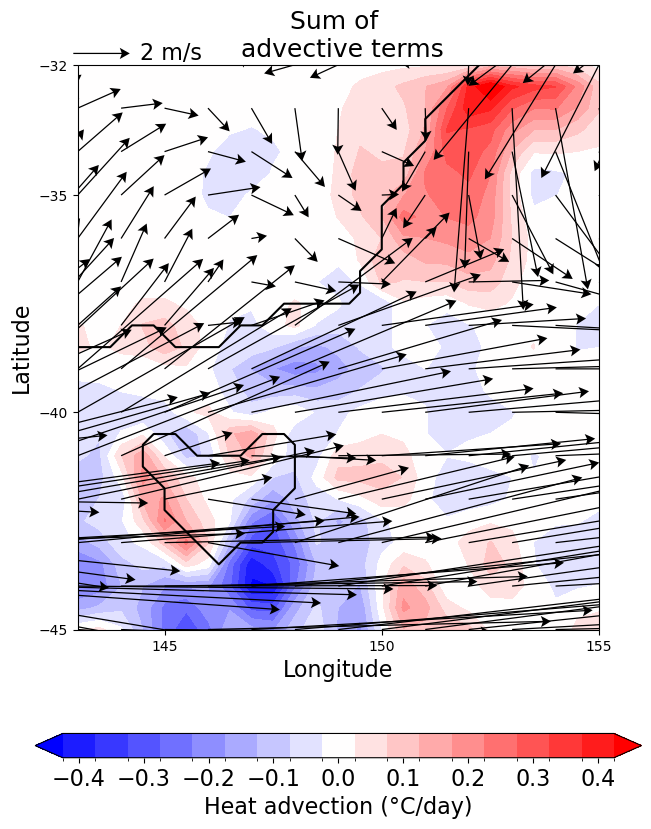

In [66]:
## Sum of theta advective terms (AUS)

x = sum_v['lon'][::2]
y = sum_u['lat'][::2]
    
fig, ax = plt.subplots(111, figsize=(16,9))
ax = plt.subplot(111, projection=ccrs.PlateCarree()) # Specifies the projection for the plots
                       
ax.set_extent([143, 155, -45, -32], crs=ccrs.PlateCarree())       
ax.set_xticks((145, 150, 155), crs=ccrs.PlateCarree())
ax.set_yticks((-45, -40, -35, -32), crs=ccrs.PlateCarree())

contour = sum_theta_advective.plot.contourf( 
    levels = np.arange(-0.425, 0.45, 0.05),
    cmap=plt.cm.get_cmap('bwr'),
    extend='both',
    add_colorbar=False
)
        
mask_mean = mask.mean(dim='time')

ax.contour(
    mask_mean.longitude, 
    mask_mean.latitude,
    mask_mean.values,
    levels=[0.5], 
    cmap='gray')

q = ax.quiver(
    x, y,
    sum_u[::2, ::2],
    sum_v[::2, ::2],
    scale=10,
    units='height', headwidth=9, headlength=8, headaxislength=6.5
)
        
cbar = plt.colorbar(contour, orientation="horizontal",ticks=np.arange(-0.4,0.5,0.1),
                    fraction=0.035,aspect=25, extend='both')
cbar.set_label(label=u'Heat advection (\u00B0C/day)', fontsize=16)  
cbar.ax.tick_params(labelsize=16)

plt.quiverkey(q, 0.1, 1.02, 1, '2 m/s', labelpos='E', fontproperties={'size':16})

plt.xlabel('Longitude',fontsize=16)
plt.ylabel('Latitude', fontsize=16)
plt.title('Sum of \n advective terms', fontsize=18) 

plt.savefig('/g/data/e14/cp3790/Charuni/ModelExperiment/Revisions/sum_pot_theta_aus_winds.png')
#plt.show()

/jobfs/91164646.gadi-pbs/ipykernel_785322/2951658934.py:7: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax = plt.subplot(111, projection=ccrs.PlateCarree()) # Specifies the projection for the plots
/jobfs/91164646.gadi-pbs/ipykernel_785322/2951658934.py:15: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap=plt.cm.get_cmap('bwr'),
/g/data/hh5/public/apps/miniconda3/envs/analysis3-23.04/lib/python3.9/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in multiply
  return func(*(_execute_task(a, cache) for a in args))
/g/data/hh5/public/apps/miniconda3/envs/analysis3-23.04/lib/python3.9/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in divide

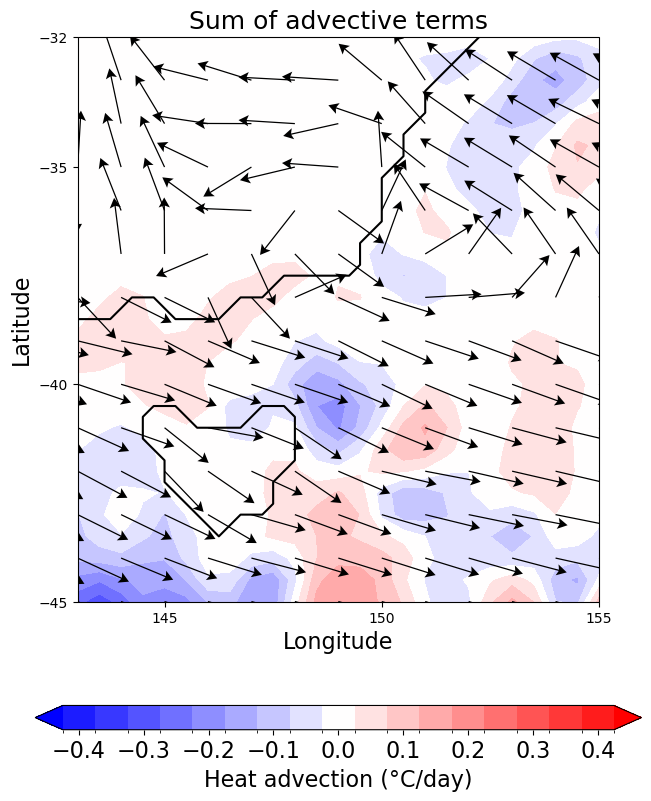

In [157]:
## Sum of theta advective terms (AUS)

x = sum_v['lon'][::2]
y = sum_u['lat'][::2]
    
fig, ax = plt.subplots(111, figsize=(16,9))
ax = plt.subplot(111, projection=ccrs.PlateCarree()) # Specifies the projection for the plots
                       
ax.set_extent([143, 155, -45, -32], crs=ccrs.PlateCarree())       
ax.set_xticks((145, 150, 155), crs=ccrs.PlateCarree())
ax.set_yticks((-45, -40, -35, -32), crs=ccrs.PlateCarree())

contour = sum_theta_advective.plot.contourf( 
    levels = np.arange(-0.425, 0.45, 0.05),
    cmap=plt.cm.get_cmap('bwr'),
    extend='both',
    add_colorbar=False
)
        
mask_mean = mask.mean(dim='time')

ax.contour(
    mask_mean.longitude, 
    mask_mean.latitude,
    mask_mean.values,
    levels=[0.5], 
    cmap='gray')

q = ax.quiver(
    x, y,
    (sum_u/abs_sum_u)[::2, ::2],
    (sum_v/abs_sum_u)[::2, ::2],
    scale=10,
    units='height', headwidth=9, headlength=8, headaxislength=6.5
)
        
cbar = plt.colorbar(contour, orientation="horizontal",ticks=np.arange(-0.4,0.5,0.1),
                    fraction=0.035,aspect=25, extend='both')
cbar.set_label(label=u'Heat advection (\u00B0C/day)', fontsize=16)  
cbar.ax.tick_params(labelsize=16)

plt.xlabel('Longitude',fontsize=16)
plt.ylabel('Latitude', fontsize=16)
plt.title('Sum of advective terms', fontsize=18) 

plt.savefig('/g/data/e14/cp3790/Charuni/ModelExperiment/Revisions/phase2_sum_pot_theta_aus.png')
#plt.show()

/jobfs/91384709.gadi-pbs/ipykernel_745825/3003334110.py:7: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax = plt.subplot(111, projection=ccrs.PlateCarree()) # Specifies the projection for the plots
/jobfs/91384709.gadi-pbs/ipykernel_745825/3003334110.py:15: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap=plt.cm.get_cmap('bwr'),
/g/data/hh5/public/apps/miniconda3/envs/analysis3-23.04/lib/python3.9/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in multiply
  return func(*(_execute_task(a, cache) for a in args))
/g/data/hh5/public/apps/miniconda3/envs/analysis3-23.04/lib/python3.9/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in divide

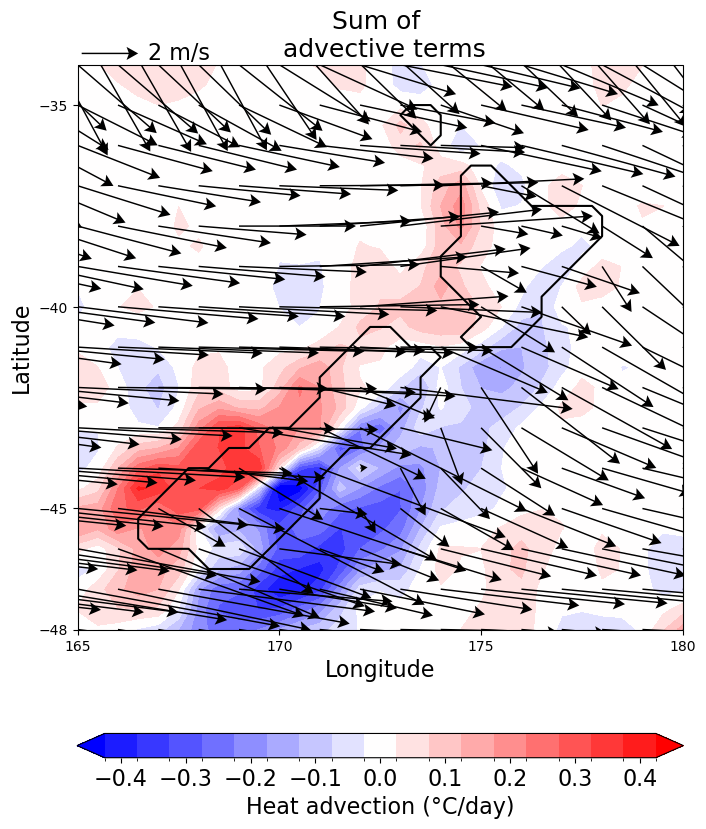

In [68]:
## Sum of theta advective terms (NZ)

x = sum_v['lon'][::2]
y = sum_u['lat'][::2]
    
fig, ax = plt.subplots(111, figsize=(16,9))
ax = plt.subplot(111, projection=ccrs.PlateCarree()) # Specifies the projection for the plots
                       
ax.set_extent([165, 180, -48, -34], crs=ccrs.PlateCarree()) 
ax.set_xticks((165, 170, 175, 180), crs=ccrs.PlateCarree())
ax.set_yticks((-48, -45, -40, -35), crs=ccrs.PlateCarree())

contour = sum_theta_advective.plot.contourf( 
    levels = np.arange(-0.425, 0.45, 0.05),
    cmap=plt.cm.get_cmap('bwr'),
    extend='both',
    add_colorbar=False
)
        
mask_mean = mask.mean(dim='time')

ax.contour(
    mask_mean.longitude, 
    mask_mean.latitude,
    mask_mean.values,
    levels=[0.5], 
    cmap='gray')

q = ax.quiver(
    x, y,
    sum_u[::2, ::2],
    sum_v[::2, ::2],
    scale=10,
    units='height', headwidth=9, headlength=8, headaxislength=6.5
)
        
cbar = plt.colorbar(contour, orientation="horizontal",ticks=np.arange(-0.4,0.5,0.1),
                    fraction=0.035,aspect=25, extend='both')
cbar.set_label(label=u'Heat advection (\u00B0C/day)', fontsize=16)  
cbar.ax.tick_params(labelsize=16)

plt.quiverkey(q, 0.1, 1.02, 1, '2 m/s', labelpos='E', fontproperties={'size':16})

plt.xlabel('Longitude',fontsize=16)
plt.ylabel('Latitude', fontsize=16)
plt.title('Sum of \n advective terms', fontsize=18) 

plt.savefig('/g/data/e14/cp3790/Charuni/ModelExperiment/Revisions/sum_pot_theta_advective_nz_winds.png')
#plt.show()

/jobfs/91164646.gadi-pbs/ipykernel_785322/2983212779.py:7: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax = plt.subplot(111, projection=ccrs.PlateCarree()) # Specifies the projection for the plots
/jobfs/91164646.gadi-pbs/ipykernel_785322/2983212779.py:15: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap=plt.cm.get_cmap('bwr'),
/g/data/hh5/public/apps/miniconda3/envs/analysis3-23.04/lib/python3.9/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in multiply
  return func(*(_execute_task(a, cache) for a in args))
/g/data/hh5/public/apps/miniconda3/envs/analysis3-23.04/lib/python3.9/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in divide

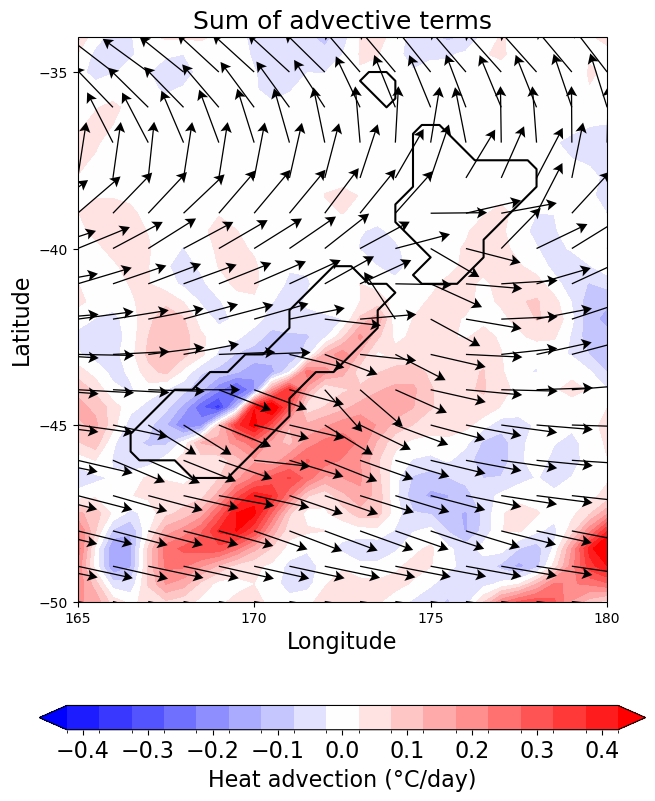

In [158]:
## Sum of theta advective terms (NZ)

x = sum_v['lon'][::2]
y = sum_u['lat'][::2]
    
fig, ax = plt.subplots(111, figsize=(16,9))
ax = plt.subplot(111, projection=ccrs.PlateCarree()) # Specifies the projection for the plots
                       
ax.set_extent([165, 180, -50, -34], crs=ccrs.PlateCarree()) 
ax.set_xticks((165, 170, 175, 180), crs=ccrs.PlateCarree())
ax.set_yticks((-50, -45, -40, -35), crs=ccrs.PlateCarree())

contour = sum_theta_advective.plot.contourf( 
    levels = np.arange(-0.425, 0.45, 0.05),
    cmap=plt.cm.get_cmap('bwr'),
    extend='both',
    add_colorbar=False
)
        
mask_mean = mask.mean(dim='time')

ax.contour(
    mask_mean.longitude, 
    mask_mean.latitude,
    mask_mean.values,
    levels=[0.5], 
    cmap='gray')

q = ax.quiver(
    x, y,
    (sum_u/abs_sum_u)[::2, ::2],
    (sum_v/abs_sum_u)[::2, ::2],
    scale=10,
    units='height', headwidth=9, headlength=8, headaxislength=6.5
)
        
cbar = plt.colorbar(contour, orientation="horizontal",ticks=np.arange(-0.4,0.5,0.1),
                    fraction=0.035,aspect=25, extend='both')
cbar.set_label(label=u'Heat advection (\u00B0C/day)', fontsize=16)  
cbar.ax.tick_params(labelsize=16)

plt.xlabel('Longitude',fontsize=16)
plt.ylabel('Latitude', fontsize=16)
plt.title('Sum of advective terms', fontsize=18) 

plt.savefig('/g/data/e14/cp3790/Charuni/ModelExperiment/Revisions/phase2_sum_pot_theta_advective_nz.png')
#plt.show()

In [19]:
temp_con_buildup_xr = con_temp.isel(phase=0) ## Only looking at temperature during the buildup period (Sep-Feb)
## shift longitude by 1 (recheck if direction is correct) # positive value, shifts to the right; negative value shifts to the left
temp_con_buildup_shift_xr = temp_con_buildup_xr.shift(lon=1)
temp_con_change = temp_con_buildup_shift_xr - temp_con_buildup_xr
temp_con_gradient = temp_con_buildup_xr/50000

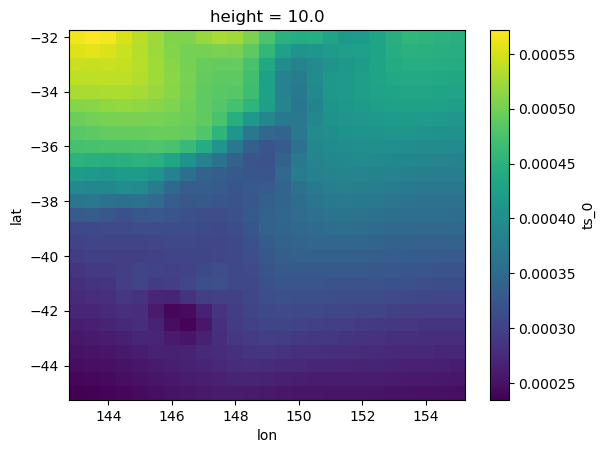

In [31]:
temp_con_gradient.sel(lat=slice(-45, -32), lon=slice(143, 155)).mean(dim='time').plot()

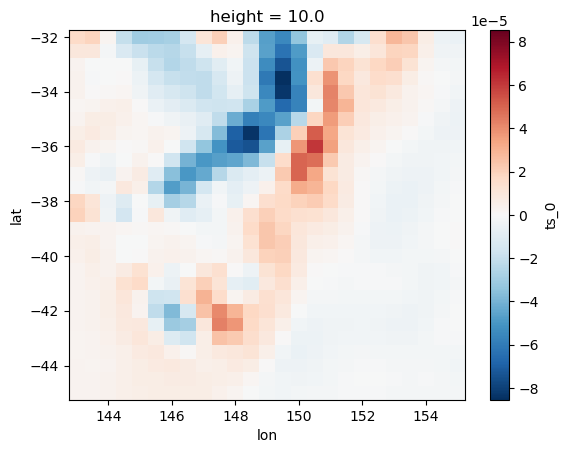

In [25]:
(temp_con_gradient/50000).sel(lat=slice(-45, -32), lon=slice(143, 155)).mean(dim='time').plot()

In [22]:
con_temp_diff_uas = temp_con_gradient*diff_uas.isel(phase=0)

## Con temp x Diff vas

In [23]:
con_temp_diff_vas = temp_con_gradient*diff_vas.isel(phase=0)

## Diff temp x Con uas

In [20]:
temp_diff_buildup_xr = diff_temp.isel(phase=0)#.mean(dim=('lat', 'lon')) ## to have a single pair of lat,lon dimensions
## shift longitude by 1 (recheck if direction is correct)
#temp_diff_buildup_shift_xr = temp_diff_buildup_xr.shift(lon=1)
#temp_diff_gradient = ((temp_diff_buildup_xr - temp_diff_buildup_shift_xr))/50000

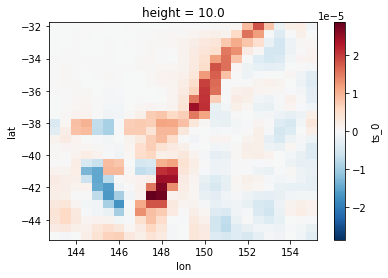

In [14]:
temp_diff_gradient.sel(lat=slice(-45, -32), lon=slice(143, 155)).mean(dim='time').plot()

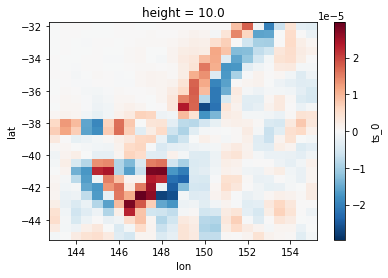

In [16]:
temp_diff_gradient.differentiate('lon').sel(lat=slice(-45, -32), lon=slice(143, 155)).mean(dim='time').plot()

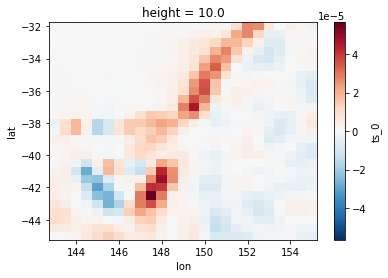

In [18]:
(diff_temp_x/50000).sel(lat=slice(-45, -32), lon=slice(143, 155)).mean(dim='time').plot()

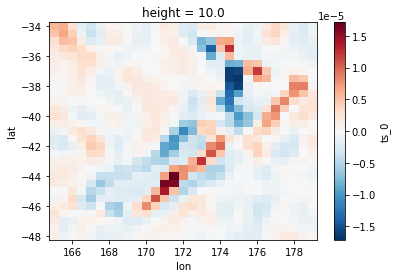

In [45]:
temp_diff_gradient.sel(lat=slice(-48, -34), lon=slice(165, 179)).mean(dim='time').plot()

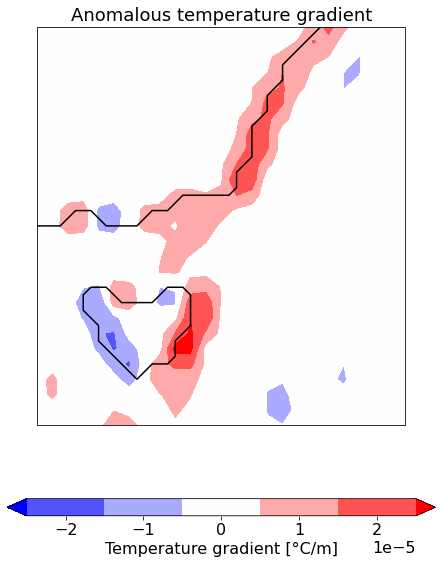

In [78]:
## Anom temp gradient (AUS)
    
fig, ax = plt.subplots(111, figsize=(16,9))
ax = plt.subplot(111, projection=ccrs.PlateCarree()) # Specifies the projection for the plots
                       
ax.set_extent([143, 155, -45, -32], crs=ccrs.PlateCarree())      


data_low = -2 * 10**-5
data_high = 2 * 10**-5
level_step = 1 * 10**-5
level_low = data_low - level_step/2
level_high = data_high + level_step

contour = temp_diff_gradient.mean(dim='time').plot.contourf(
    levels = np.arange(level_low, level_high, level_step),
    cmap=plt.cm.get_cmap('bwr'),
    extend='both',
    add_colorbar=False
)
        
mask_mean = mask.mean(dim='time')

ax.contour(
    mask_mean.longitude, 
    mask_mean.latitude,
    mask_mean.values,
    levels=[0.5], 
    cmap='gray')
        
label_step = 1 * 10**-5
label_low = data_low
label_high = data_high + label_step/2
cbar = plt.colorbar(
    contour,
    orientation="horizontal",
    ticks=np.arange(label_low, label_high, label_step),
    fraction=0.035,aspect=25, extend='both'
)
cbar.formatter.set_powerlimits((0, 0))
cbar.set_label(label=u'Temperature gradient [\u00B0C/m]', fontsize=16)  
cbar.ax.tick_params(labelsize=16)
cbar.ax.xaxis.offsetText.set_fontsize(16)

plt.title('Anomalous temperature gradient', fontsize=18)                       
plt.savefig('/g/data/e14/cp3790/Charuni/ModelExperiment/Plots/anom_temp_gradient_aus.png')

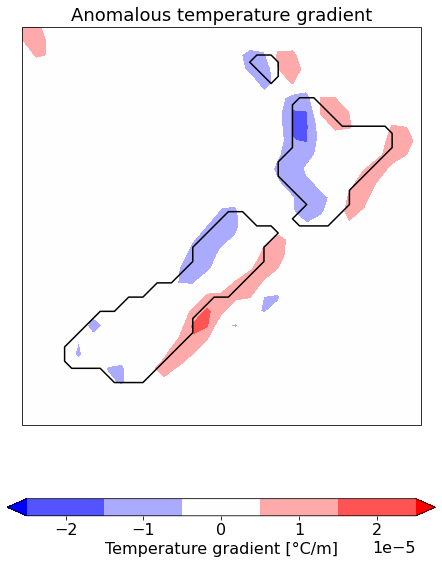

In [79]:
## Anom temp gradient (NZ)
    
fig, ax = plt.subplots(111, figsize=(16,9))
ax = plt.subplot(111, projection=ccrs.PlateCarree()) # Specifies the projection for the plots
                       
ax.set_extent([165, 179, -48, -34], crs=ccrs.PlateCarree())      


data_low = -2 * 10**-5
data_high = 2 * 10**-5
level_step = 1 * 10**-5
level_low = data_low - level_step/2
level_high = data_high + level_step

contour = temp_diff_gradient.mean(dim='time').plot.contourf(
    levels = np.arange(level_low, level_high, level_step),
    cmap=plt.cm.get_cmap('bwr'),
    extend='both',
    add_colorbar=False
)
        
mask_mean = mask.mean(dim='time')

ax.contour(
    mask_mean.longitude, 
    mask_mean.latitude,
    mask_mean.values,
    levels=[0.5], 
    cmap='gray')
        
label_step = 1 * 10**-5
label_low = data_low
label_high = data_high + label_step/2
cbar = plt.colorbar(
    contour,
    orientation="horizontal",
    ticks=np.arange(label_low, label_high, label_step),
    fraction=0.035,aspect=25, extend='both'
)
cbar.formatter.set_powerlimits((0, 0))
cbar.set_label(label=u'Temperature gradient [\u00B0C/m]', fontsize=16)  
cbar.ax.tick_params(labelsize=16)
cbar.ax.xaxis.offsetText.set_fontsize(16)

plt.title('Anomalous temperature gradient', fontsize=18)                       
plt.savefig('/g/data/e14/cp3790/Charuni/ModelExperiment/Plots/anom_temp_gradient_nz.png')

In [23]:
diff_temp_con_uas = temp_diff_gradient*con_uas.isel(phase=0)
#(diff_temp_con_uas.mean(dim='time')*86400).plot() ## converting seconds to days: 60s x 60m x 24h 

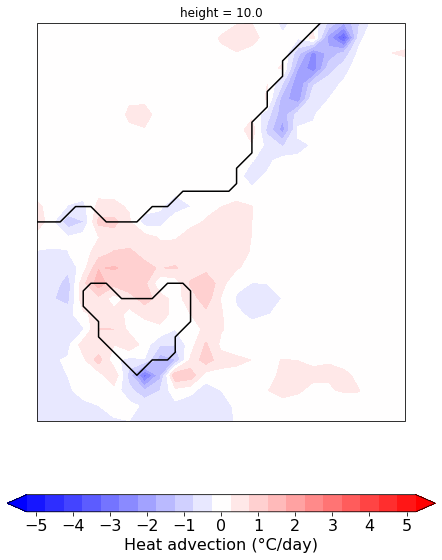

In [173]:
## Diff temp x Con uas (AUS)
    
fig, ax = plt.subplots(111, figsize=(16,9))
ax = plt.subplot(111, projection=ccrs.PlateCarree()) # Specifies the projection for the plots
                       
ax.set_extent([143, 155, -45, -32], crs=ccrs.PlateCarree())      

contour = (diff_temp_con_uas.mean(dim='time')*86400).plot.contourf( ## 60x60x24 to calculate heat adv for a day
    levels = np.arange(-5.25, 5.5, 0.5),
    cmap=plt.cm.get_cmap('bwr'),
    extend='both',
    add_colorbar=False
)
        
mask_mean = mask.mean(dim='time')

ax.contour(
    mask_mean.longitude, 
    mask_mean.latitude,
    mask_mean.values,
    levels=[0.5], 
    cmap='gray')
        
cbar = plt.colorbar(contour, orientation="horizontal",ticks=np.arange(-5,6,1),
                    fraction=0.035,aspect=25, extend='both')
cbar.set_label(label=u'Heat advection (\u00B0C/day)', fontsize=16)  
cbar.ax.tick_params(labelsize=16)
                       
plt.savefig('/g/data/e14/cp3790/Charuni/ModelExperiment/diff_temp_con_uas_aus_2.png')

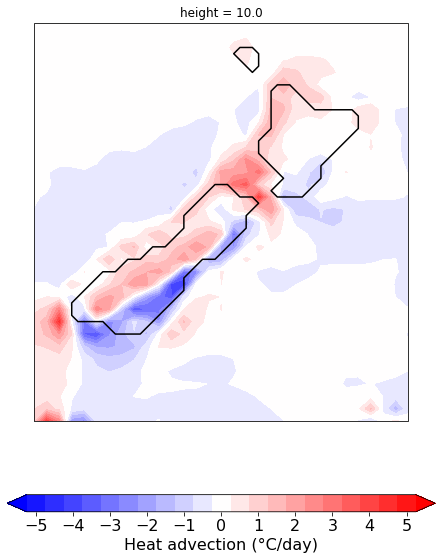

In [174]:
## Diff temp x Con uas (NZ)
    
fig, ax = plt.subplots(111, figsize=(16,9))
ax = plt.subplot(111, projection=ccrs.PlateCarree()) # Specifies the projection for the plots
                       
ax.set_extent([165, 180, -50, -34], crs=ccrs.PlateCarree())      

contour = (diff_temp_con_uas.mean(dim='time')*86400).plot.contourf(
    levels = np.arange(-5.25, 5.5, 0.5),
    cmap=plt.cm.get_cmap('bwr'),
    extend='both',
    add_colorbar=False
)
        
mask_mean = mask.mean(dim='time')

ax.contour(
    mask_mean.longitude, 
    mask_mean.latitude,
    mask_mean.values,
    levels=[0.5], 
    cmap='gray')
        
cbar = plt.colorbar(contour, orientation="horizontal",ticks=np.arange(-5,6,1),
                    fraction=0.035,aspect=25, extend='both')
cbar.set_label(label=u'Heat advection (\u00B0C/day)', fontsize=16)  
cbar.ax.tick_params(labelsize=16)
                       
plt.savefig('/g/data/e14/cp3790/Charuni/ModelExperiment/diff_temp_con_uas_nz_2.png')

## Diff temp x Con vas

In [24]:
diff_temp_con_vas = temp_diff_gradient*con_vas.isel(phase=0)
#(diff_temp_con_vas.mean(dim='time')*86400).plot()

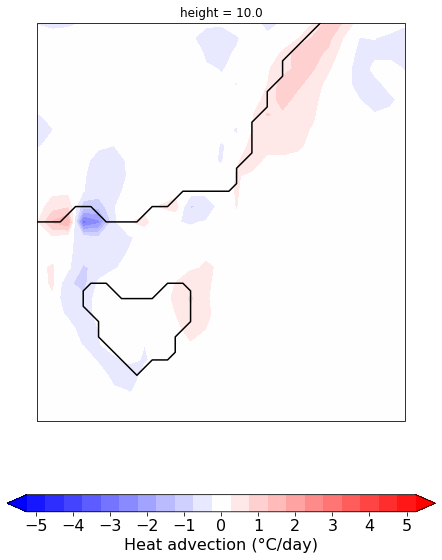

In [175]:
## Diff temp x Con vas (AUS)
    
fig, ax = plt.subplots(111, figsize=(16,9))
ax = plt.subplot(111, projection=ccrs.PlateCarree()) # Specifies the projection for the plots
                       
ax.set_extent([143, 155, -45, -32], crs=ccrs.PlateCarree())      

contour = (diff_temp_con_vas.mean(dim='time')*86400).plot.contourf( ## 60x60x24 to calculate heat adv for a day
    levels = np.arange(-5.25, 5.5, 0.5),
    cmap=plt.cm.get_cmap('bwr'),
    extend='both',
    add_colorbar=False
)
        
mask_mean = mask.mean(dim='time')

ax.contour(
    mask_mean.longitude, 
    mask_mean.latitude,
    mask_mean.values,
    levels=[0.5], 
    cmap='gray')
        
cbar = plt.colorbar(contour, orientation="horizontal",ticks=np.arange(-5,6,1),
                    fraction=0.035,aspect=25, extend='both')
cbar.set_label(label=u'Heat advection (\u00B0C/day)', fontsize=16)  
cbar.ax.tick_params(labelsize=16)
                       
plt.savefig('/g/data/e14/cp3790/Charuni/ModelExperiment/diff_temp_con_vas_aus_2.png')

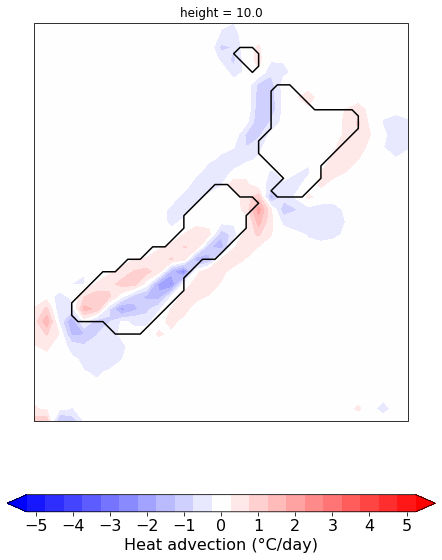

In [176]:
## Diff temp x Con vas (NZ)
    
fig, ax = plt.subplots(111, figsize=(16,9))
ax = plt.subplot(111, projection=ccrs.PlateCarree()) # Specifies the projection for the plots
                       
ax.set_extent([165, 180, -50, -34], crs=ccrs.PlateCarree())      

contour = (diff_temp_con_vas.mean(dim='time')*86400).plot.contourf(
    levels = np.arange(-5.25, 5.5, 0.5),
    cmap=plt.cm.get_cmap('bwr'),
    extend='both',
    add_colorbar=False
)
        
mask_mean = mask.mean(dim='time')

ax.contour(
    mask_mean.longitude, 
    mask_mean.latitude,
    mask_mean.values,
    levels=[0.5], 
    cmap='gray')
        
cbar = plt.colorbar(contour, orientation="horizontal",ticks=np.arange(-5,6,1),
                    fraction=0.035,aspect=25, extend='both')
cbar.set_label(label=u'Heat advection (\u00B0C/day)', fontsize=16)  
cbar.ax.tick_params(labelsize=16)
                       
plt.savefig('/g/data/e14/cp3790/Charuni/ModelExperiment/diff_temp_con_vas_nz_2.png')

## Martin

### Anom temp gradient x Mean winds

Temperature gradient is in C/m, winds are in m/s; their product gives C/s 

1. Differentiate temperature along longitude and latitude and divide by 50000m (1 grid =`50km)
2. Winds x temperature gradient (as winds are in m/s and we want to convert to per day, we multiply by 60x60x24 i.e 86400

u_wind x temp_x & v_wind x temp_y

3. Plot wind direction 


In [22]:
distance_between_lons = 50000 * 2 * 3.14 * (6371000/360)

In [23]:
distance_between_lons

5556927777.777778

In [24]:
temp_con_buildup_shift_xr = temp_con_buildup_xr.shift(lon=1)
temp_con_change = temp_con_buildup_shift_xr - temp_con_buildup_xr
temp_con_gradient = temp_con_buildup_xr/distance_between_lons

In [27]:
temp_diff_buildup_shift_xr = temp_diff_buildup_xr.shift(lon=1)
temp_diff_change = temp_diff_buildup_shift_xr - temp_diff_buildup_xr
temp_diff_gradient = temp_diff_buildup_xr/distance_between_lons

In [28]:
diff_temp_x = temp_diff_gradient.differentiate('lon')
diff_temp_y = temp_diff_gradient.differentiate('lat')

#diff_temp_x = (diff_temp.isel(phase=0).differentiate('lon'))/distance_between_lons
#diff_temp_y = (diff_temp.isel(phase=0).differentiate('lat'))/distance_between_lons

In [29]:
#u_diff_temp_x = con_uas.isel(phase=0) * diff_temp_x * 86400
#v_diff_temp_y = con_vas.isel(phase=0) * diff_temp_y * 86400

u_diff_temp_x = con_uas.isel(phase=0) * diff_temp_x * 86400
v_diff_temp_y = con_vas.isel(phase=0) * diff_temp_y * 86400

In [ ]:
((u_diff_temp_x + v_diff_temp_y)*(-1)).mean(dim='time').plot()

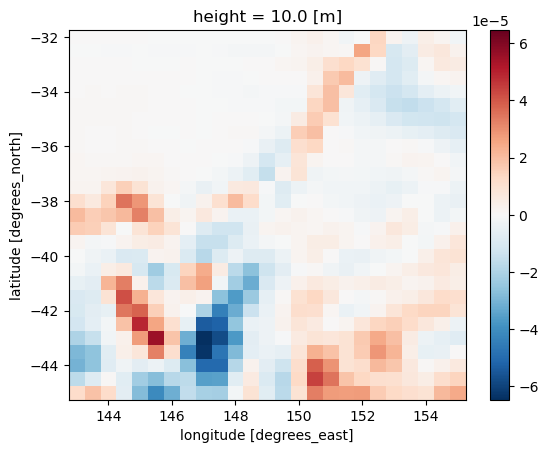

In [30]:
((u_diff_temp_x + v_diff_temp_y)*(-1)).sel(lat=slice(-45, -32), lon=slice(143, 155)).mean(dim='time').plot()

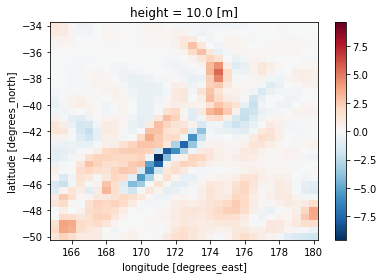

In [37]:
((u_diff_temp_x + v_diff_temp_y)*(-1)).sel(lat=slice(-50, -34), lon=slice(165, 180)).mean(dim='time').plot()

In [45]:
con_uas_mean = con_uas.isel(phase=0).mean(dim='time')#[::2, ::2]
con_vas_mean = con_vas.isel(phase=0).mean(dim='time')#[::2, ::2]

In [47]:
## ufuncs has been removed from xarray; so I had to use apply_ufunc

a = con_uas_mean.load()
b = con_vas_mean.load()
def magnitude(a, b):
    func = lambda x, y: np.sqrt(x**2 + y**2)
    return xr.apply_ufunc(func, a, b)

abs_con_u = magnitude(a,b)

In [52]:
abs(mean_v)

<xarray.DataArray 'vas' (lat: 51, lon: 110)>
dask.array<abs, shape=(51, 110), dtype=float32, chunksize=(51, 110), chunktype=numpy.ndarray>
Coordinates:
  * lon      (lon) float32 135.0 135.5 136.0 136.5 ... 188.0 188.5 189.0 189.5
  * lat      (lat) float32 -53.0 -52.5 -52.0 -51.5 ... -29.5 -29.0 -28.5 -28.0
    height   float64 10.0

In [35]:
print(-5.25*1e-5)

-5.25e-05


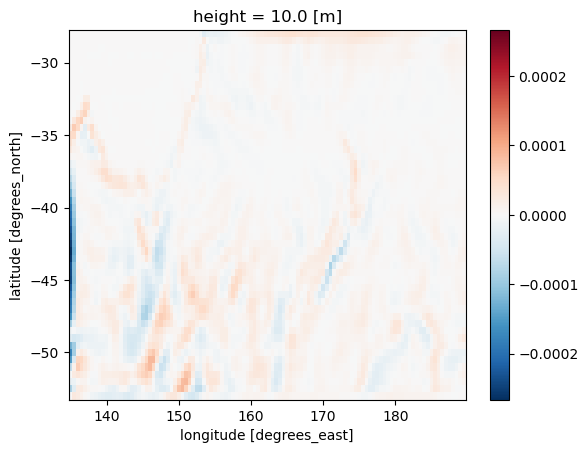

In [34]:
((u_diff_temp_x + v_diff_temp_y)*(-1)).mean(dim='time').plot()

/jobfs/89249030.gadi-pbs/ipykernel_883447/3123935970.py:7: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax = plt.subplot(111, projection=ccrs.PlateCarree()) # Specifies the projection for the plots
/jobfs/89249030.gadi-pbs/ipykernel_883447/3123935970.py:15: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap=plt.cm.get_cmap('bwr'),


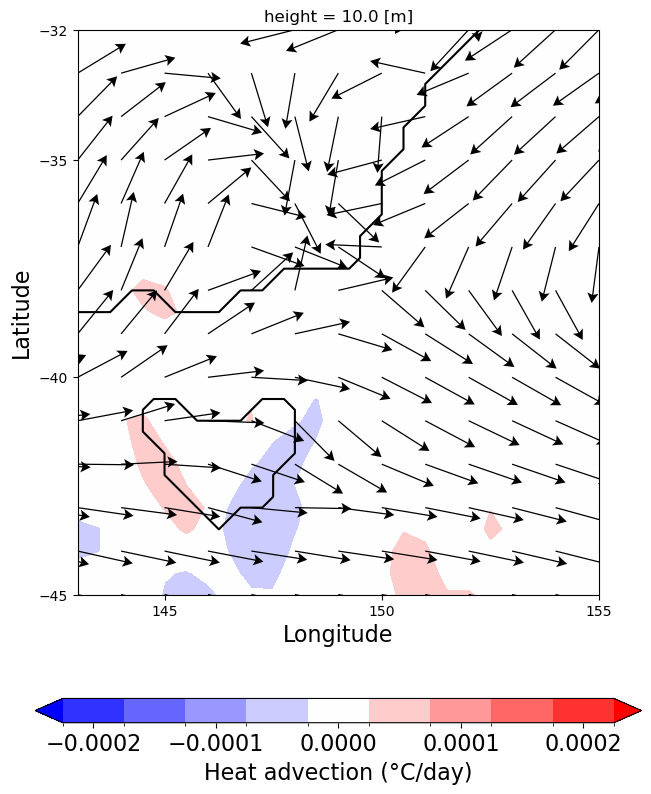

In [37]:
## Mean wnd x anomalous temp gradient (AUS)

x = con_vas_mean['lon']
y = con_uas_mean['lat']
    
fig, ax = plt.subplots(111, figsize=(16,9))
ax = plt.subplot(111, projection=ccrs.PlateCarree()) # Specifies the projection for the plots
                       
ax.set_extent([143, 155, -45, -32], crs=ccrs.PlateCarree())       
ax.set_xticks((145, 150, 155), crs=ccrs.PlateCarree())
ax.set_yticks((-45, -40, -35, -32), crs=ccrs.PlateCarree())

contour = ((u_diff_temp_x + v_diff_temp_y)*(-1)).mean(dim='time').plot.contourf( ## 60x60x24 to calculate heat adv for a day
    levels = np.arange(-2.25*1e-4, 2.5*1e-4, 5*1e-5),
    cmap=plt.cm.get_cmap('bwr'),
    extend='both',
    add_colorbar=False
)
        
mask_mean = mask.mean(dim='time')

ax.contour(
    mask_mean.longitude, 
    mask_mean.latitude,
    mask_mean.values,
    levels=[0.5], 
    cmap='gray')

q = ax.quiver(
    x, y,
    (con_uas_mean/abs_con_u),#.isel(phase=0).mean(dim='time')[::2, ::2],
    (con_vas_mean/abs_con_u),#.isel(phase=0).mean(dim='time')[::2, ::2],
    scale=10,
    units='height', headwidth=9, headlength=8, headaxislength=6.5
)
        
cbar = plt.colorbar(contour, orientation="horizontal",ticks=np.arange(-2*1e-4,3*1e-4,1*1e-4),
                    fraction=0.035,aspect=25, extend='both')
cbar.set_label(label=u'Heat advection (\u00B0C/day)', fontsize=16)  
cbar.ax.tick_params(labelsize=16)

plt.xlabel('Longitude',fontsize=16)
plt.ylabel('Latitude', fontsize=16)

#plt.savefig('/g/data/e14/cp3790/Charuni/ModelExperiment/Revisions/Figure3c-aus.png')
plt.show()

/jobfs/89249030.gadi-pbs/ipykernel_883447/2163917040.py:7: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax = plt.subplot(111, projection=ccrs.PlateCarree()) # Specifies the projection for the plots
/jobfs/89249030.gadi-pbs/ipykernel_883447/2163917040.py:15: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap=plt.cm.get_cmap('bwr'),


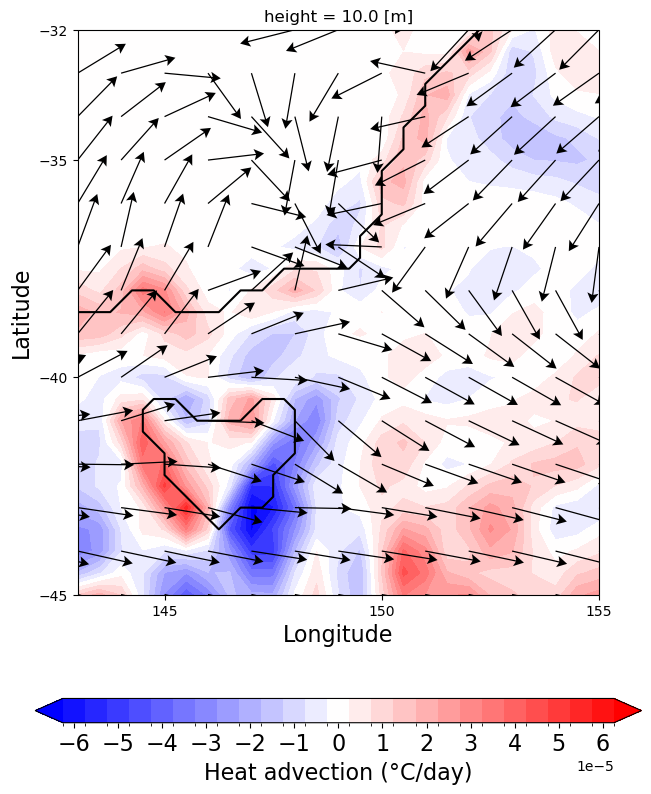

In [41]:
## Mean wnd x anomalous temp gradient (AUS)

x = con_vas_mean['lon']
y = con_uas_mean['lat']
    
fig, ax = plt.subplots(111, figsize=(16,9))
ax = plt.subplot(111, projection=ccrs.PlateCarree()) # Specifies the projection for the plots
                       
ax.set_extent([143, 155, -45, -32], crs=ccrs.PlateCarree())       
ax.set_xticks((145, 150, 155), crs=ccrs.PlateCarree())
ax.set_yticks((-45, -40, -35, -32), crs=ccrs.PlateCarree())

contour = ((u_diff_temp_x + v_diff_temp_y)*(-1)).mean(dim='time').plot.contourf( ## 60x60x24 to calculate heat adv for a day
    levels = np.arange(-6.25*1e-5, 6.5*1e-5, 5*1e-6),
    cmap=plt.cm.get_cmap('bwr'),
    extend='both',
    add_colorbar=False
)
        
mask_mean = mask.mean(dim='time')

ax.contour(
    mask_mean.longitude, 
    mask_mean.latitude,
    mask_mean.values,
    levels=[0.5], 
    cmap='gray')

q = ax.quiver(
    x, y,
    (con_uas_mean/abs_con_u),#.isel(phase=0).mean(dim='time')[::2, ::2],
    (con_vas_mean/abs_con_u),#.isel(phase=0).mean(dim='time')[::2, ::2],
    scale=10,
    units='height', headwidth=9, headlength=8, headaxislength=6.5
)
        
cbar = plt.colorbar(contour, orientation="horizontal",ticks=np.arange(-6*1e-5,7*1e-5,1*1e-5),
                    fraction=0.035,aspect=25, extend='both')
cbar.set_label(label=u'Heat advection (\u00B0C/day)', fontsize=16)  
cbar.ax.tick_params(labelsize=16)

plt.xlabel('Longitude',fontsize=16)
plt.ylabel('Latitude', fontsize=16)

plt.savefig('/g/data/e14/cp3790/Charuni/ModelExperiment/Revisions/Figure3c-aus-redone.png')
#plt.show()

/jobfs/89249030.gadi-pbs/ipykernel_883447/2653719548.py:7: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax = plt.subplot(111, projection=ccrs.PlateCarree()) # Specifies the projection for the plots
/jobfs/89249030.gadi-pbs/ipykernel_883447/2653719548.py:16: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap=plt.cm.get_cmap('bwr'),


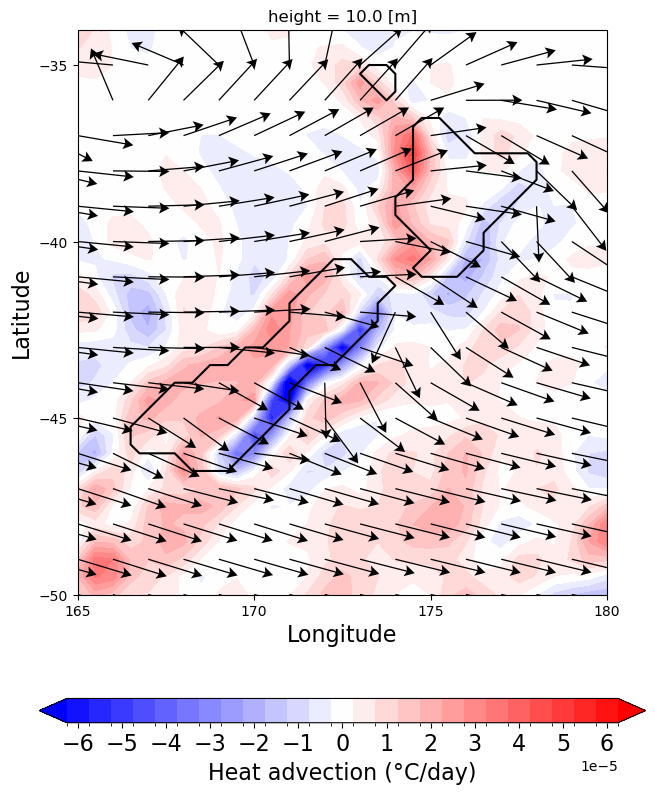

In [42]:
## Mean wnd x anomalous temp gradient (NZ)

x = con_vas_mean['lon']
y = con_uas_mean['lat']

fig, ax = plt.subplots(111, figsize=(16,9))
ax = plt.subplot(111, projection=ccrs.PlateCarree()) # Specifies the projection for the plots
                       
ax.set_extent([165, 180, -50, -34], crs=ccrs.PlateCarree()) 
ax.set_xticks((165, 170, 175, 180), crs=ccrs.PlateCarree())
ax.set_yticks((-50, -45, -40, -35), crs=ccrs.PlateCarree())


contour = ((u_diff_temp_x + v_diff_temp_y)*(-1)).mean(dim='time').plot.contourf(
    levels = np.arange(-6.25*1e-5, 6.5*1e-5, 5*1e-6),
    cmap=plt.cm.get_cmap('bwr'),
    extend='both',
    add_colorbar=False
)
        
mask_mean = mask.mean(dim='time')

ax.contour(
    mask_mean.longitude, 
    mask_mean.latitude,
    mask_mean.values,
    levels=[0.5], 
    cmap='gray')

q = ax.quiver(
    x, y,
    (con_uas_mean/abs_con_u),#.isel(phase=0).mean(dim='time')[::2, ::2],
    (con_vas_mean/abs_con_u),#.isel(phase=0).mean(dim='time')[::2, ::2],
    scale=10,
    units='height', headwidth=9, headlength=8, headaxislength=6.5
)

cbar = plt.colorbar(contour, orientation="horizontal",ticks=np.arange(-6*1e-5,7*1e-5,1*1e-5),
                    fraction=0.035,aspect=25, extend='both')
cbar.set_label(label=u'Heat advection (\u00B0C/day)', fontsize=16)  
cbar.ax.tick_params(labelsize=16)
                       
plt.xlabel('Longitude',fontsize=16)
plt.ylabel('Latitude', fontsize=16)

#plt.show()
plt.savefig('/g/data/e14/cp3790/Charuni/ModelExperiment/Revisions/Figure3c-nz-redone.png')

### Mean temp gradient x Anom winds

In [33]:
con_temp_x = (con_temp.isel(phase=0).differentiate('lon'))/distance_between_lons #differentiate temperature along x axis
con_temp_y = (con_temp.isel(phase=0).differentiate('lat'))/distance_between_lons #differentiate temperature along y axis

In [34]:
u_con_temp_x = diff_uas.isel(phase=0) * con_temp_x * 86400
v_con_temp_y = diff_vas.isel(phase=0) * con_temp_y * 86400

In [48]:
diff_uas_mean = diff_uas.isel(phase=0).mean(dim='time')#[::2, ::2]
diff_vas_mean = diff_vas.isel(phase=0).mean(dim='time')#[::2, ::2]

In [49]:
## ufuncs has beemn removed from xarray; so I had to use apply_ufunc

a = diff_uas_mean.load()
b = diff_vas_mean.load()
def magnitude(a, b):
    func = lambda x, y: np.sqrt(x**2 + y**2)
    return xr.apply_ufunc(func, a, b)

abs_diff_u = magnitude(a,b)

/jobfs/89249030.gadi-pbs/ipykernel_883447/3691837525.py:7: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax = plt.subplot(111, projection=ccrs.PlateCarree()) # Specifies the projection for the plots
/jobfs/89249030.gadi-pbs/ipykernel_883447/3691837525.py:15: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap=plt.cm.get_cmap('bwr'),


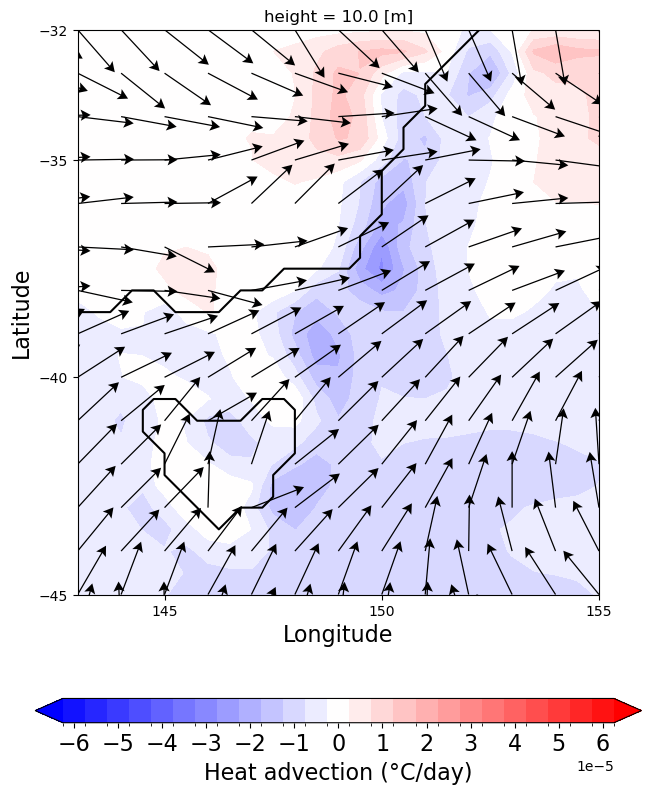

In [47]:
## Anom winds x Mean temp gradient (AUS)

x = diff_vas_mean['lon']
y = diff_uas_mean['lat']
    
fig, ax = plt.subplots(111, figsize=(16,9))
ax = plt.subplot(111, projection=ccrs.PlateCarree()) # Specifies the projection for the plots
                       
ax.set_extent([143, 155, -45, -32], crs=ccrs.PlateCarree())    
ax.set_xticks((145, 150, 155), crs=ccrs.PlateCarree())
ax.set_yticks((-45, -40, -35, -32), crs=ccrs.PlateCarree())

contour = ((u_con_temp_x + v_con_temp_y)*(-1)).mean(dim='time').plot.contourf( ## 60x60x24 to calculate heat adv for a day
    levels = np.arange(-6.25*1e-5, 6.5*1e-5, 5*1e-6),
    cmap=plt.cm.get_cmap('bwr'),
    extend='both',
    add_colorbar=False
)
        
mask_mean = mask.mean(dim='time')

ax.contour(
    mask_mean.longitude, 
    mask_mean.latitude,
    mask_mean.values,
    levels=[0.5], 
    cmap='gray')

q = ax.quiver(
    x, y,
    (diff_uas_mean/abs_diff_u),#.isel(phase=0).mean(dim='time')[::2, ::2],
    (diff_vas_mean/abs_diff_u),#.isel(phase=0).mean(dim='time')[::2, ::2],
    scale=10,
    units='height', headwidth=9, headlength=8, headaxislength=6.5
)
        
cbar = plt.colorbar(contour, orientation="horizontal",ticks=np.arange(-6*1e-5,7*1e-5,1*1e-5),
                    fraction=0.035,aspect=25, extend='both')
cbar.set_label(label=u'Heat advection (\u00B0C/day)', fontsize=16)  
cbar.ax.tick_params(labelsize=16)

plt.xlabel('Longitude',fontsize=16)
plt.ylabel('Latitude', fontsize=16)
                       
plt.savefig('/g/data/e14/cp3790/Charuni/ModelExperiment/Revisions/Figure3a-aus-redone.png')

/jobfs/89249030.gadi-pbs/ipykernel_883447/1943169245.py:7: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax = plt.subplot(111, projection=ccrs.PlateCarree()) # Specifies the projection for the plots
/jobfs/89249030.gadi-pbs/ipykernel_883447/1943169245.py:15: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap=plt.cm.get_cmap('bwr'),


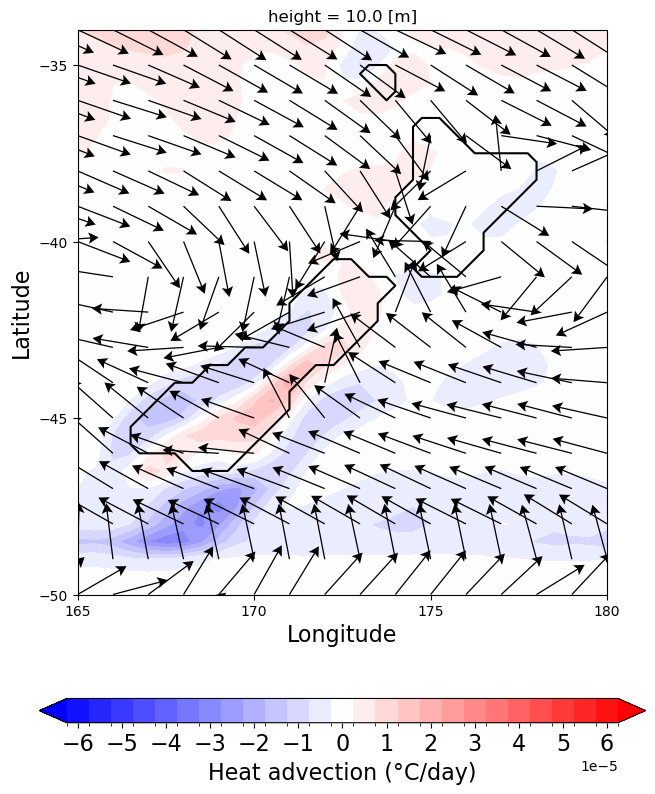

In [48]:
## Anom winds x Mean temp gradient (NZ)

x = diff_vas_mean['lon']
y = diff_uas_mean['lat']

fig, ax = plt.subplots(111, figsize=(16,9))
ax = plt.subplot(111, projection=ccrs.PlateCarree()) # Specifies the projection for the plots
                       
ax.set_extent([165, 180, -50, -34], crs=ccrs.PlateCarree())      
ax.set_xticks((165, 170, 175, 180), crs=ccrs.PlateCarree())
ax.set_yticks((-50, -45, -40, -35), crs=ccrs.PlateCarree())

contour = ((u_con_temp_x + v_con_temp_y)*(-1)).mean(dim='time').plot.contourf( ## 60x60x24 to calculate heat adv for a day
    levels = np.arange(-6.25*1e-5, 6.5*1e-5, 5*1e-6),
    cmap=plt.cm.get_cmap('bwr'),
    extend='both',
    add_colorbar=False
)
        
mask_mean = mask.mean(dim='time')

ax.contour(
    mask_mean.longitude, 
    mask_mean.latitude,
    mask_mean.values,
    levels=[0.5], 
    cmap='gray')

q = ax.quiver(
    x, y,
    (diff_uas_mean/abs_diff_u),#.isel(phase=0).mean(dim='time')[::2, ::2],
    (diff_vas_mean/abs_diff_u),#.isel(phase=0).mean(dim='time')[::2, ::2],
    scale=10,
    units='height', headwidth=9, headlength=8, headaxislength=6.5
)

cbar = plt.colorbar(contour, orientation="horizontal",ticks=np.arange(-6*1e-5,7*1e-5,1*1e-5),
                    fraction=0.035,aspect=25, extend='both')
cbar.set_label(label=u'Heat advection (\u00B0C/day)', fontsize=16)  
cbar.ax.tick_params(labelsize=16)

plt.xlabel('Longitude',fontsize=16)
plt.ylabel('Latitude', fontsize=16)
                       
plt.savefig('/g/data/e14/cp3790/Charuni/ModelExperiment/Revisions/Figure3a-nz-redone.png')

### Anom temp gradient x Anom winds

In [37]:
u_diff_temp_diff_x = diff_uas.isel(phase=0) * diff_temp_x * 86400
v_diff_temp_diff_y = diff_vas.isel(phase=0) * diff_temp_y * 86400

/jobfs/89249030.gadi-pbs/ipykernel_883447/1477504935.py:7: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax = plt.subplot(111, projection=ccrs.PlateCarree()) # Specifies the projection for the plots
/jobfs/89249030.gadi-pbs/ipykernel_883447/1477504935.py:15: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap=plt.cm.get_cmap('bwr'),


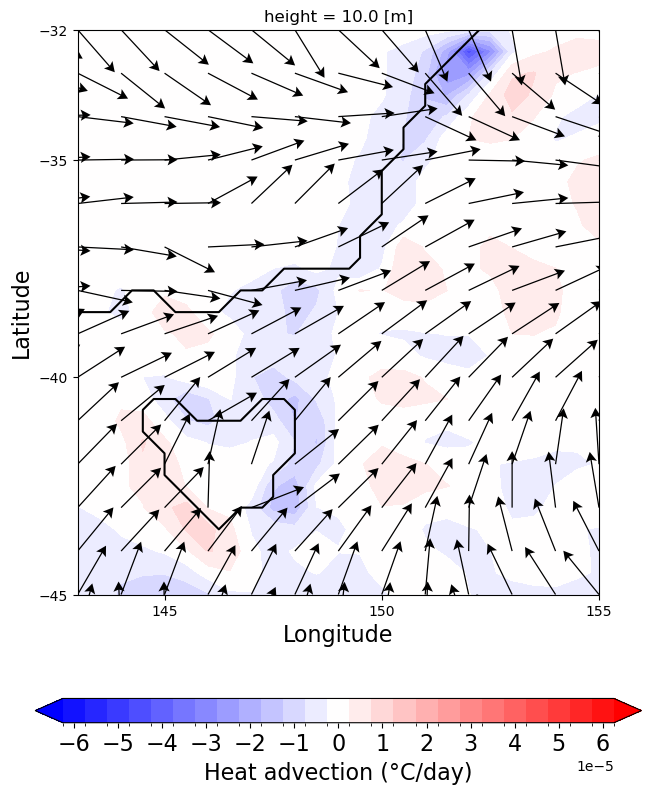

In [50]:
## Anom winds x anom temp gradient (AUS)

x = diff_vas_mean['lon']
y = diff_uas_mean['lat']
    
fig, ax = plt.subplots(111, figsize=(16,9))
ax = plt.subplot(111, projection=ccrs.PlateCarree()) # Specifies the projection for the plots
                       
ax.set_extent([143, 155, -45, -32], crs=ccrs.PlateCarree())      
ax.set_xticks((145, 150, 155), crs=ccrs.PlateCarree())
ax.set_yticks((-45, -40, -35, -32), crs=ccrs.PlateCarree())

contour = ((u_diff_temp_diff_x + v_diff_temp_diff_y)*(-1)).mean(dim='time').plot.contourf( ## 60x60x24 to calculate heat adv for a day
    levels = np.arange(-6.25*1e-5, 6.5*1e-5, 5*1e-6),
    cmap=plt.cm.get_cmap('bwr'),
    extend='both',
    add_colorbar=False
)
        
mask_mean = mask.mean(dim='time')

ax.contour(
    mask_mean.longitude, 
    mask_mean.latitude,
    mask_mean.values,
    levels=[0.5], 
    cmap='gray')

q = ax.quiver(
    x, y,
    (diff_uas_mean/abs_diff_u),#.isel(phase=0).mean(dim='time')[::2, ::2],
    (diff_vas_mean/abs_diff_u),#.isel(phase=0).mean(dim='time')[::2, ::2],
    scale=10,
    units='height', headwidth=9, headlength=8, headaxislength=6.5
)
        
cbar = plt.colorbar(contour, orientation="horizontal",ticks=np.arange(-6*1e-5,7*1e-5,1*1e-5),
                    fraction=0.035,aspect=25, extend='both')
cbar.set_label(label=u'Heat advection (\u00B0C/day)', fontsize=16)  
cbar.ax.tick_params(labelsize=16)

plt.xlabel('Longitude',fontsize=16)
plt.ylabel('Latitude', fontsize=16)
                       
plt.savefig('/g/data/e14/cp3790/Charuni/ModelExperiment/Revisions/Figure3b-aus-redone.png')

/jobfs/89249030.gadi-pbs/ipykernel_883447/3868174181.py:7: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax = plt.subplot(111, projection=ccrs.PlateCarree()) # Specifies the projection for the plots
/jobfs/89249030.gadi-pbs/ipykernel_883447/3868174181.py:15: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap=plt.cm.get_cmap('bwr'),


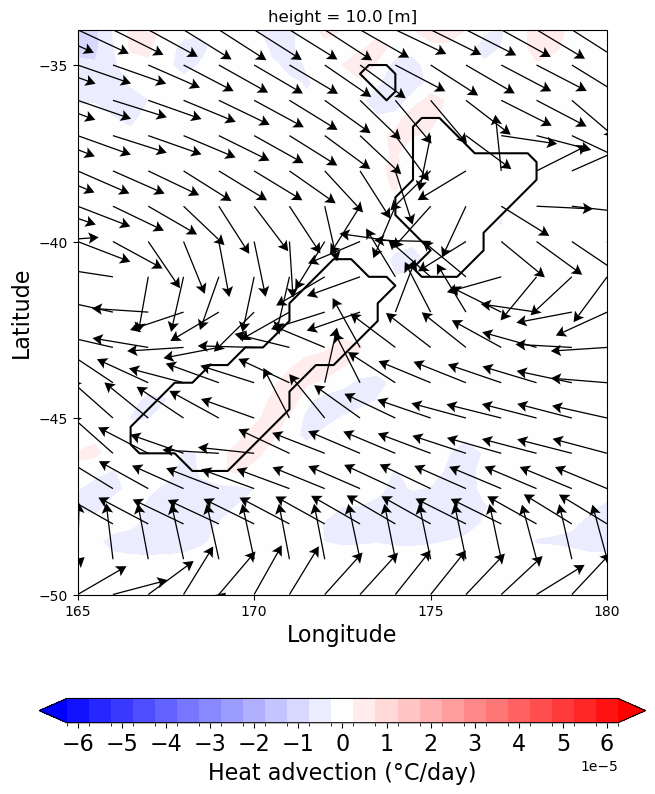

In [51]:
## Anom winds x anom temp gradient (NZ)

x = diff_vas_mean['lon']
y = diff_uas_mean['lat']
    
fig, ax = plt.subplots(111, figsize=(16,9))
ax = plt.subplot(111, projection=ccrs.PlateCarree()) # Specifies the projection for the plots
                       
ax.set_extent([165, 180, -50, -34], crs=ccrs.PlateCarree())  
ax.set_xticks((165, 170, 175, 180), crs=ccrs.PlateCarree())
ax.set_yticks((-50, -45, -40, -35), crs=ccrs.PlateCarree())

contour = ((u_diff_temp_diff_x + v_diff_temp_diff_y)*(-1)).mean(dim='time').plot.contourf( ## 60x60x24 to calculate heat adv for a day
    levels = np.arange(-6.25*1e-5, 6.5*1e-5, 5*1e-6),
    cmap=plt.cm.get_cmap('bwr'),
    extend='both',
    add_colorbar=False
)
        
mask_mean = mask.mean(dim='time')

ax.contour(
    mask_mean.longitude, 
    mask_mean.latitude,
    mask_mean.values,
    levels=[0.5], 
    cmap='gray')

q = ax.quiver(
    x, y,
    (diff_uas_mean/abs_diff_u),#.isel(phase=0).mean(dim='time')[::2, ::2],
    (diff_vas_mean/abs_diff_u),#.isel(phase=0).mean(dim='time')[::2, ::2],
    scale=10,
    units='height', headwidth=9, headlength=8, headaxislength=6.5
)

cbar = plt.colorbar(contour, orientation="horizontal",ticks=np.arange(-6*1e-5,7*1e-5,1*1e-5),
                    fraction=0.035,aspect=25, extend='both')
cbar.set_label(label=u'Heat advection (\u00B0C/day)', fontsize=16)  
cbar.ax.tick_params(labelsize=16)

plt.xlabel('Longitude',fontsize=16)
plt.ylabel('Latitude', fontsize=16)
                       
plt.savefig('/g/data/e14/cp3790/Charuni/ModelExperiment/Revisions/Figure3b-nz-redone.png')

In [38]:
sum_advective_terms = ((u_diff_temp_diff_x + v_diff_temp_diff_y)*(-1)).mean(dim='time') + ((u_con_temp_x + v_con_temp_y )*(-1)).mean(dim='time') + ((u_diff_temp_x + v_diff_temp_y)*(-1)).mean(dim='time') 

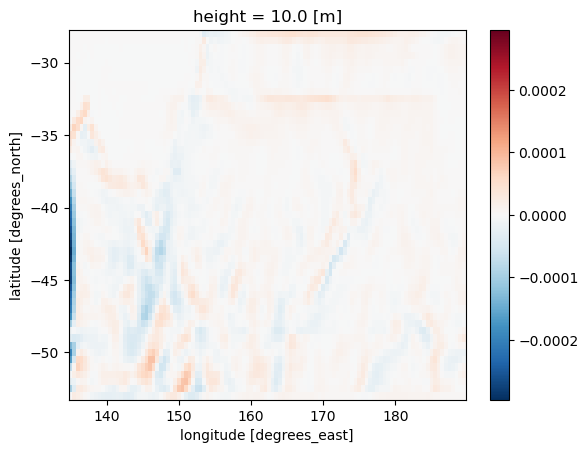

In [39]:
sum_advective_terms.plot()

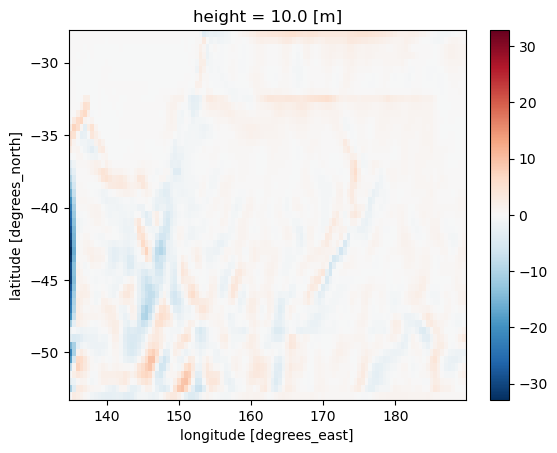

In [35]:
sum_advective_terms.plot()

/jobfs/89465028.gadi-pbs/ipykernel_2472265/2685511703.py:7: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax = plt.subplot(111, projection=ccrs.PlateCarree()) # Specifies the projection for the plots
/jobfs/89465028.gadi-pbs/ipykernel_2472265/2685511703.py:15: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap=plt.cm.get_cmap('bwr'),


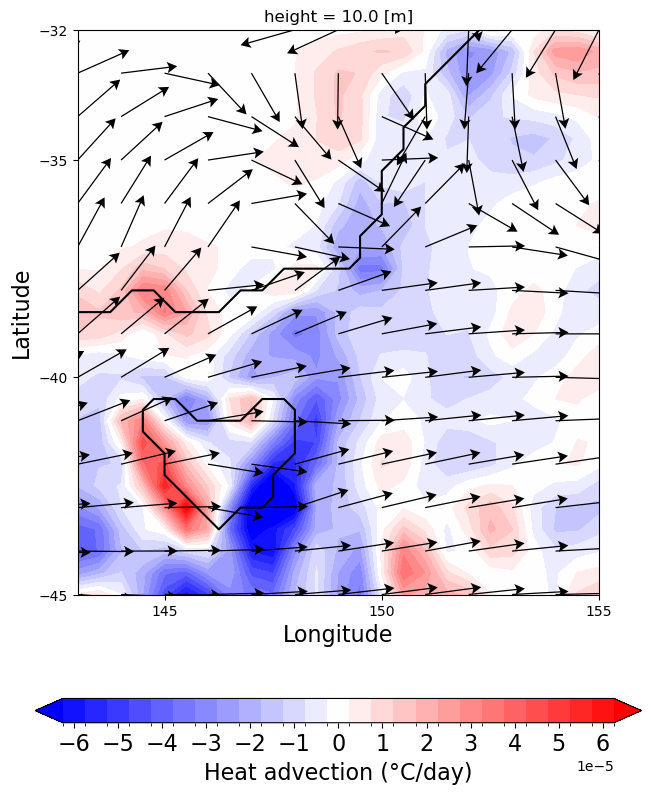

In [45]:
## Total advective terms (AUS)

x = sum_v['lon']
y = sum_u['lat']
    
fig, ax = plt.subplots(111, figsize=(16,9))
ax = plt.subplot(111, projection=ccrs.PlateCarree()) # Specifies the projection for the plots
                       
ax.set_extent([143, 155, -45, -32], crs=ccrs.PlateCarree())       
ax.set_xticks((145, 150, 155), crs=ccrs.PlateCarree())
ax.set_yticks((-45, -40, -35, -32), crs=ccrs.PlateCarree())

contour = sum_advective_terms.plot.contourf( ## 60x60x24 to calculate heat adv for a day
    levels = np.arange(-6.25*1e-5, 6.5*1e-5, 5*1e-6),
    cmap=plt.cm.get_cmap('bwr'),
    extend='both',
    add_colorbar=False
)
        
mask_mean = mask.mean(dim='time')

ax.contour(
    mask_mean.longitude, 
    mask_mean.latitude,
    mask_mean.values,
    levels=[0.5], 
    cmap='gray')

q = ax.quiver(
    x, y,
    (sum_u/abs_sum_u),#.isel(phase=0).mean(dim='time')[::2, ::2],
    (sum_v/abs_sum_u),#.isel(phase=0).mean(dim='time')[::2, ::2],
    scale=10,
    units='height', headwidth=9, headlength=8, headaxislength=6.5
)
        
cbar = plt.colorbar(contour, orientation="horizontal",ticks=np.arange(-6*1e-5,7*1e-5,1*1e-5),
                    fraction=0.035,aspect=25, extend='both')
cbar.set_label(label=u'Heat advection (\u00B0C/day)', fontsize=16)  
cbar.ax.tick_params(labelsize=16)

plt.xlabel('Longitude',fontsize=16)
plt.ylabel('Latitude', fontsize=16)

plt.savefig('/g/data/e14/cp3790/Charuni/ModelExperiment/Revisions/Figure3-sum-aus.png')
#plt.show()

/jobfs/89465028.gadi-pbs/ipykernel_2472265/1118455632.py:7: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax = plt.subplot(111, projection=ccrs.PlateCarree()) # Specifies the projection for the plots
/jobfs/89465028.gadi-pbs/ipykernel_2472265/1118455632.py:16: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap=plt.cm.get_cmap('bwr'),


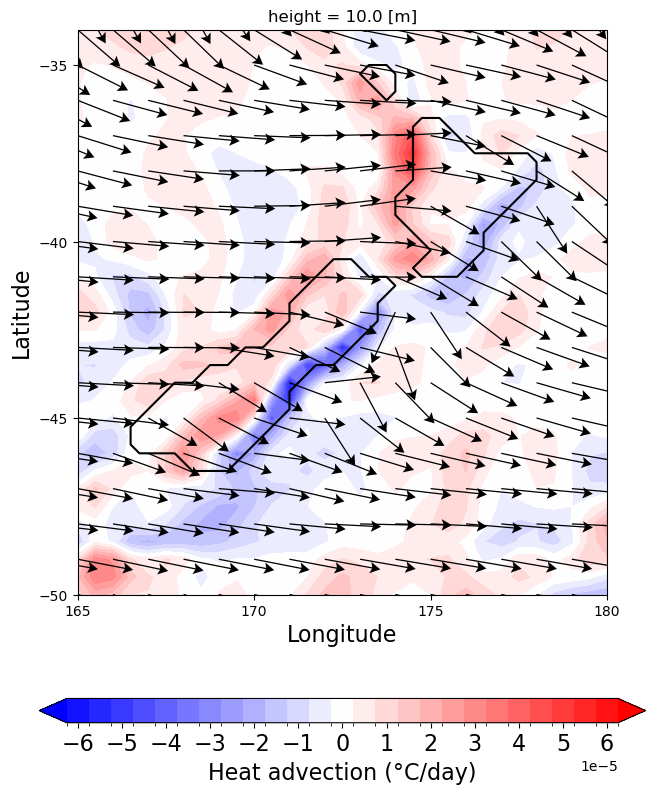

In [44]:
## Total advective terms (NZ)

x = sum_v['lon']
y = sum_u['lat']

fig, ax = plt.subplots(111, figsize=(16,9))
ax = plt.subplot(111, projection=ccrs.PlateCarree()) # Specifies the projection for the plots
                       
ax.set_extent([165, 180, -50, -34], crs=ccrs.PlateCarree()) 
ax.set_xticks((165, 170, 175, 180), crs=ccrs.PlateCarree())
ax.set_yticks((-50, -45, -40, -35), crs=ccrs.PlateCarree())


contour = sum_advective_terms.plot.contourf(
    levels = np.arange(-6.25*1e-5, 6.5*1e-5, 5*1e-6),
    cmap=plt.cm.get_cmap('bwr'),
    extend='both',
    add_colorbar=False
)
        
mask_mean = mask.mean(dim='time')

ax.contour(
    mask_mean.longitude, 
    mask_mean.latitude,
    mask_mean.values,
    levels=[0.5], 
    cmap='gray')

q = ax.quiver(
    x, y,
    (sum_u/abs_sum_u),#.isel(phase=0).mean(dim='time')[::2, ::2],
    (sum_v/abs_sum_u),#.isel(phase=0).mean(dim='time')[::2, ::2],
    scale=10,
    units='height', headwidth=9, headlength=8, headaxislength=6.5
)

cbar = plt.colorbar(contour, orientation="horizontal",ticks=np.arange(-6*1e-5,7*1e-5,1*1e-5),
                    fraction=0.035,aspect=25, extend='both')
cbar.set_label(label=u'Heat advection (\u00B0C/day)', fontsize=16)  
cbar.ax.tick_params(labelsize=16)
                       
plt.xlabel('Longitude',fontsize=16)
plt.ylabel('Latitude', fontsize=16)

#plt.show()
plt.savefig('/g/data/e14/cp3790/Charuni/ModelExperiment/Revisions/Figure3-sum-nz.png')

In [41]:
sum_u = con_uas_mean+diff_uas_mean+diff_uas_mean
sum_v = con_vas_mean+diff_vas_mean+diff_vas_mean

## ufuncs has beemn removed from xarray; so I had to use apply_ufunc

a = sum_u.load()
b = sum_v.load()
def magnitude(a, b):
    func = lambda x, y: np.sqrt(x**2 + y**2)
    return xr.apply_ufunc(func, a, b)

abs_sum_u = magnitude(a,b)